# Аналитика в Яндекс.Афише


Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.


## План выполнения работ
#### [Шаг 1. Загрузите данные и подготовьте их к анализу ](#step1)
#### [Шаг 2. Подготовка данных](#step2)
#### [Шаг 3. Постройте отчёты и посчитайте метрики](#step3)
#### [Шаг 4. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?](#step4)



## <a id="step1">Шаг 1. Загрузите данные и подготовьте их к анализу</a>

### Импортируем библиотеки

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
import seaborn as sns
from scipy import stats as st
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 500)

### Рассмотрим данные visits_log.csv

In [4]:
visits = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum6/visits_log.csv')
#visits = pd.read_csv('/datasets/visits_log.csv')

In [5]:
print('\nРассмотрим общую информацию')
visits.info()
print('\nРассмотрим первые 10 строк')
display(visits.head(10))
print('\nРассмотрим описательную статистику нашего DataFrame')
visits.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

Рассмотрим первые 10 строк


Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
5  desktop  2017-09-03 21:36:00          5  2017-09-03 21:35:00   
6  desktop  2018-01-30 12:09:00          1  2018-01-30 11:13:00   
7    touch  2017-11-05 15:15:00          3  2017-11-05 15:14:00   
8  desktop  2017-07-19 10:44:00          3  2017-07-19 10:41:00   
9  desktop  2017-11-08 13:43:00          5  2017-11-08 13:42:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
5  16007536194108375387  
6   6661610529277171451  
7  11423865690854540312  
8   2987360259350925644  
9   1289240080042562063


Рассмотрим описательную статистику нашего DataFrame


Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19

##### Описание  данных
`Uid` — уникальный идентификатор пользователя

`Device` — категория устройства пользователя

`Start Ts` — дата и время начала сессии

`End Ts` — дата и время окончания сессии

`Source Id` — идентификатор рекламного источника, из которого пришел пользователь

### Рассмотрим данные orders_log.csv

In [6]:
orders = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum6/orders_log.csv')
#orders = pd.read_csv('/datasets/orders_log.csv')

In [7]:
print('\nРассмотрим общую информацию')
orders.info()
print('\nРассмотрим первые 10 строк')
display(orders.head(10))
print('\nРассмотрим описательную статистику нашего DataFrame')
orders.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

Рассмотрим первые 10 строк


Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
5  2017-06-01 08:43:00     0.18  10402394430196413321
6  2017-06-01 08:54:00     1.83  12464626743129688638
7  2017-06-01 09:22:00     1.22   3644482766749211722
8  2017-06-01 09:22:00     3.30  17542070709969841479
9  2017-06-01 09:23:00     0.37   1074355127080856382


Рассмотрим описательную статистику нашего DataFrame


Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19

##### Описание  данных
`Uid` — уникальный id пользователя, который сделал заказ

`Buy Ts` — дата и время заказа

`Revenue` — выручка Яндекс.Афиши с этого заказа

### Рассмотрим данные costs.csv

In [8]:
costs = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum6/costs.csv')
#costs = pd.read_csv('/datasets/costs.csv')

In [9]:
print('\nРассмотрим общую информацию')
costs.info()
print('\nРассмотрим первые 10 строк')
display(costs.head(10))
print('\nРассмотрим описательную статистику нашего DataFrame')
costs.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

Рассмотрим первые 10 строк


source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
5          1  2017-06-06  40.39
6          1  2017-06-07  40.59
7          1  2017-06-08  56.63
8          1  2017-06-09  40.16
9          1  2017-06-10  43.24


Рассмотрим описательную статистику нашего DataFrame


source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000

##### Описание  данных
`source_id` — идентификатор рекламного источника

`dt` — дата

`costs` — затраты на этот рекламный источник в этот день

### Вывод

Импортировали файлы и изучили их. Требуется замена типа данных в столбцах с датой.

Также уберем пробелы с названий столбцов и  приведем их к нижнему регистру.




## <a id="step2">Шаг 2. Подготовка данных</a>

### Приведем названия столбцов к нижнему регистру

In [10]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

### Уберем пробелы в назаваниях столбцов 

In [11]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']

### Приведем даты к нужному формату(формату даты)

In [12]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'],format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'],format = '%Y-%m-%d %H:%M:%S')
orders['buy_ts'] =  pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d %H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')

### Вывод

Заменили тип данных в столбцах с датой.

Убрали пробелы с названий столбцов, привели к нижнему регистру.

## <a id="step3">Шаг 3. Постройте отчёты и посчитайте метрики</a>

### Сколько людей пользуются в день, неделю, месяц?

In [13]:
# Выделим в отдельные столбцы год, месяц, неделю и дату
visits['visits_date'] = visits['start_ts'].dt.date
visits['visits_week'] = visits['start_ts'].dt.week
visits['visits_month'] = visits['start_ts'].dt.month
visits['visits_year'] = visits['start_ts'].dt.year

dau_total = visits.groupby('visits_date').agg({'uid':'nunique'}).mean()
wau_total = visits.groupby(['visits_week','visits_year']).agg({'uid':'nunique'}).mean()
mau_total = visits.groupby(['visits_month','visits_year']).agg({'uid':'nunique'}).mean()
print('Количество уникальных пользователей в день:', int(dau_total))
print('Количество уникальных пользователей в неделю:', int(wau_total))
print('Количество уникальных пользователей в месяц:', int(mau_total))


Количество уникальных пользователей в день: 907
Количество уникальных пользователей в неделю: 5716
Количество уникальных пользователей в месяц: 23228


### Вывод
Определили следующие показатели:

DAU (от англ. daily active users) — количество уникальных пользователей в день;

WAU (от англ. weekly active users) — количество уникальных пользователей в неделю;

MAU (от англ. monthly active users) — количество уникальных пользователей в месяц.

### Сколько сессий в день?

In [14]:
sessions_per_user = visits.groupby(['visits_year','visits_month']).agg({'uid':['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
display(sessions_per_user)
print('Среднее число сессий в месяц:', sessions_per_user['sessions_per_user'].mean())

n_sessions  n_users  sessions_per_user
visits_year visits_month                                        
2017        6                  16505    13259           1.244815
            7                  17828    14183           1.256998
            8                  14355    11631           1.234202
            9                  23907    18975           1.259921
            10                 37903    29692           1.276539
            11                 43969    32797           1.340641
            12                 41983    31557           1.330386
2018        1                  36939    28716           1.286356
            2                  37182    28749           1.293332
            3                  35679    27473           1.298693
            4                  26515    21008           1.262138
            5                  26635    20701           1.286653

Среднее число сессий в месяц: 1.2808894945992668


### Вывод
Нашли среднее количество сессий в месяц одним пользователем 

### Сколько длится одна сессия?

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid visits_date  visits_week  visits_month  visits_year  
0  16879256277535980062  2017-12-20           51            12         2017  
1    104060357244891740  2018-02-19            8             2         2018  
2   7459035603376831527  2017-07-01           26             7         2017  
3  16174680259334210214  2018-05-20           20             5         2018  
4   9969694820036681168  2017-12-27           52            12         2017

Средняя продолжительность сессии: 60


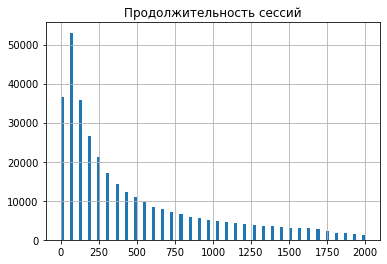

In [15]:
display(visits.head())
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration'].hist(bins=100, range =(0,2000))
plt.title('Продолжительность сессий')
# Средняя продолжительность сессии
atl = visits['session_duration'].mode()
print('Средняя продолжительность сессии:', atl[0])

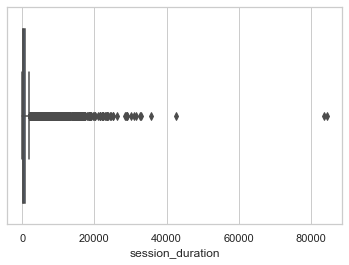

In [16]:
# Построим Боксплот
sns.set(style="whitegrid")
sns.boxplot(x=visits['session_duration'])

### Вывод
Средняя продолжительность сессии: 60

### Как часто люди возвращаются?

In [17]:
# Добавим столбец с первой датой активности пользователя
first_visits_date = visits.groupby('uid')['start_ts'].min()
first_visits_date.name = 'first_visits_date'
visits = visits.join(first_visits_date,on='uid')
display(visits.head(3))

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   

                    uid visits_date  visits_week  visits_month  visits_year  \
0  16879256277535980062  2017-12-20           51            12         2017   
1    104060357244891740  2018-02-19            8             2         2018   
2   7459035603376831527  2017-07-01           26             7         2017   

   session_duration   first_visits_date  
0              1080 2017-12-20 17:20:00  
1              1680 2018-02-19 16:53:00  
2                 0 2017-07-01 01:54:00

In [18]:
# Определим lifetime кагорты
visits['visits_month_date'] = visits['visits_date'].astype('datetime64[M]')
visits['first_visits_month'] = visits['first_visits_date'].astype('datetime64[M]')
visits['cohort_lifetime'] = visits['visits_month_date'] - visits['first_visits_month']
# Переведем в месяц
visits['cohort_lifetime'] = visits['cohort_lifetime']/ np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')



In [19]:
# Определим количество уникальных пользователей в каждом месяце
visits_cohorts = visits.groupby(['first_visits_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
# Найдём исходное количество пользователей в когорте

initial_users_count = visits_cohorts[visits_cohorts['cohort_lifetime'] == 0][['first_visits_month','uid']]
display(initial_users_count.head())


first_visits_month    uid
0          2017-06-01  13259
12         2017-07-01  13140
23         2017-08-01  10181
33         2017-09-01  16704
42         2017-10-01  25977

In [20]:
# Переименуем uid в cohort_users и объединим с исходными данными
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
visits_cohorts = visits_cohorts.merge(initial_users_count,on='first_visits_month')

In [21]:
# Вычислим retation
visits_cohorts['retention'] = visits_cohorts['uid']/visits_cohorts['cohort_users']
# И построим сводную таблицу
retention_pivot = visits_cohorts.pivot_table(index = 'first_visits_month', columns='cohort_lifetime',
                                     values = 'retention', aggfunc='sum')
display(retention_pivot)

cohort_lifetime      0         1         2         3         4         5   \
first_visits_month                                                          
2017-06-01          1.0  0.078664  0.053775  0.061392  0.068557  0.071423   
2017-07-01          1.0  0.056088  0.051294  0.056164  0.058219  0.048174   
2017-08-01          1.0  0.076908  0.062862  0.062764  0.050093  0.044004   
2017-09-01          1.0  0.085489  0.069205  0.050706  0.039392  0.037835   
2017-10-01          1.0  0.078608  0.052239  0.038958  0.034261  0.032221   
2017-11-01          1.0  0.078281  0.044113  0.038682  0.033727  0.023415   
2017-12-01          1.0  0.055802  0.037993  0.031107  0.020263  0.019036   
2018-01-01          1.0  0.059715  0.039339  0.024973  0.020244       NaN   
2018-02-01          1.0  0.057080  0.025454  0.020093       NaN       NaN   
2018-03-01          1.0  0.041818  0.027053       NaN       NaN       NaN   
2018-04-01          1.0  0.048380       NaN       NaN       NaN       NaN   
2018-05-01          1.0       NaN       NaN       NaN       NaN       NaN   

cohort_lifetime           6         7         8         9         10        11  
first_visits_month                                                              
2017-06-01          0.061015  0.057772  0.052342  0.050833  0.040652  0.044951  
2017-07-01          0.045358  0.045738  0.038813  0.028615  0.027473       NaN  
2017-08-01          0.036342  0.039485  0.027895  0.026029       NaN       NaN  
2017-09-01          0.035860  0.024186  0.022809       NaN       NaN       NaN  
2017-10-01          0.021365  0.020364       NaN       NaN       NaN       NaN  
2017-11-01          0.021800       NaN       NaN       NaN       NaN       NaN  
2017-12-01               NaN       NaN       NaN       NaN       NaN       NaN  
2018-01-01               NaN       NaN       NaN       NaN       NaN       NaN  
2018-02-01               NaN       NaN       NaN       NaN       NaN       NaN  
2018-03-01               NaN       NaN       NaN       NaN       NaN       NaN  
2018-04-01               NaN       NaN       NaN       NaN       NaN       NaN  
2018-05-01               NaN       NaN       NaN       NaN       NaN       NaN

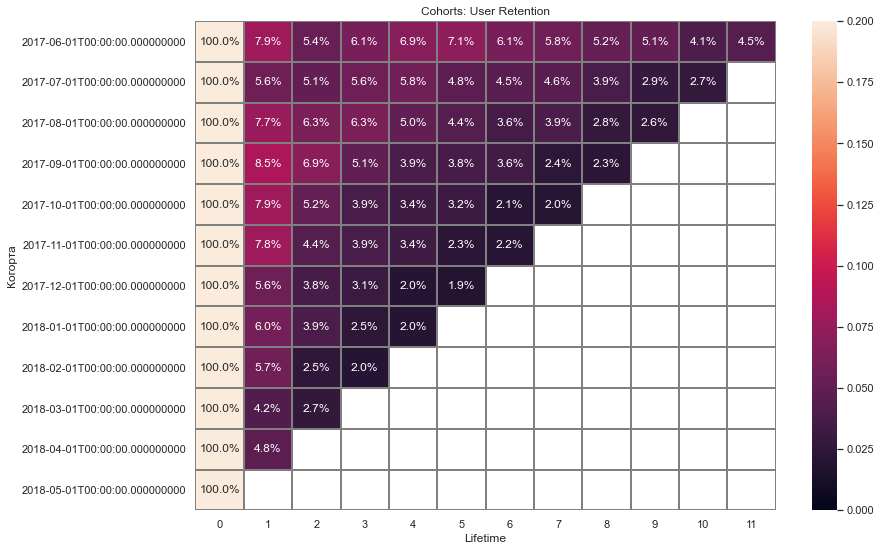

In [22]:
# Раскрасим нашу таблицу
sns.set(style='white')
plt.figure(figsize=(13, 9))
g = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray',vmin=0, vmax=0.2)
g.set(title='Cohorts: User Retention')
g.set(xlabel='Lifetime', ylabel='Когорта');

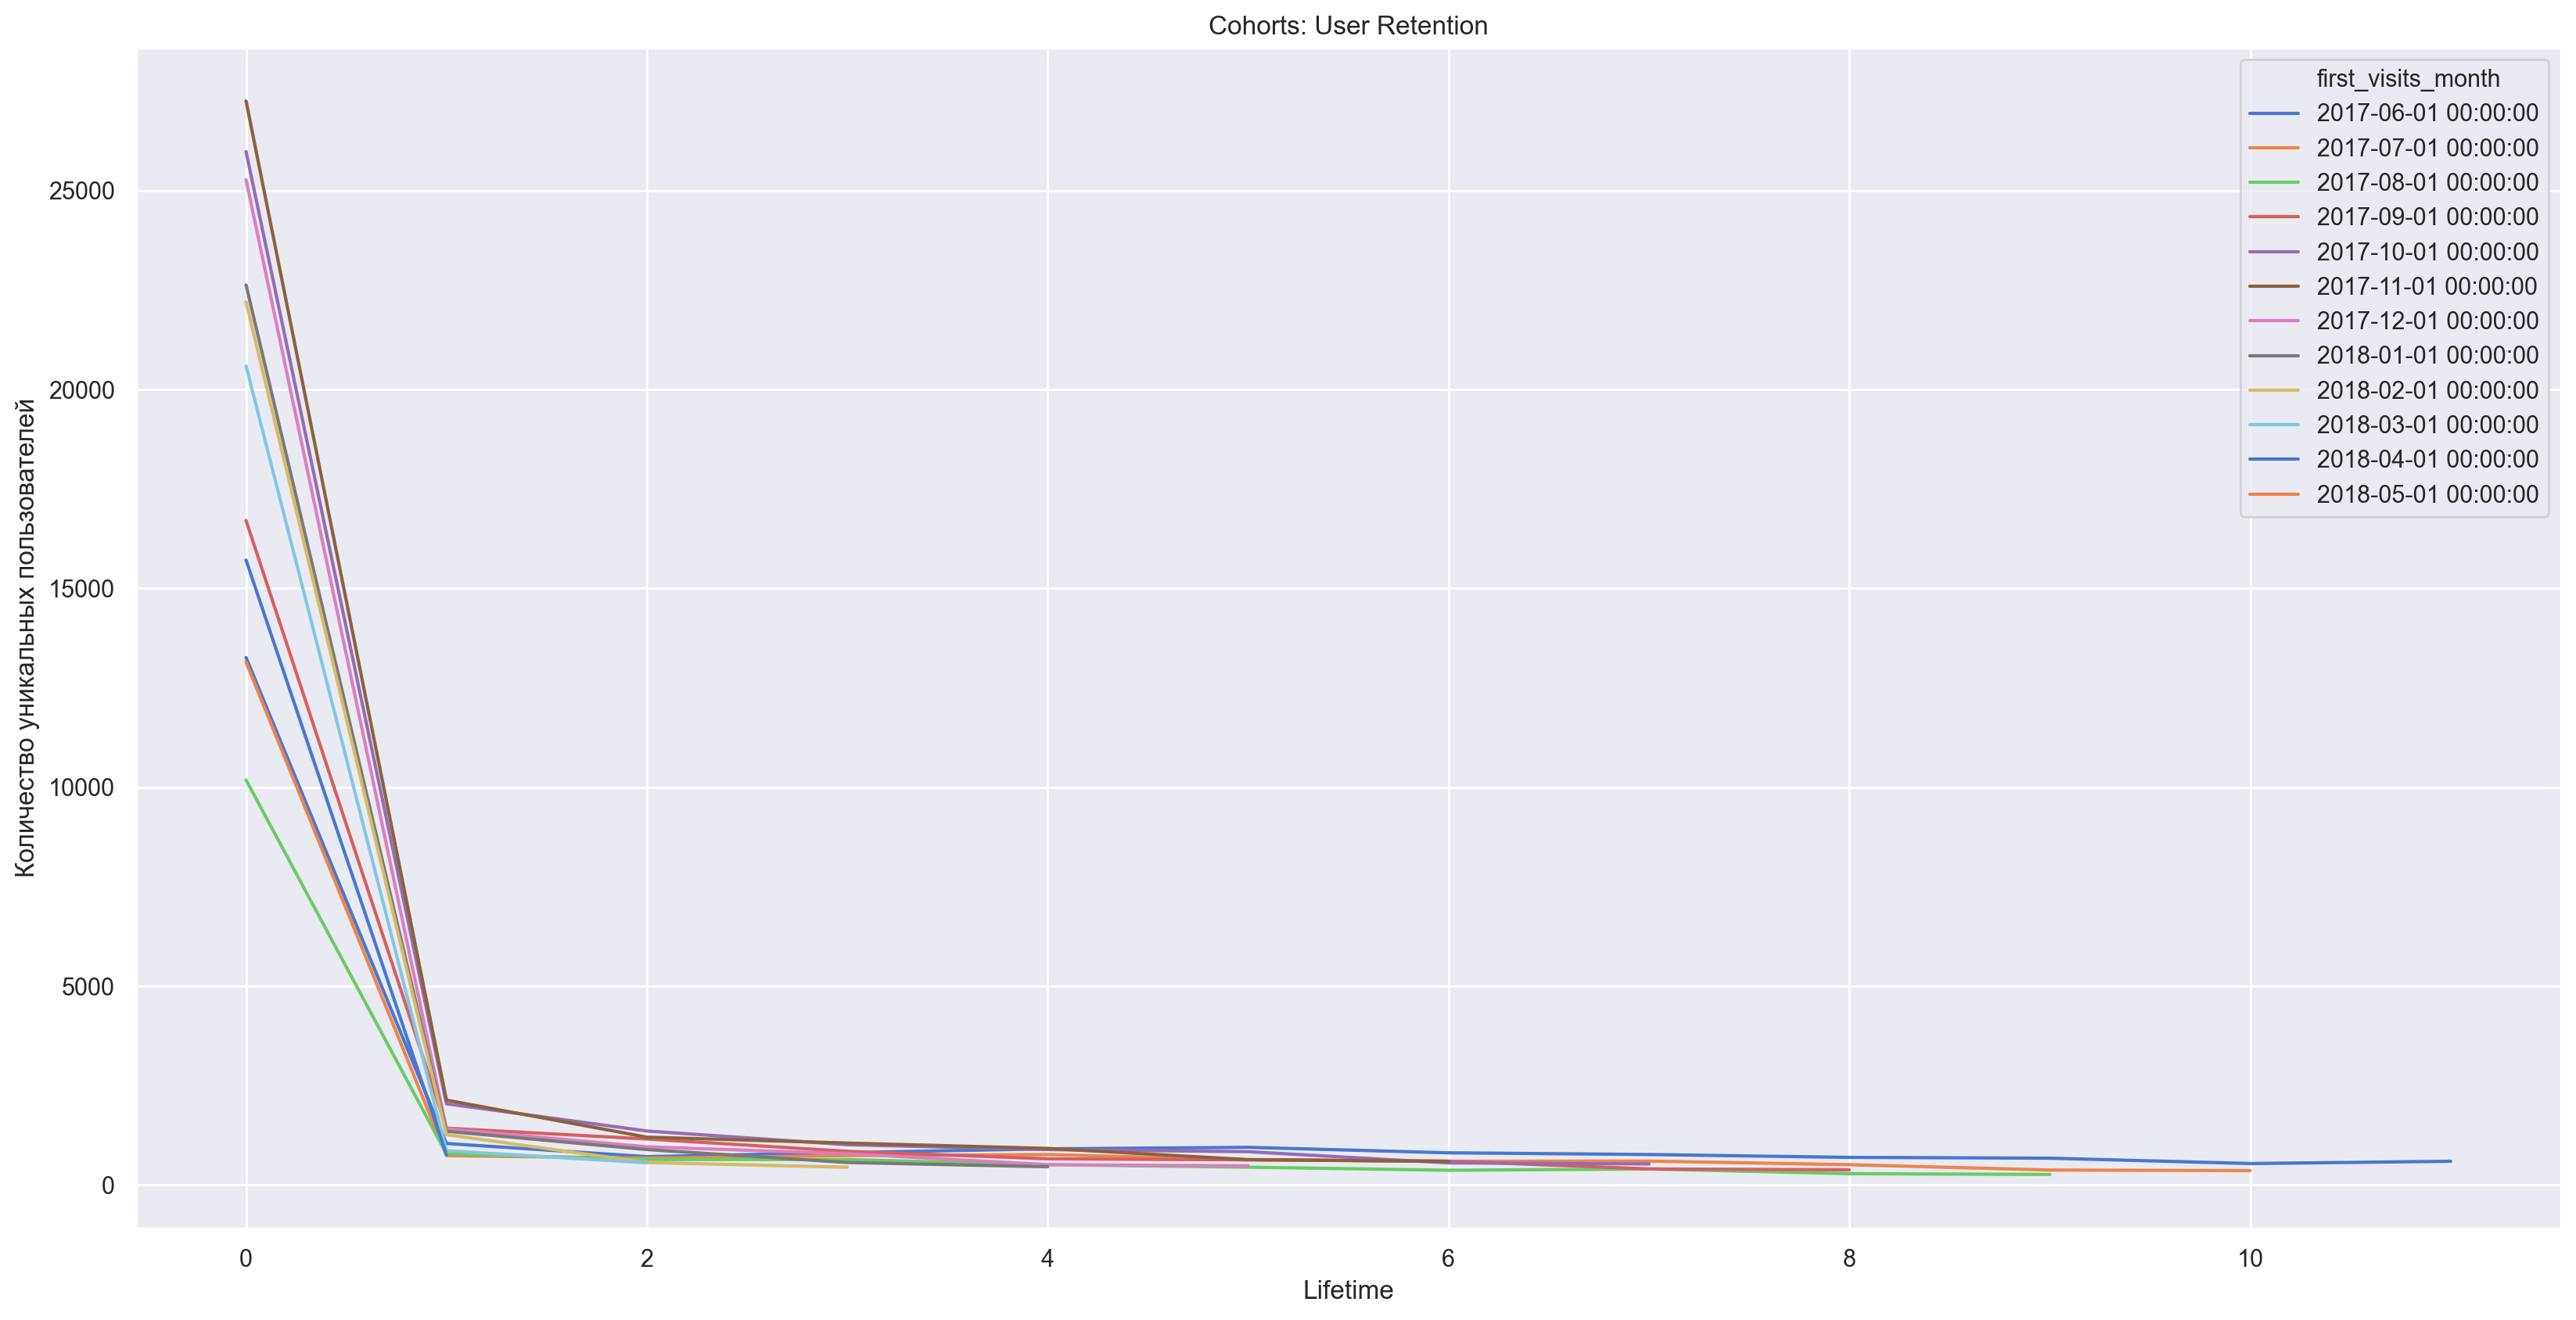

In [23]:
# Построим график отношения количества пользователей к lifetime
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10), dpi=200)
g = sns.lineplot(x="cohort_lifetime", y="uid",
             hue="first_visits_month",palette="muted",
             data=visits_cohorts)
g.set(title='Cohorts: User Retention')
g.set(xlabel='Lifetime', ylabel='Количество уникальных пользователей');

### Вывод
Рассчитали Retention rate. Когорты были приняты периодом в 1 месяц.

Видим, что Retention rate в коготах в июне, августе, сентябре, октябре и ноября 2017г. выше в первом lifetime выше чем в других месяцах. Retention rate в первой когорте стабилен и держится на 5%. Стоит посмотреть на изменения в нашем сервисе.

### Когда люди начинают покупать?

In [24]:
# Найдем первую дату заказа 
first_order_date = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
order_date = first_order_date.merge(first_visits_date, on='uid')
order_date['order_visit_duration'] = order_date['buy_ts'] - order_date['first_visits_date']
display(order_date.head())
print('Время с первого визита до первого заказа')
order_date['order_visit_duration'].describe()

uid              buy_ts   first_visits_date  \
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00   
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00   
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00   
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00   
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00   

  order_visit_duration  
0    106 days 23:02:00  
1      0 days 00:00:00  
2      0 days 01:19:00  
3      0 days 19:44:00  
4      0 days 00:00:00

Время с первого визита до первого заказа


count                      36523
mean     16 days 21:40:10.550064
std      47 days 01:44:46.481416
min              0 days 00:00:00
25%              0 days 00:04:00
50%              0 days 00:16:00
75%              2 days 00:17:00
max            363 days 07:04:00
Name: order_visit_duration, dtype: object

In [25]:
order_date['order_visit_duration'] = order_date['order_visit_duration'].astype('timedelta64[D]')

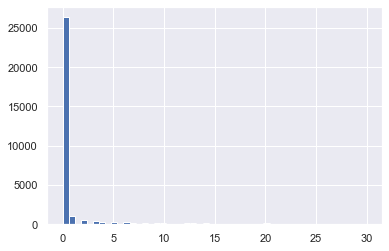

In [26]:
order_date['order_visit_duration'].hist(bins=50,range=(0,30))
# Большинство первых заказов осуществлют в тот же день, в который проиходит первый визит на сайт

### Вывод 
В большинстве случаев люди покупают в день первого визита в наш сервис.

### Сколько раз покупают за период?

In [27]:
# Поработаем с первыми покупателями
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

In [28]:
# Добавим к таблице orders и столбец с первой покупкой
orders_new = pd.merge(orders,first_orders, on='uid')

In [29]:
orders_cohort =  orders_new.groupby(['first_order_month','order_month']).agg({'revenue':'sum',
                                                                       'uid':'count'}).reset_index()

In [30]:
display(orders_cohort)

first_order_month order_month   revenue   uid
0         2017-06-01  2017-06-01   9557.49  2354
1         2017-06-01  2017-07-01    981.82   177
2         2017-06-01  2017-08-01    885.34   174
3         2017-06-01  2017-09-01   1931.30   226
4         2017-06-01  2017-10-01   2068.58   292
..               ...         ...       ...   ...
74        2018-03-01  2018-05-01   1114.87   176
75        2018-04-01  2018-04-01  10600.69  2495
76        2018-04-01  2018-05-01   1209.92   195
77        2018-05-01  2018-05-01  13925.76  3249
78        2018-06-01  2018-06-01      3.42     1

[79 rows x 4 columns]

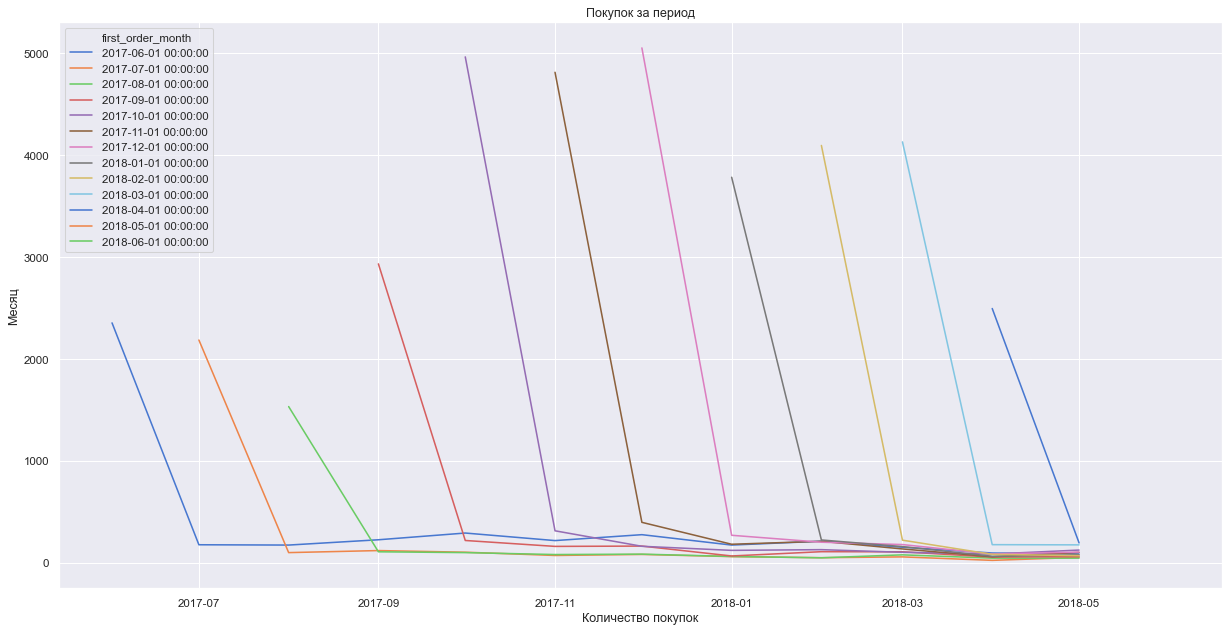

In [31]:
# Посмотрим сколько покупают пользователи за период
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10), dpi=75)
g = sns.lineplot(x="order_month", y="uid",
             hue="first_order_month",palette="muted",
             data=orders_cohort)
g.set(title='Покупок за период')
g.set(xlabel='Количество покупок', ylabel='Месяц');

### Вывод
Пользователи, который пришли к нам зимой совершают больше заказов. 

### Какой средний чек?

In [32]:
# Разделим количество покупок на доход
orders_cohort['revenue_mean'] = orders_cohort['revenue'] / orders_cohort['uid']
display(orders_cohort.head())
display(orders_cohort['revenue_mean'].describe())

first_order_month order_month  revenue   uid  revenue_mean
0        2017-06-01  2017-06-01  9557.49  2354      4.060106
1        2017-06-01  2017-07-01   981.82   177      5.547006
2        2017-06-01  2017-08-01   885.34   174      5.088161
3        2017-06-01  2017-09-01  1931.30   226      8.545575
4        2017-06-01  2017-10-01  2068.58   292      7.084178

count    79.000000
mean      7.648922
std       7.476725
min       2.711282
25%       4.406610
50%       5.648302
75%       7.464986
max      62.570244
Name: revenue_mean, dtype: float64

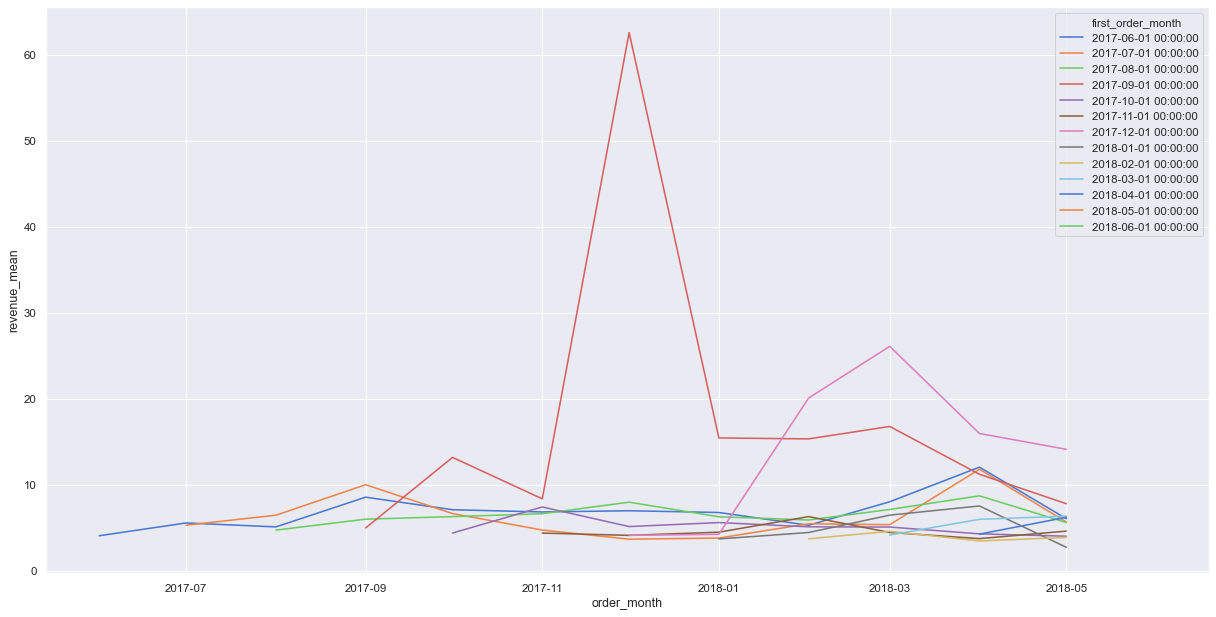

In [33]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10), dpi=75)
sns.lineplot(x="order_month", y="revenue_mean",
             hue="first_order_month",palette="muted",
             data=orders_cohort)

### Вывод
Нашли средний чек каждой когорты по месяцам. Видим скачок у сентябрьской когорты в декабре. 

### Сколько денег приносят? (LTV)

In [34]:
# Посчитаем количество новых покупателей за каждый месяц
orders_cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
orders_cohort_sizes.columns = ['first_order_month', 'n_buyers']
report = pd.merge(orders_cohort_sizes, orders_cohort, on='first_order_month')

In [35]:
# Добавим возраст когорты
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
display(report.head())

first_order_month  n_buyers order_month  revenue   uid  revenue_mean  age
0        2017-06-01      2023  2017-06-01  9557.49  2354      4.060106    0
1        2017-06-01      2023  2017-07-01   981.82   177      5.547006    1
2        2017-06-01      2023  2017-08-01   885.34   174      5.088161    2
3        2017-06-01      2023  2017-09-01  1931.30   226      8.545575    3
4        2017-06-01      2023  2017-10-01  2068.58   292      7.084178    4

In [36]:
# Найдем LTV
# Считаем по выручке, так как валовой прибыли у нас нет
report['ltv'] = report['revenue'] / report['n_buyers']

orders_ltv = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)

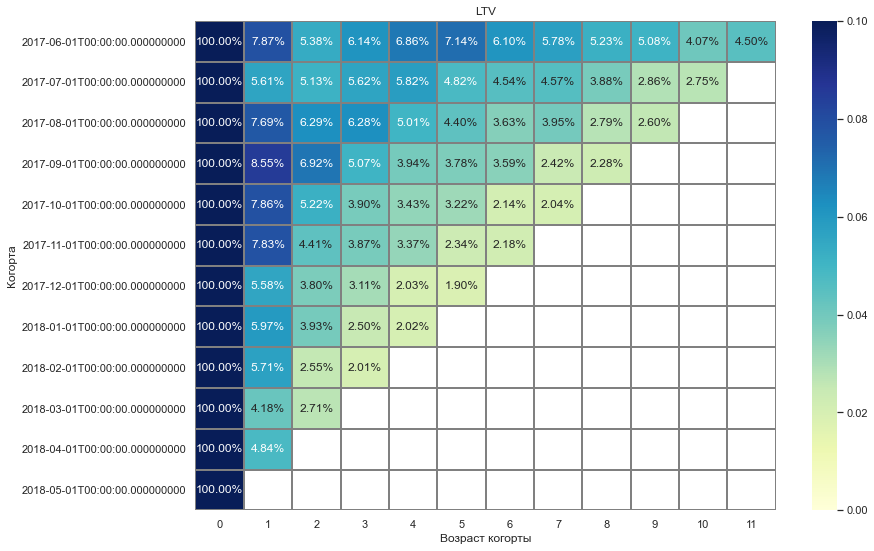

In [37]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
g=sns.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=1,cmap="YlGnBu", linecolor='gray',vmin=0, vmax=0.1);
g.set(title='LTV')
g.set(xlabel='Возраст когорты', ylabel='Когорта');

### Вывод
Был рассчитан LTV («пожизненная» ценность клиента). Видим, что первая когорта принесла в среднем больше денег и на 11 месяц имеем  LTV - 4,5%.

# Сколько денег потратили? Всего / на каждый источник / по времени

In [38]:
display(costs.head())

source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

In [39]:
print('Общие затраты:', costs['costs'].sum())

Общие затраты: 329131.62


source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

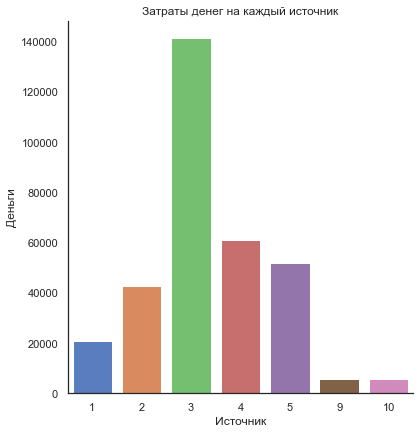

In [40]:
# Определим затраты по источникам
costs_per_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
display(costs_per_source)
g = sns.catplot(x='source_id', y="costs", data=costs_per_source, height=6, kind="bar", palette="muted")
g.set(title='Затраты денег на каждый источник')
g.set(xlabel='Источник', ylabel='Деньги');

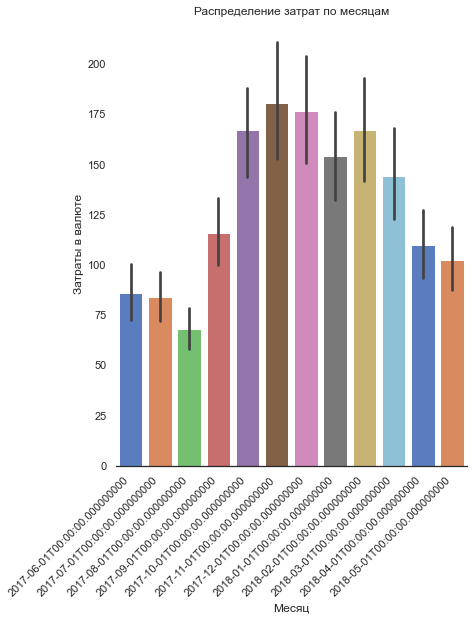

In [41]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
g = sns.catplot(x='costs_month', y='costs',
                data=costs, height=7, kind="bar",palette="muted")
g.despine(left=True)
g.set_xticklabels(rotation=45,horizontalalignment='right')
g.set(title='Распределение затрат по месяцам')
g.set(xlabel='Месяц', ylabel='Затраты в валюте')

### Вывод
Видим, что общие траты составили - 329131.62.

Больше всего денег было потрачено на 3ий источник. Больше всего денег было потрачено в период с октября по декабрь 2017г.


### Сколько стоило привлечение одного покупателя из каждого источника?  На сколько окупились расходы? (ROI)

In [42]:
#Сгруппируем заказы по uid и order_month
orders_group = orders_new.groupby(['uid','order_month','first_order_month']).agg({'revenue':'sum'}).reset_index()
orders_group.info()
display(orders_group.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41019 entries, 0 to 41018
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   uid                41019 non-null  uint64        
 1   order_month        41019 non-null  datetime64[ns]
 2   first_order_month  41019 non-null  datetime64[ns]
 3   revenue            41019 non-null  float64       
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.3 MB


uid order_month first_order_month  revenue
0   313578113262317  2018-01-01        2018-01-01     0.55
1  1575281904278712  2017-06-01        2017-06-01     3.05
2  2429014661409475  2017-10-01        2017-10-01    73.33
3  2464366381792757  2018-01-01        2018-01-01     2.44
4  2551852515556206  2017-11-01        2017-11-01    10.99

In [43]:
# Отсортируем visits по возрастанию даты начала сеанса
visits = visits.sort_values('start_ts')
display(visits.head())
# Сгруппируем по uid и возьмем первый source_id, через который пришел пользователь
visits_group= visits.groupby(['uid','first_visits_month'])\
.agg({'source_id':'first','device':'first'}).reset_index()

device              end_ts  source_id            start_ts  \
308527  desktop 2017-06-01 00:02:00          5 2017-06-01 00:01:00   
260646  desktop 2017-06-01 00:02:00          3 2017-06-01 00:02:00   
245715  desktop 2017-06-01 00:16:00          3 2017-06-01 00:02:00   
235930  desktop 2017-06-01 00:04:00          3 2017-06-01 00:04:00   
11727   desktop 2017-06-01 00:11:00          1 2017-06-01 00:09:00   

                         uid visits_date  visits_week  visits_month  \
308527  13890188992670018146  2017-06-01           22             6   
260646  16152015161748786004  2017-06-01           22             6   
245715  16706502037388497502  2017-06-01           22             6   
235930   8842918131297115663  2017-06-01           22             6   
11727   10329302124590727494  2017-06-01           22             6   

        visits_year  session_duration   first_visits_date visits_month_date  \
308527         2017                60 2017-06-01 00:01:00        2017-06-01   
260646         2017                 0 2017-06-01 00:02:00        2017-06-01   
245715         2017               840 2017-06-01 00:02:00        2017-06-01   
235930         2017                 0 2017-06-01 00:04:00        2017-06-01   
11727          2017               120 2017-06-01 00:09:00        2017-06-01   

       first_visits_month  cohort_lifetime  
308527         2017-06-01                0  
260646         2017-06-01                0  
245715         2017-06-01                0  
235930         2017-06-01                0  
11727          2017-06-01                0

In [44]:
# Объединим сгруппированные таблицы 
order_visit = orders_group.merge(visits_group, how='left', left_on='uid', 
                                 right_on='uid')

In [45]:
display(order_visit.head())

uid order_month first_order_month  revenue first_visits_month  \
0   313578113262317  2018-01-01        2018-01-01     0.55         2017-09-01   
1  1575281904278712  2017-06-01        2017-06-01     3.05         2017-06-01   
2  2429014661409475  2017-10-01        2017-10-01    73.33         2017-10-01   
3  2464366381792757  2018-01-01        2018-01-01     2.44         2018-01-01   
4  2551852515556206  2017-11-01        2017-11-01    10.99         2017-11-01   

   source_id   device  
0          2  desktop  
1         10    touch  
2          3  desktop  
3          5  desktop  
4          5  desktop

In [46]:
# Сгруппируем costs по costs_month и source_id
costs_group = costs.groupby(['costs_month','source_id']).agg({'costs':'sum'}).reset_index()
costs_group.head()

costs_month  source_id    costs
0  2017-06-01          1  1125.61
1  2017-06-01          2  2427.38
2  2017-06-01          3  7731.65
3  2017-06-01          4  3514.80
4  2017-06-01          5  2616.12

## Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

In [53]:
# Напишем функцию, которая рассчитывает CAC и выводит таблицу с ROMI для каждого ресурса
def ltv_per_source(df,source):
    orders_cohort =  df.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()
    orders_cohort_sizes = df.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    orders_cohort_sizes.columns = ['first_order_month', 'n_buyers']
    report = pd.merge(orders_cohort_sizes, orders_cohort, on='first_order_month')
    report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    report['ltv'] = report['revenue'] / report['n_buyers']
    report_new = report.merge(costs_group.loc[costs_group['source_id']==source], 
                              left_on='first_order_month', right_on='costs_month')
    report_new['cac'] = report_new['costs'] / report_new['n_buyers']
    print(report_new.groupby('first_order_month').agg({'cac':'mean'}))
    print('Средняя цена привлечения клиента', report_new.groupby('first_order_month').agg({'cac':'mean'}).mean())
    report_new['romi'] = report_new['ltv'] / report_new['cac']
    output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
    # Усредним значения каждой колонки и «сложим» таблицу в единую строку
    output_mean_source = output.cumsum(axis=1).mean(axis=0)
    print('------------------')
    print('Усредним ROMI для когорт')
    print(output_mean_source)
    print('------------------------------------')
    output=output.cumsum(axis=1).round(2)
    return output
    


 source_id =  1
                        cac
first_order_month          
2017-06-01         5.924263
2017-07-01         6.705500
2017-08-01         8.423097
2017-09-01         6.616784
2017-10-01         6.811029
2017-11-01         7.546790
2017-12-01         7.073112
2018-01-01         9.185630
2018-02-01         8.016291
2018-03-01         6.736975
2018-04-01         7.416145
2018-05-01         6.089668
Средняя цена привлечения клиента cac    7.212107
dtype: float64
------------------
Усредним ROMI для когорт
age
0     0.892768
1     1.048742
2     1.258675
3     1.363425
4     1.565990
5     1.768576
6     2.038114
7     2.362370
8     2.860597
9     3.462846
10    4.256256
11    5.679045
dtype: float64
------------------------------------

 source_id =  2
                         cac
first_order_month           
2017-06-01         10.329277
2017-07-01         11.216875
2017-08-01         14.723984
2017-09-01         13.509774
2017-10-01         12.234848
2017-11-01         13.18512

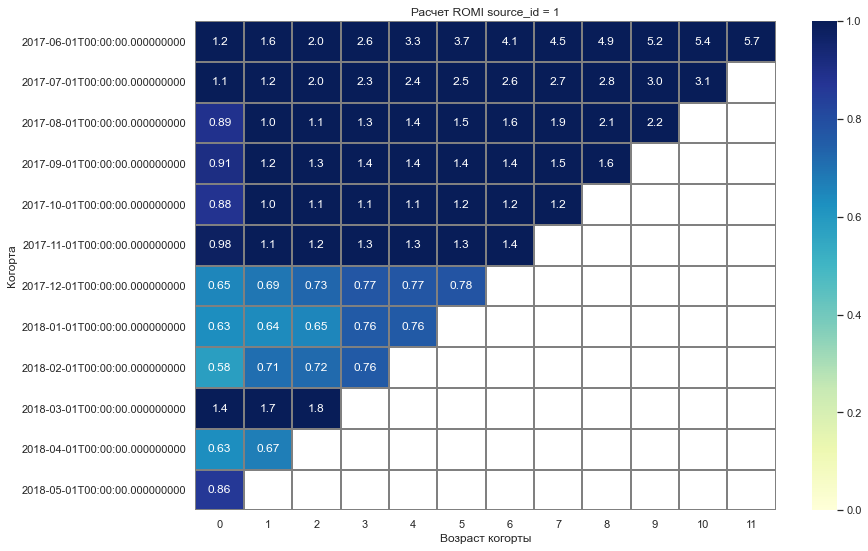

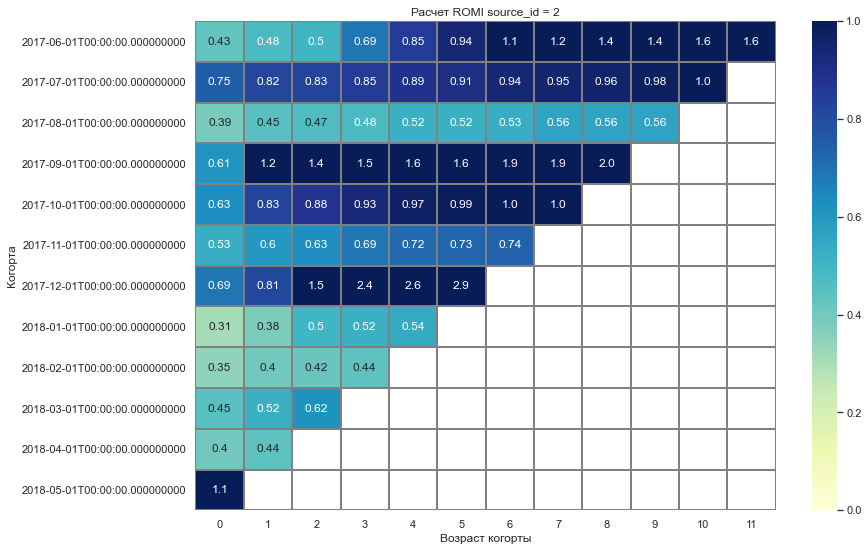

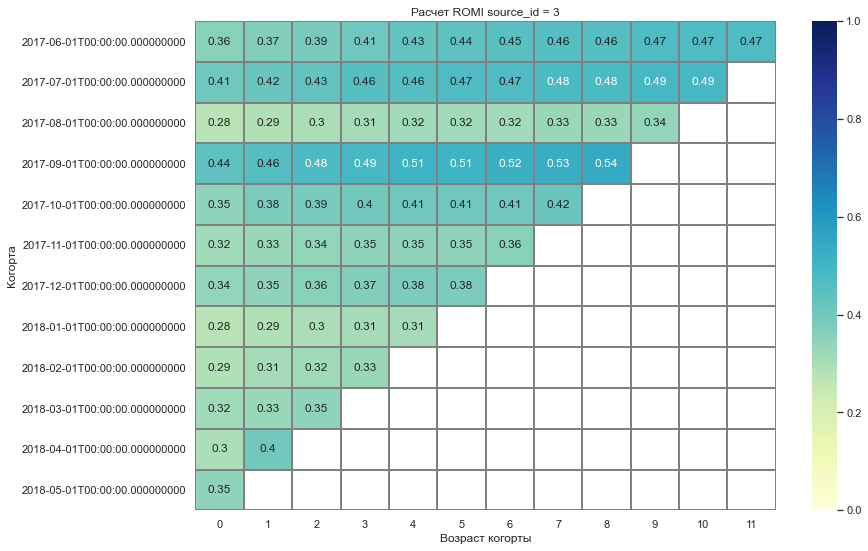

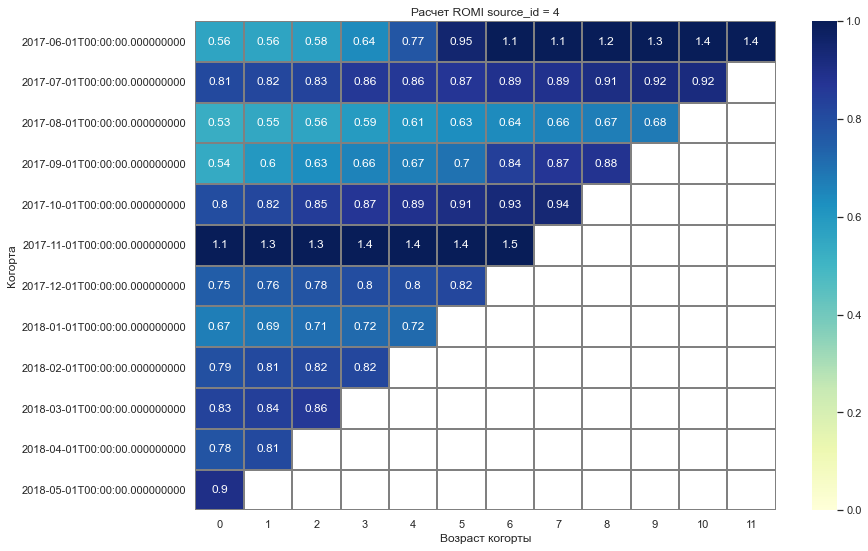

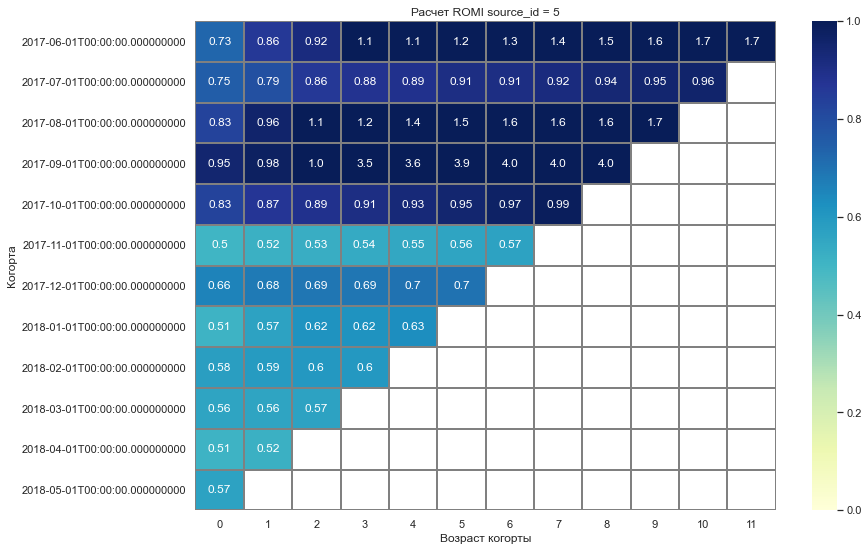

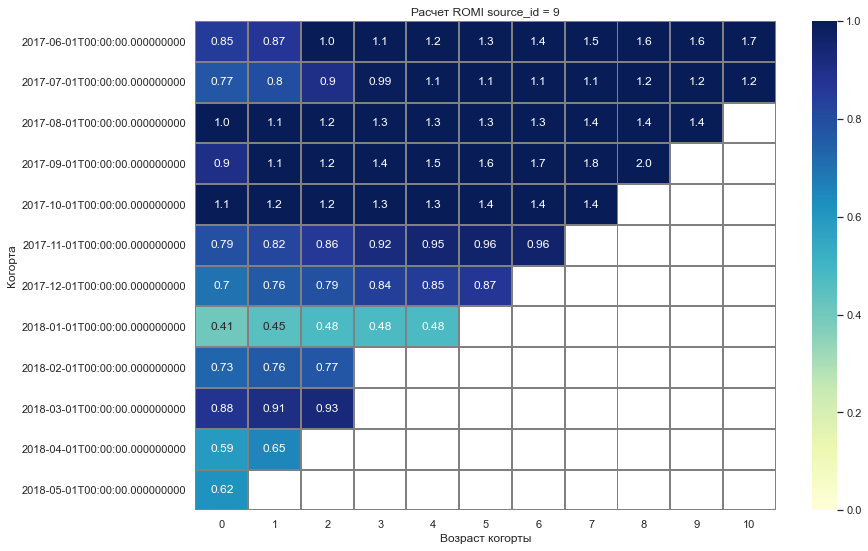

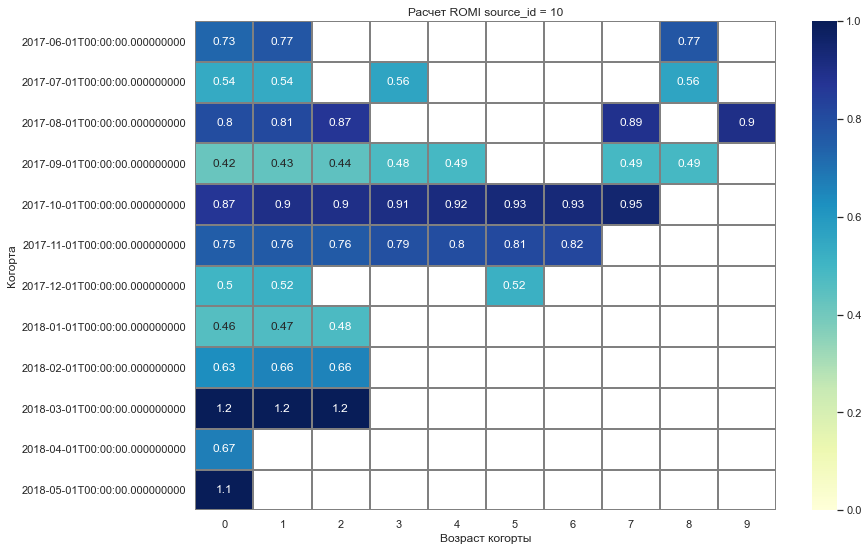

In [54]:
# Определим уникальные ресурсы 
sources = costs['source_id'].unique()
# Циклом по ресурсам выведем полученные от функции данные
for source in sources:
    print('\n source_id = ', source)
    output = ltv_per_source(order_visit.loc[order_visit['source_id']==source], source)
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    g=sns.heatmap(output, annot=True, fmt='.2', linewidths=1,cmap="YlGnBu", linecolor='gray',vmin=0, vmax=1);
    title_name = 'Расчет ROMI source_id = ' + str(source)
    g.set(title=title_name)
    g.set(xlabel='Возраст когорты', ylabel='Когорта');

### Вывод
Средняя цена привлечения клиета на источник №3 выше (13.80), чем у остальных источников. Самая низкая цена привлечения клиента у источника №10 - 4.86. 

По показателю возврата инвестиций маркетинговых каналов лидирует источник №1. Хуже всех показал себя источник № 10. В большистве случаев (Источник №1) инвестиции отбиваются уже в первый месяц.

## Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

In [55]:
# Напишем функцию, которая рассчитывает метрики для каждого ресурса и устройства
def ltv_per_source_device(df, source, device):
    orders_cohort =  df.groupby(['first_order_month','order_month']).agg({'revenue':'sum',
                                                                          'uid':'count'}).reset_index()
    orders_cohort_sizes = df.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    orders_cohort_sizes.columns = ['first_order_month', 'n_buyers']
    report = pd.merge(orders_cohort_sizes, orders_cohort, on='first_order_month')
    report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    report['ltv'] = report['revenue'] / report['n_buyers']
    report['device'] = device
    report_new = report.merge(costs_group.loc[costs_group['source_id']==source], 
                              left_on='first_order_month', right_on='costs_month')
    report_new['cac'] = report_new['costs'] / report_new['n_buyers']
    report_new['romi'] = report_new['ltv'] / report_new['cac']
    return report_new

In [56]:
# Определим уникальные ресурсы и устройства
sources = costs['source_id'].unique()
devices = order_visit['device'].unique()
# Создадим новый DataFrame, который наполним значениями от функции
result = pd.DataFrame(columns=['first_order_month','n_buyers','order_month','revenue','age', 'ltv', 'device', 'costs_month','source_id', 'costs', 'cac', 'romi'])
for source in sources:
    for device in devices:
        output = ltv_per_source_device(order_visit.loc[(order_visit['source_id']==source) & (order_visit['device']==device)], source, device)
        result= result.append(output, ignore_index=True)
display(result.head())    



first_order_month n_buyers order_month  revenue age       ltv   device  \
0        2017-06-01      163  2017-06-01  1249.17   0  7.663620  desktop   
1        2017-06-01      163  2017-07-01   413.15   1  2.534663  desktop   
2        2017-06-01      163  2017-08-01   419.43   2  2.573190  desktop   
3        2017-06-01      163  2017-09-01   692.92   3  4.251043  desktop   
4        2017-06-01      163  2017-10-01   768.36   4  4.713865  desktop   

  costs_month source_id    costs       cac      romi    uid  
0  2017-06-01         1  1125.61  6.905583  1.109772  163.0  
1  2017-06-01         1  1125.61  6.905583  0.367045   15.0  
2  2017-06-01         1  1125.61  6.905583  0.372625   10.0  
3  2017-06-01         1  1125.61  6.905583  0.615595    8.0  
4  2017-06-01         1  1125.61  6.905583  0.682617   10.0

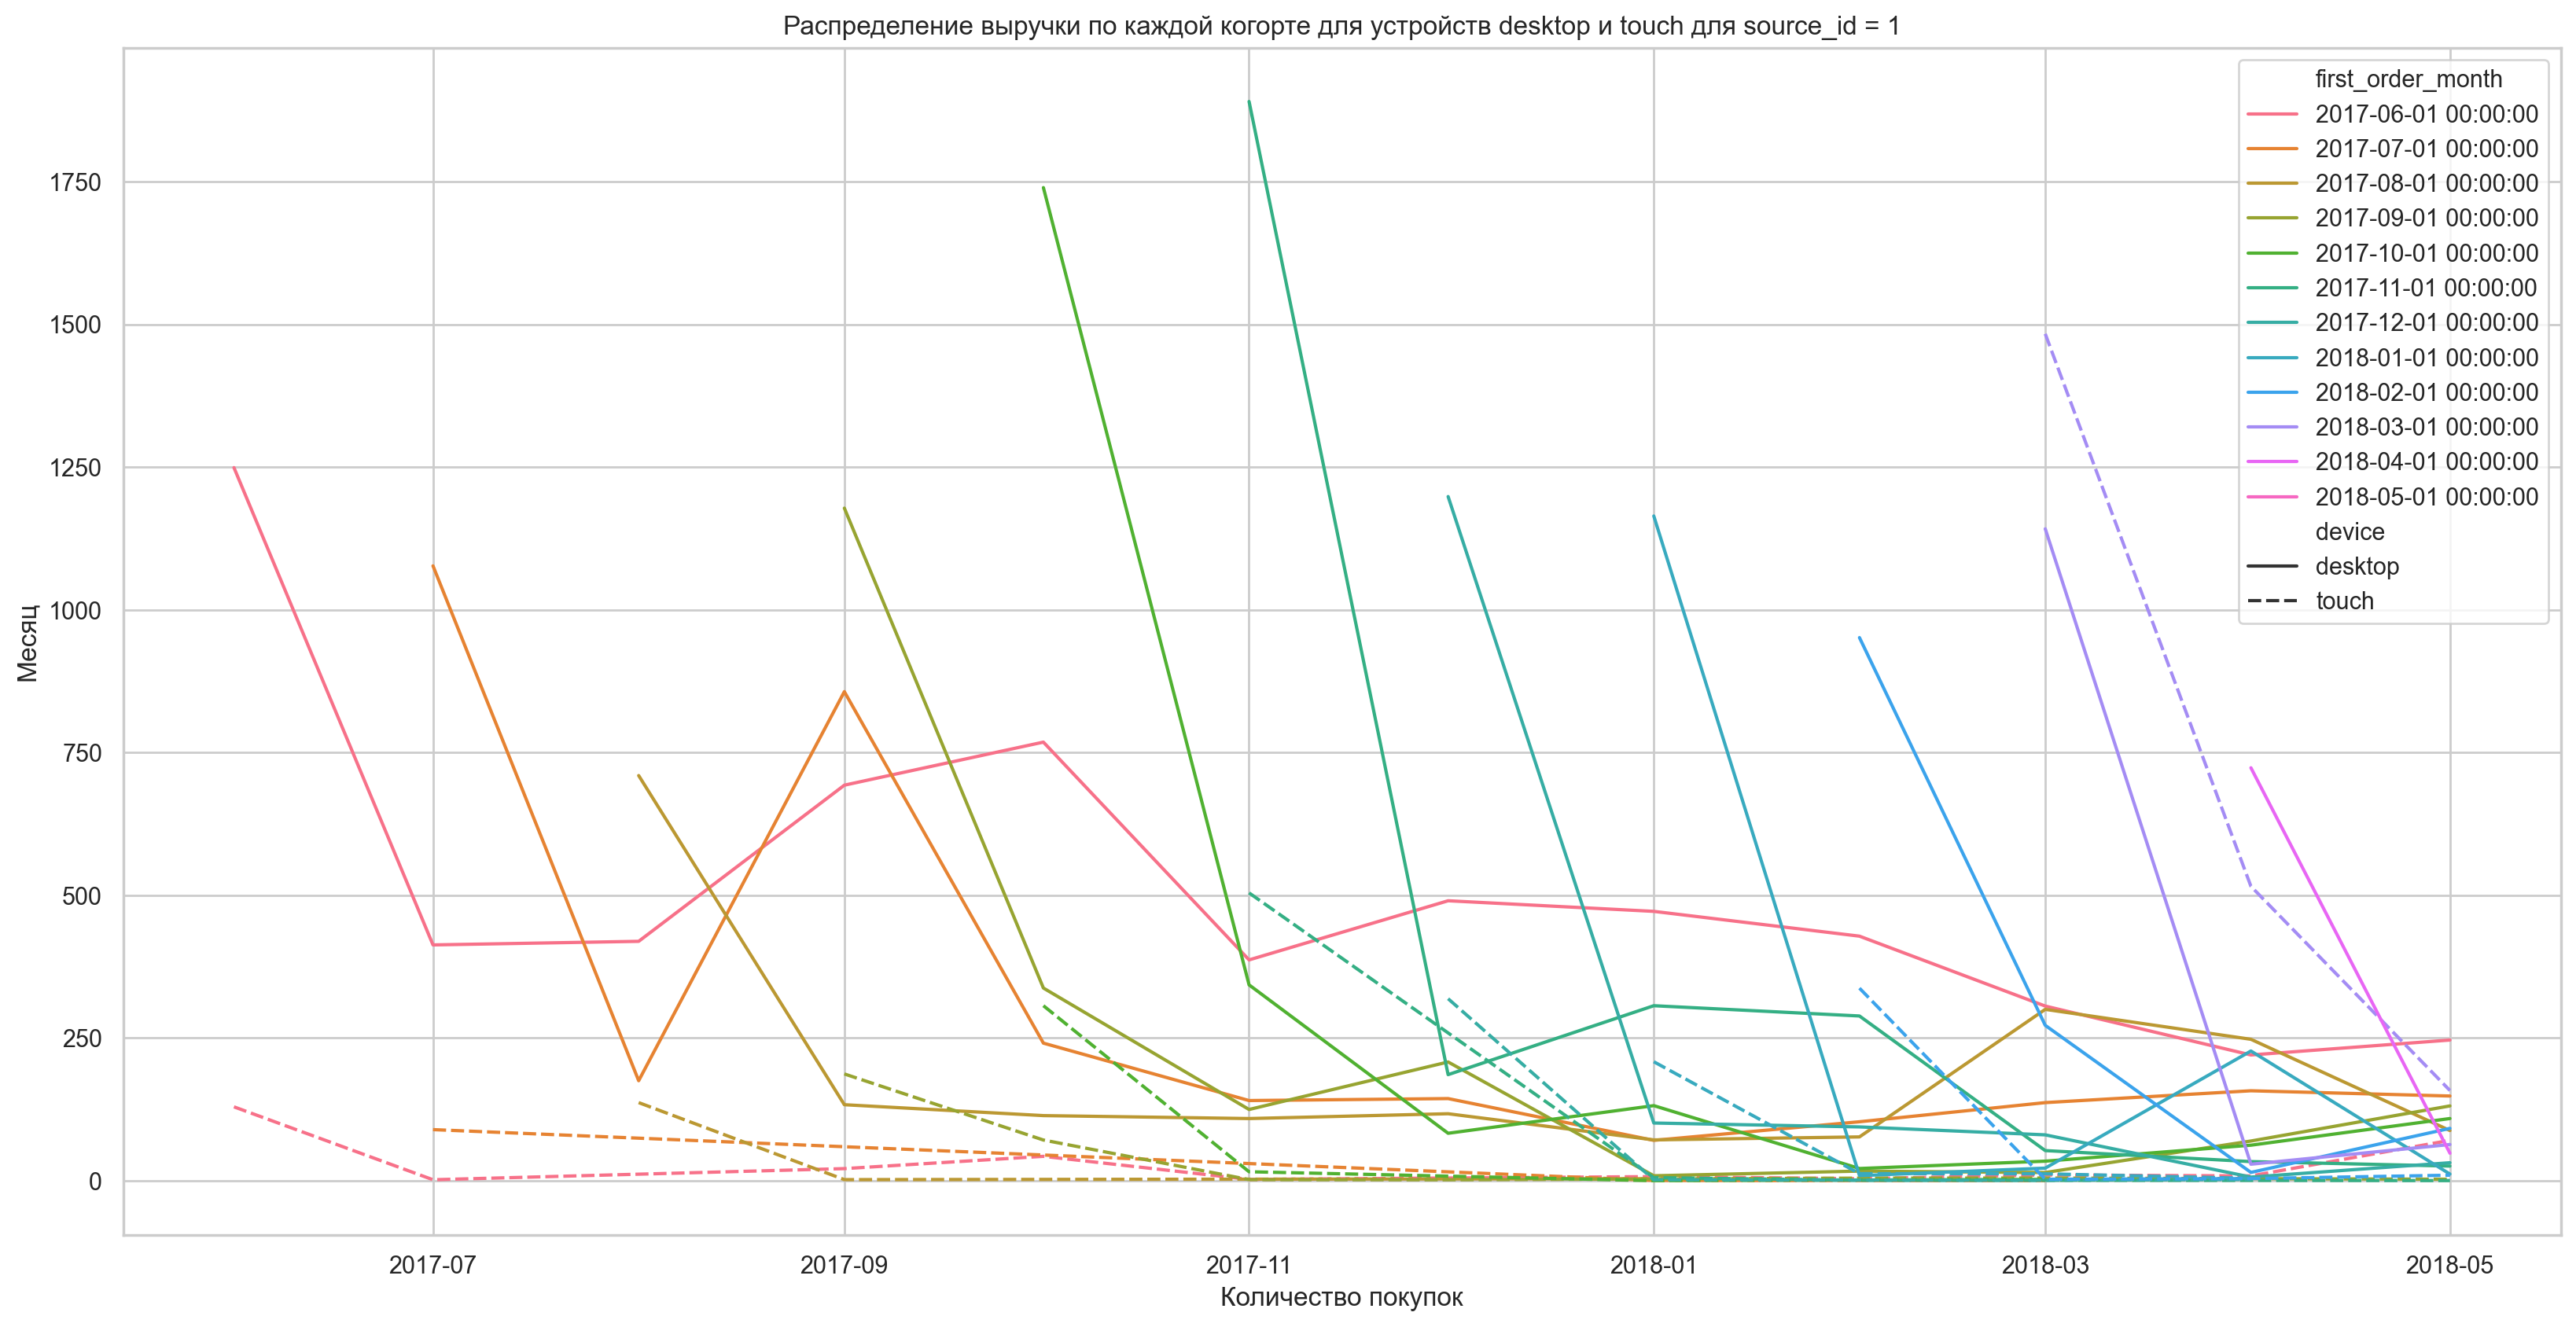

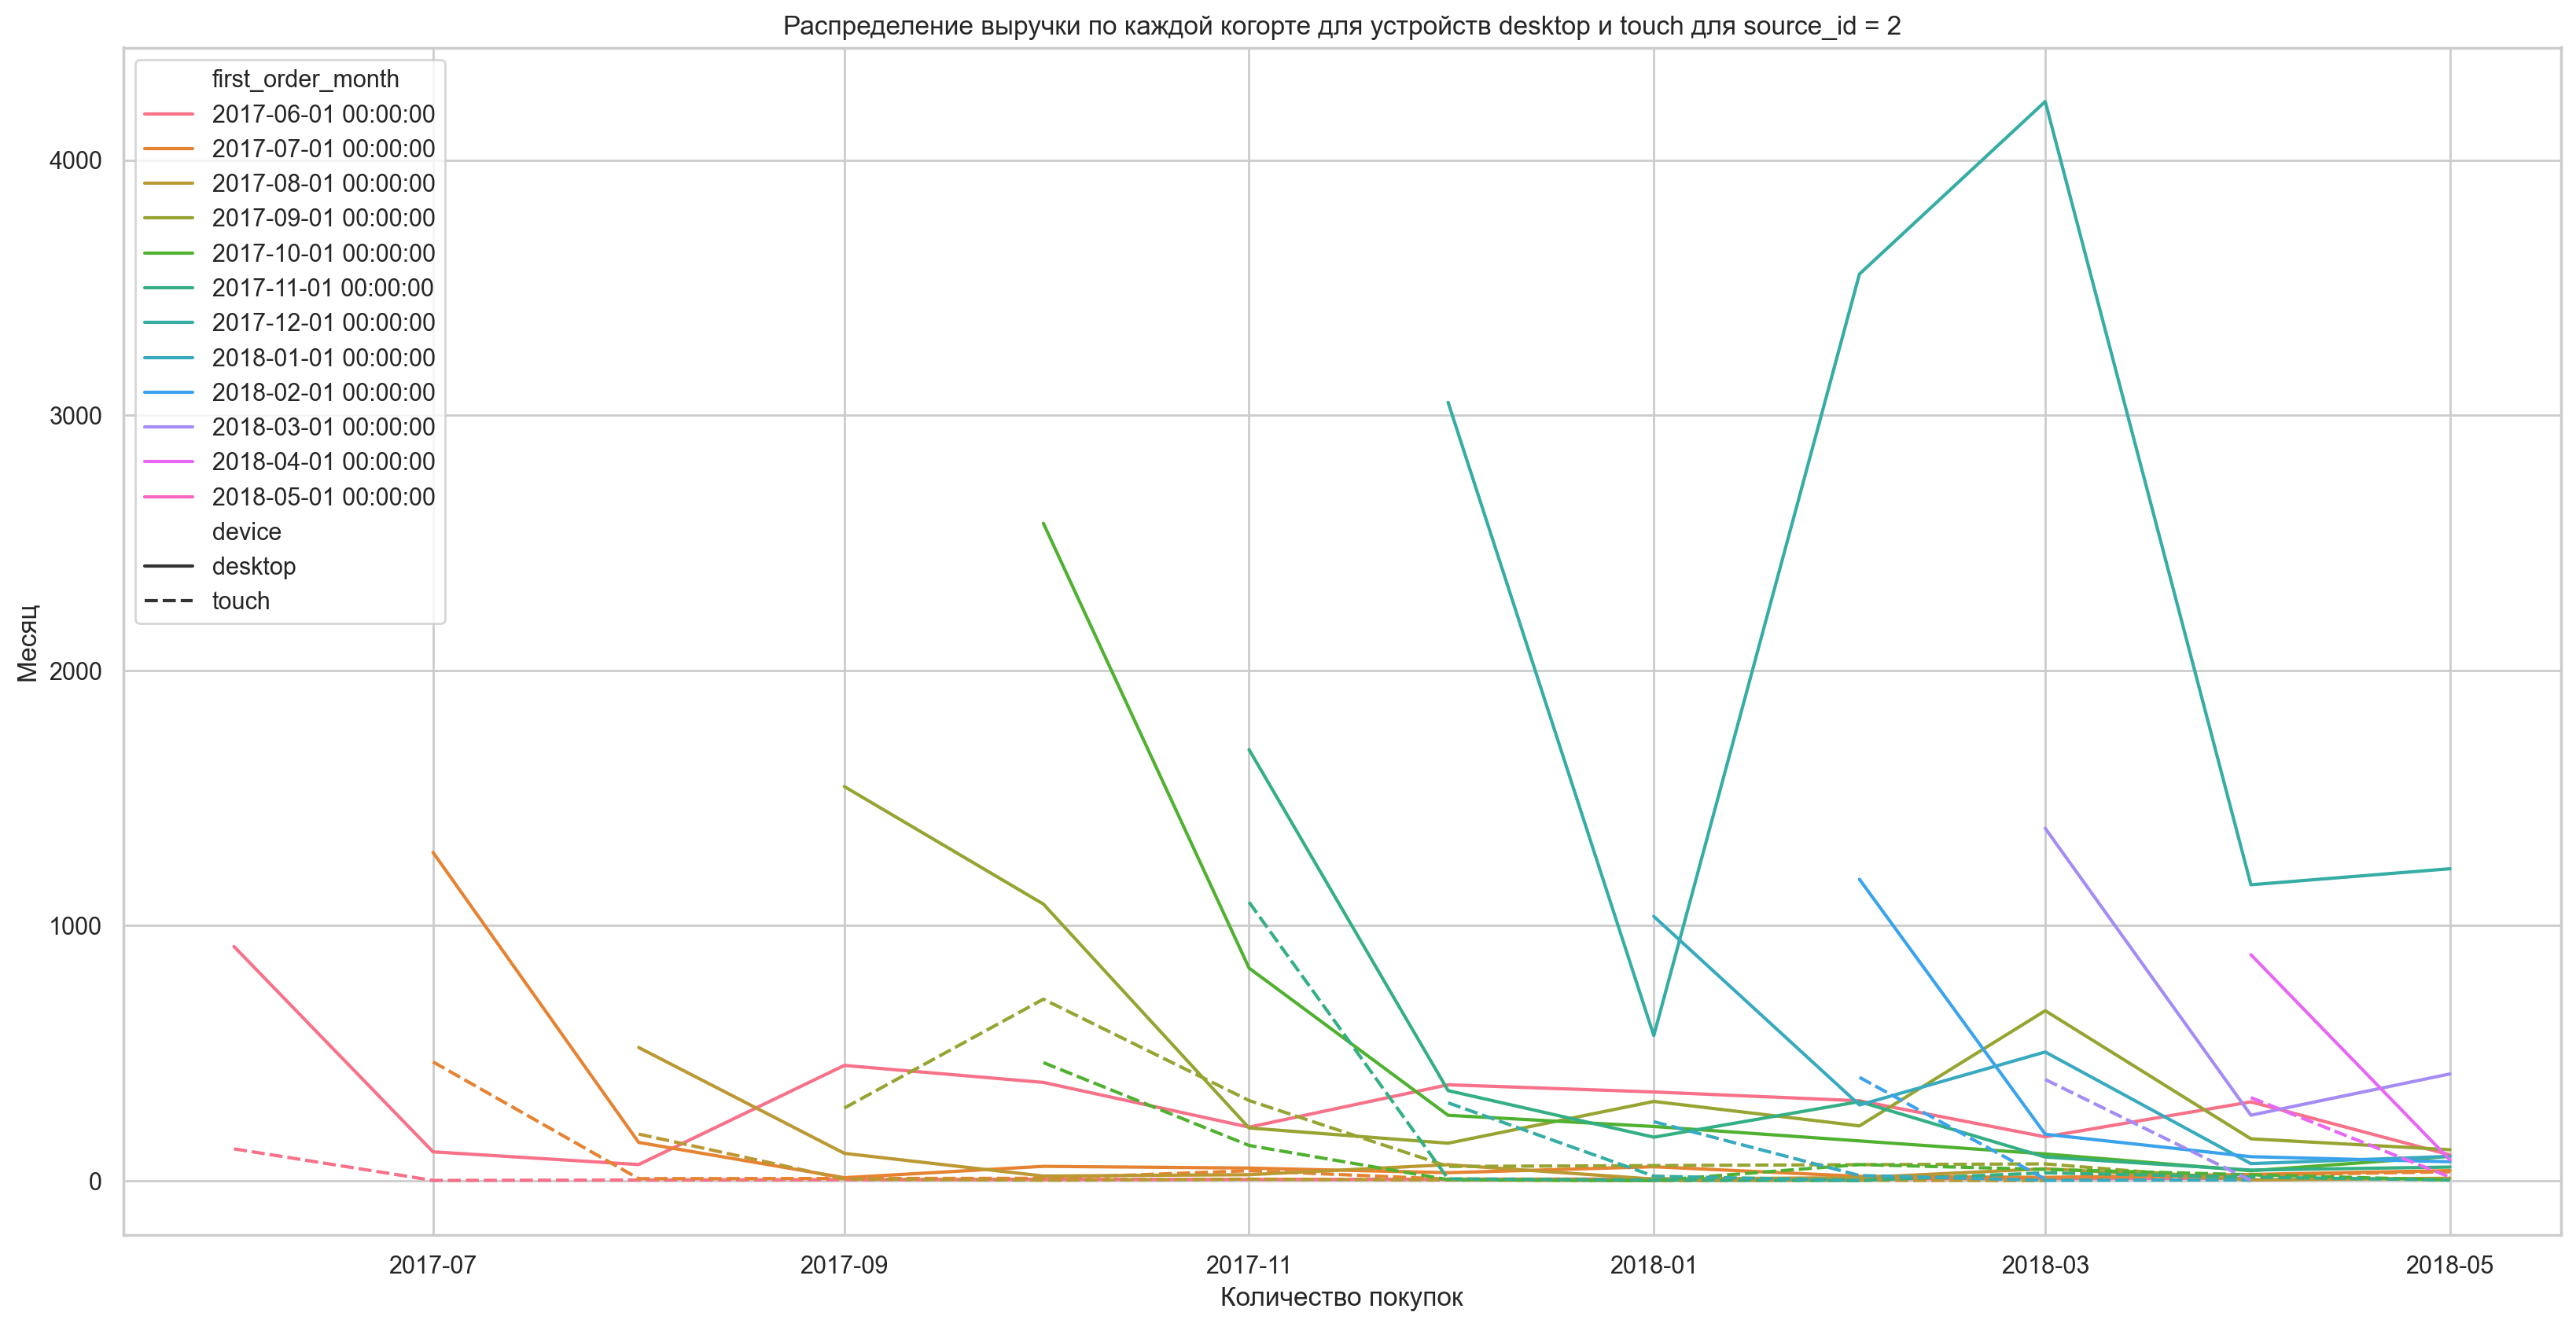

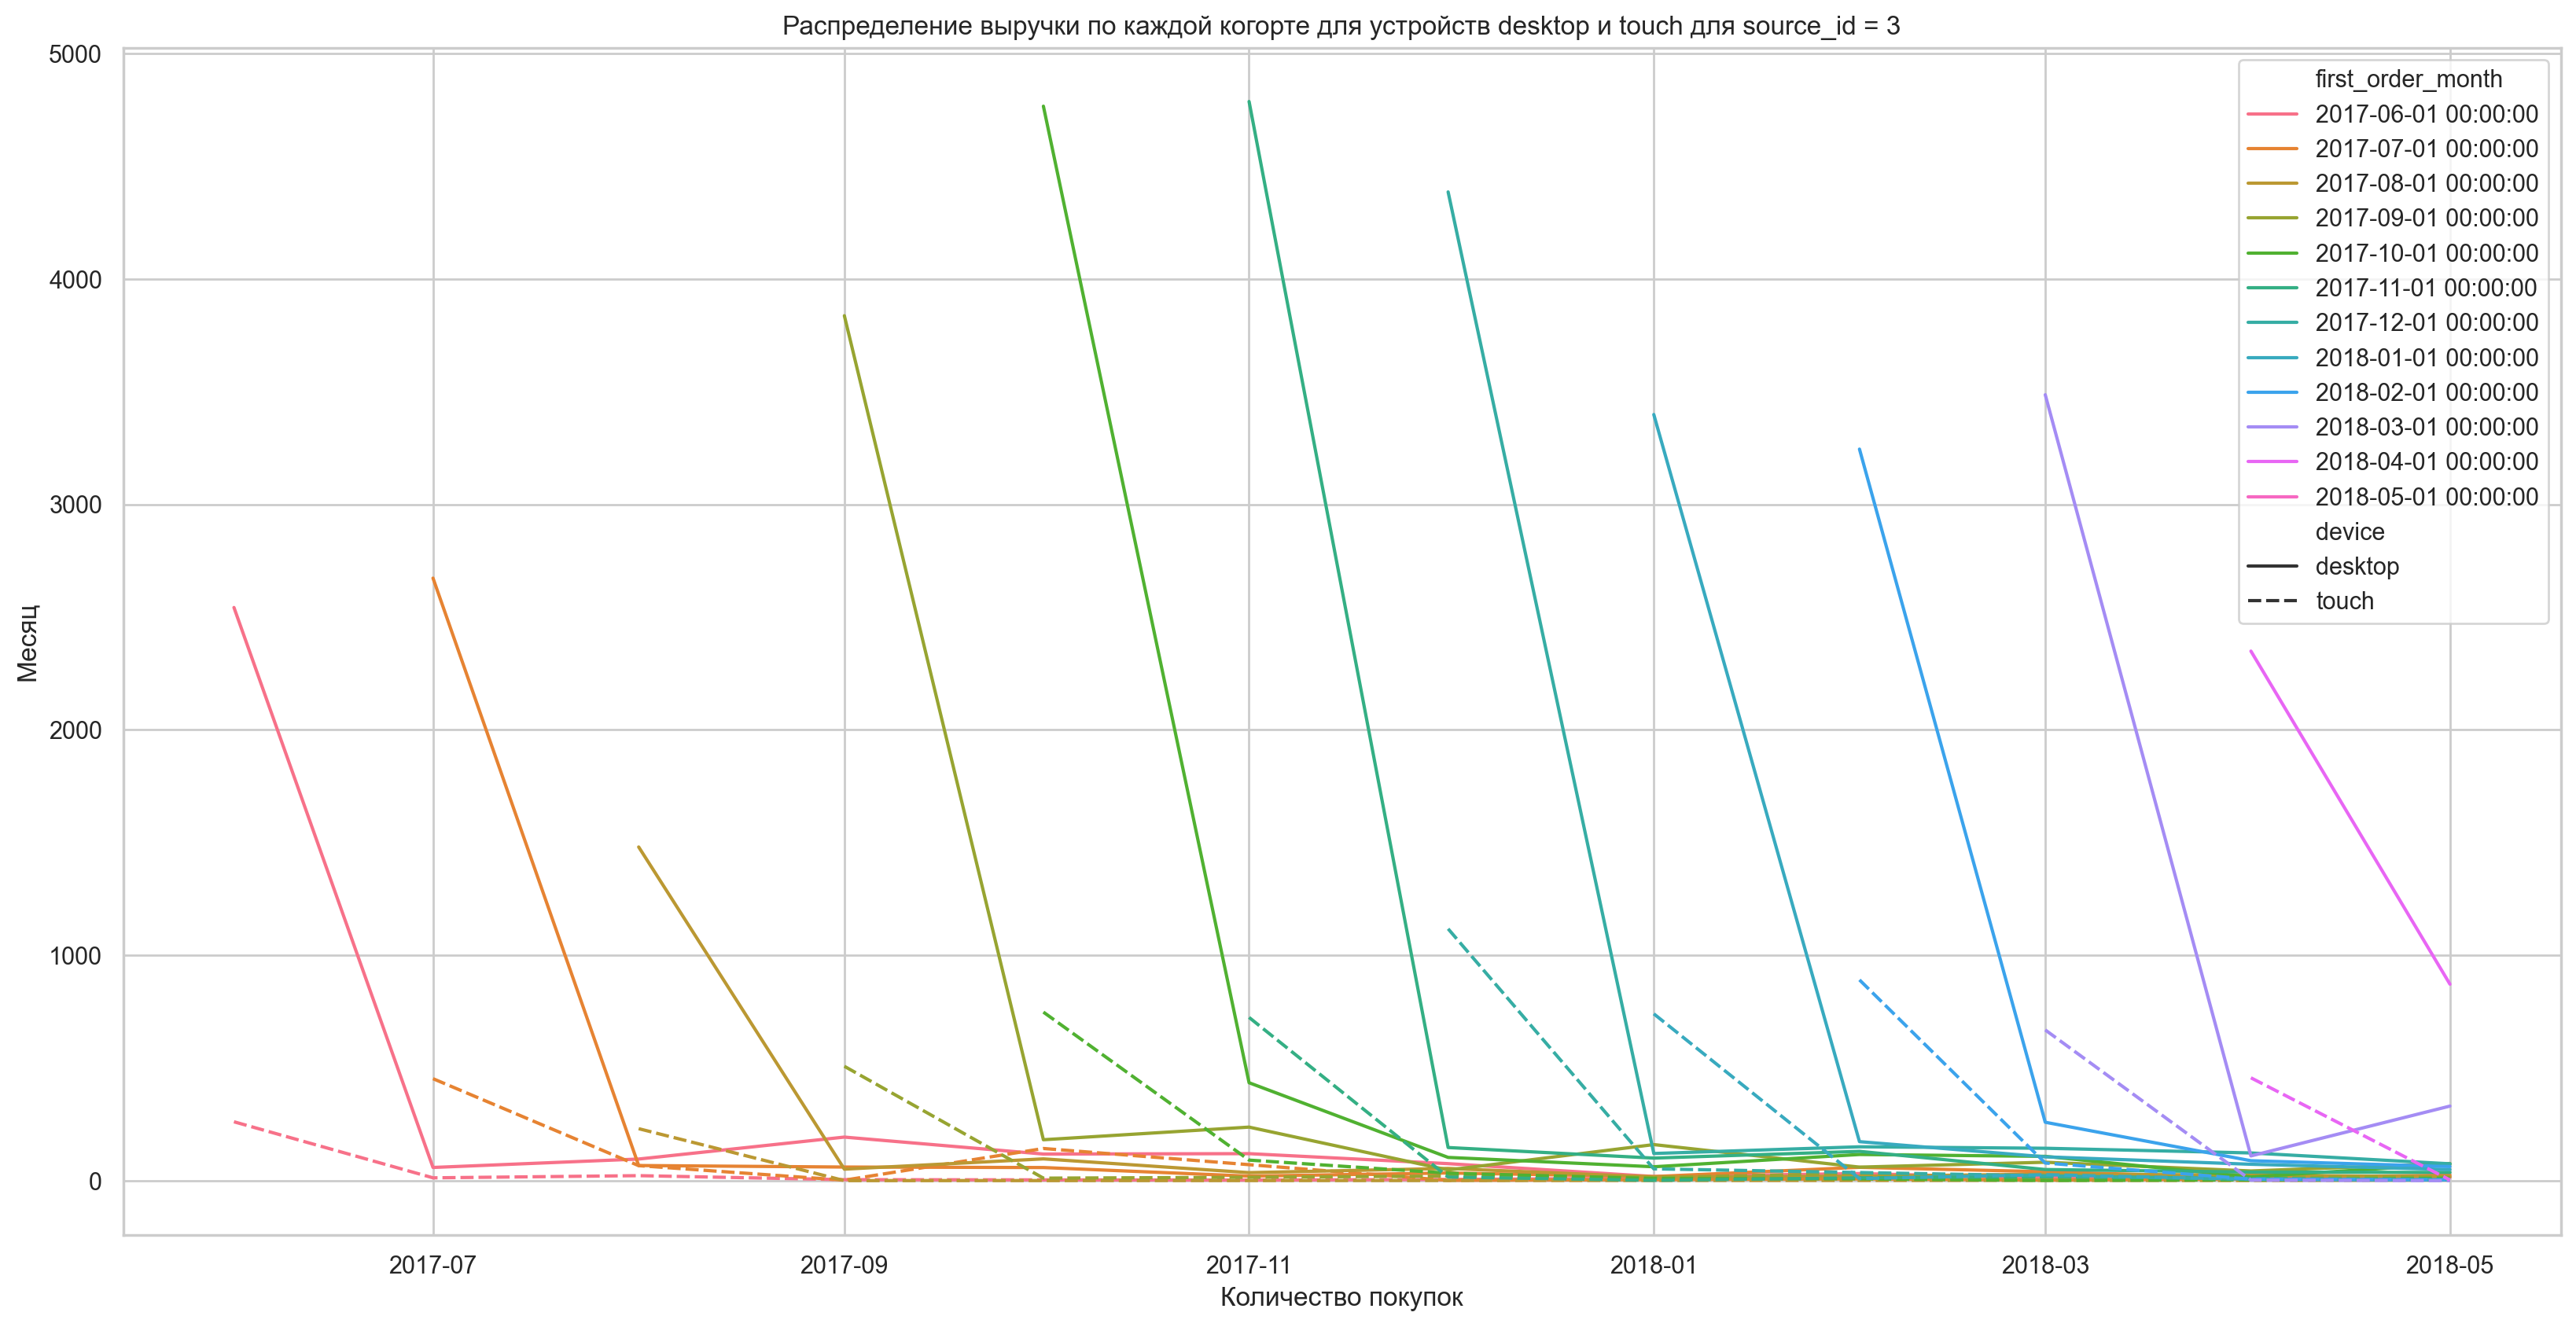

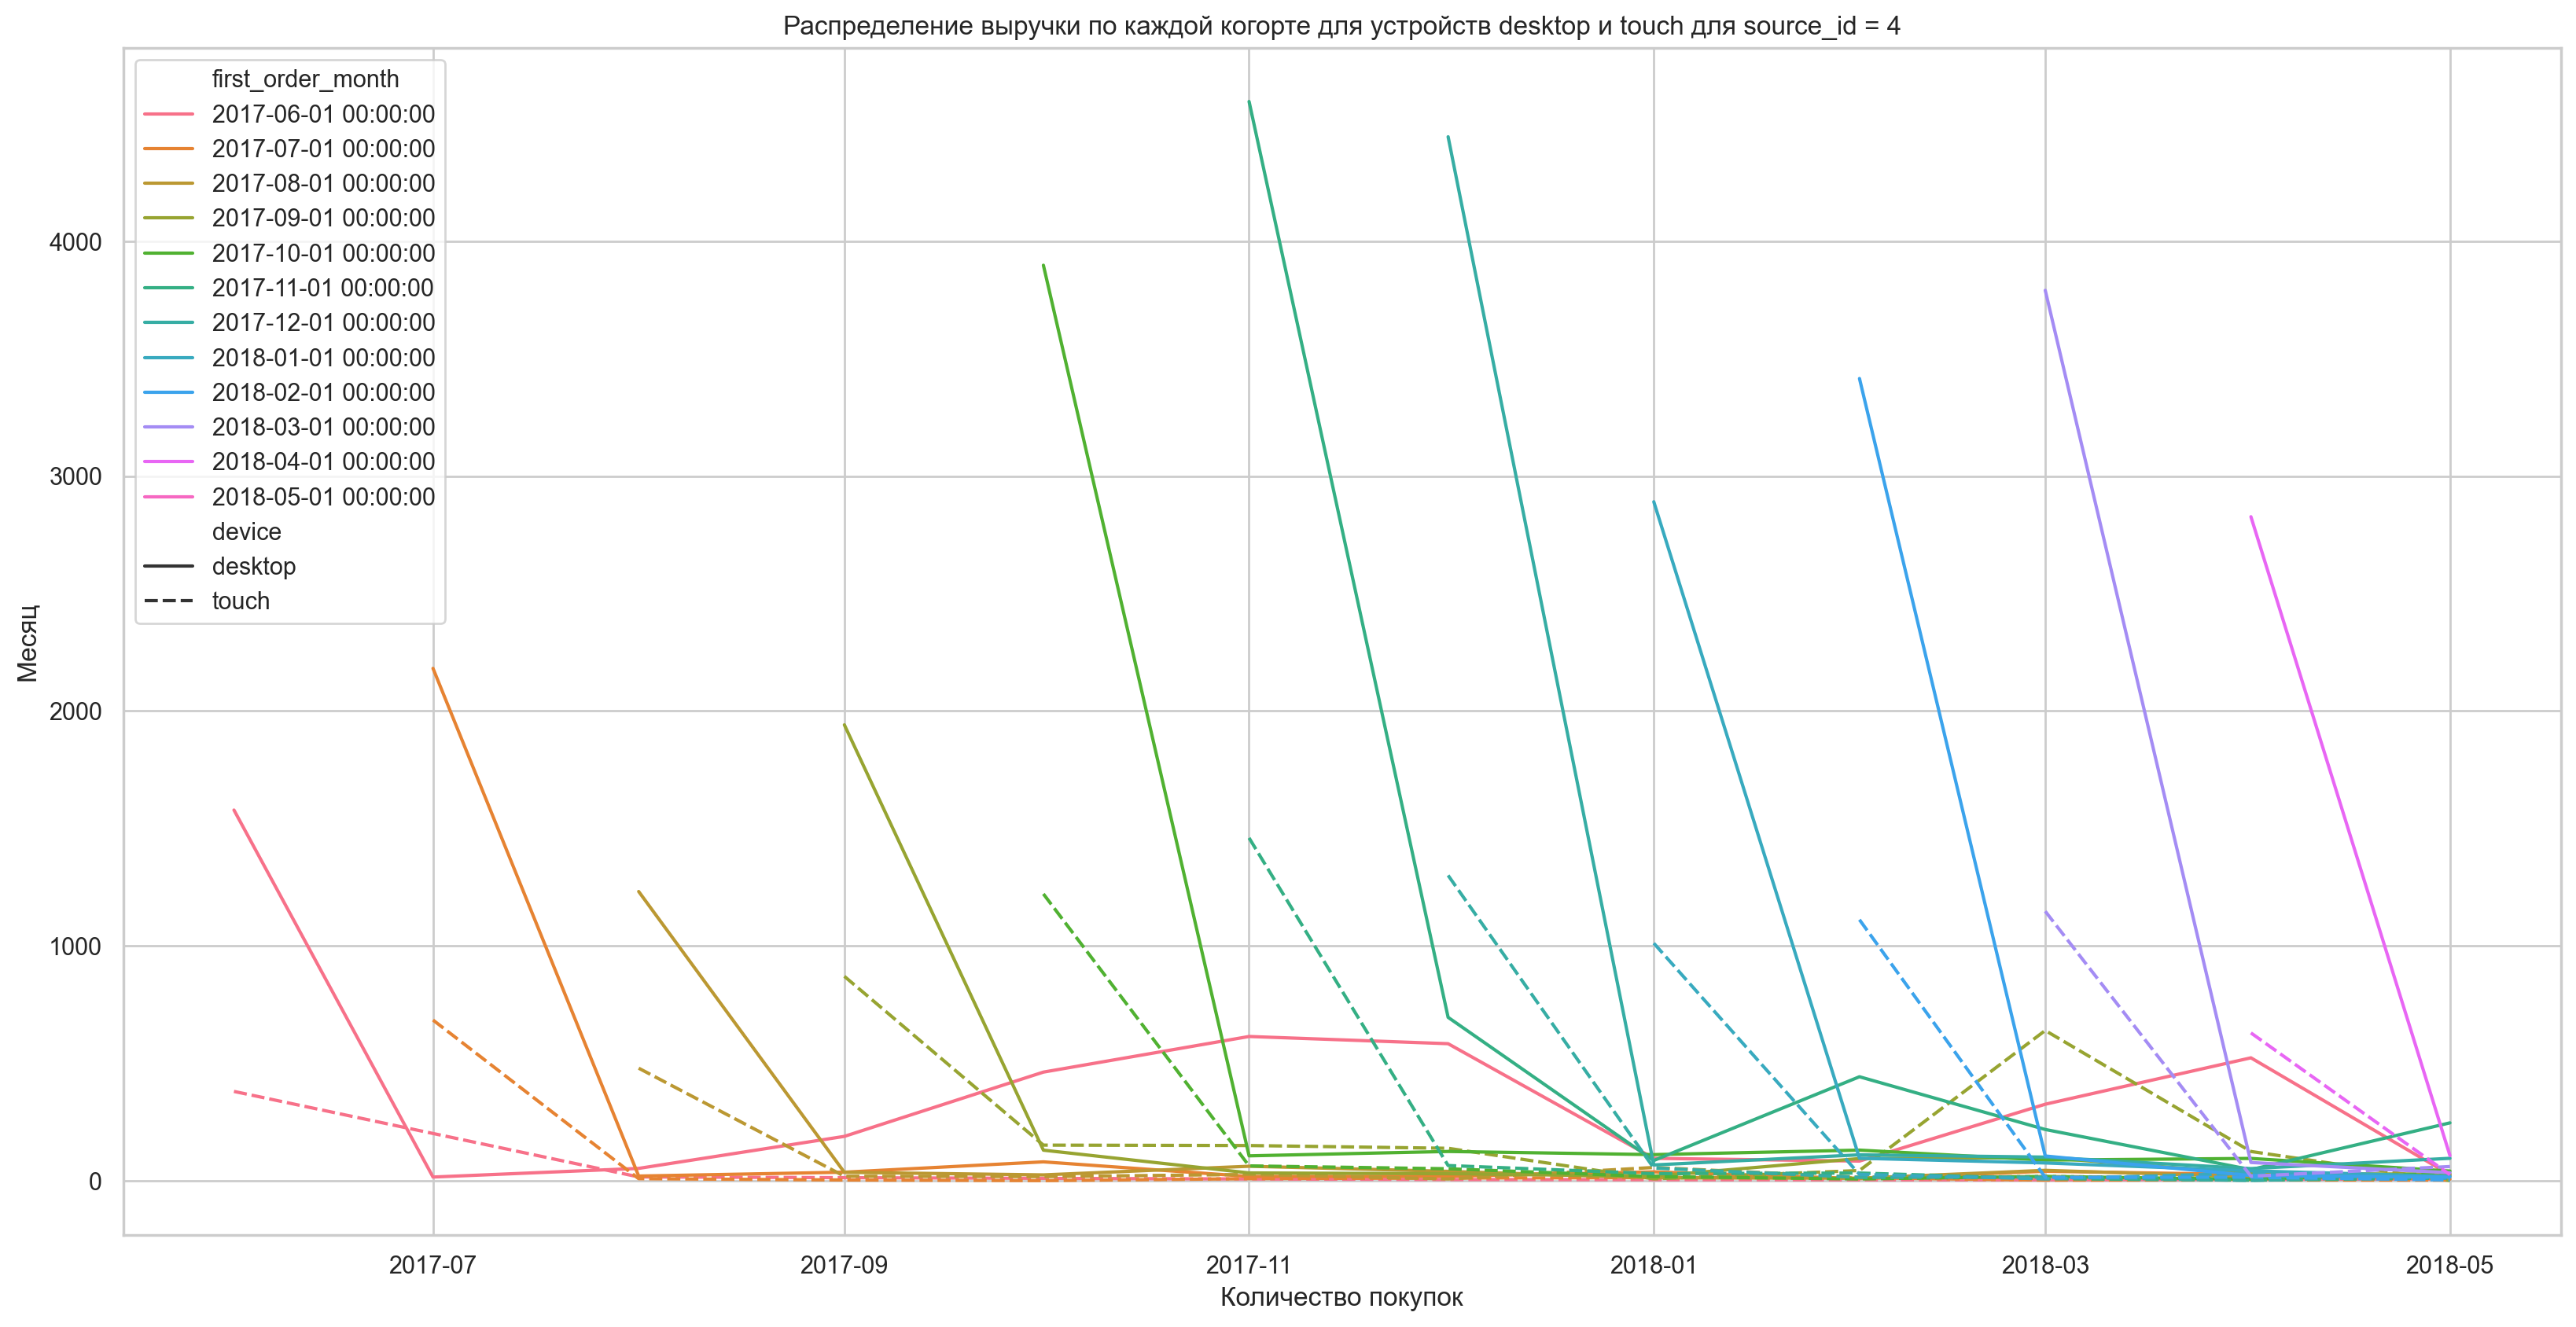

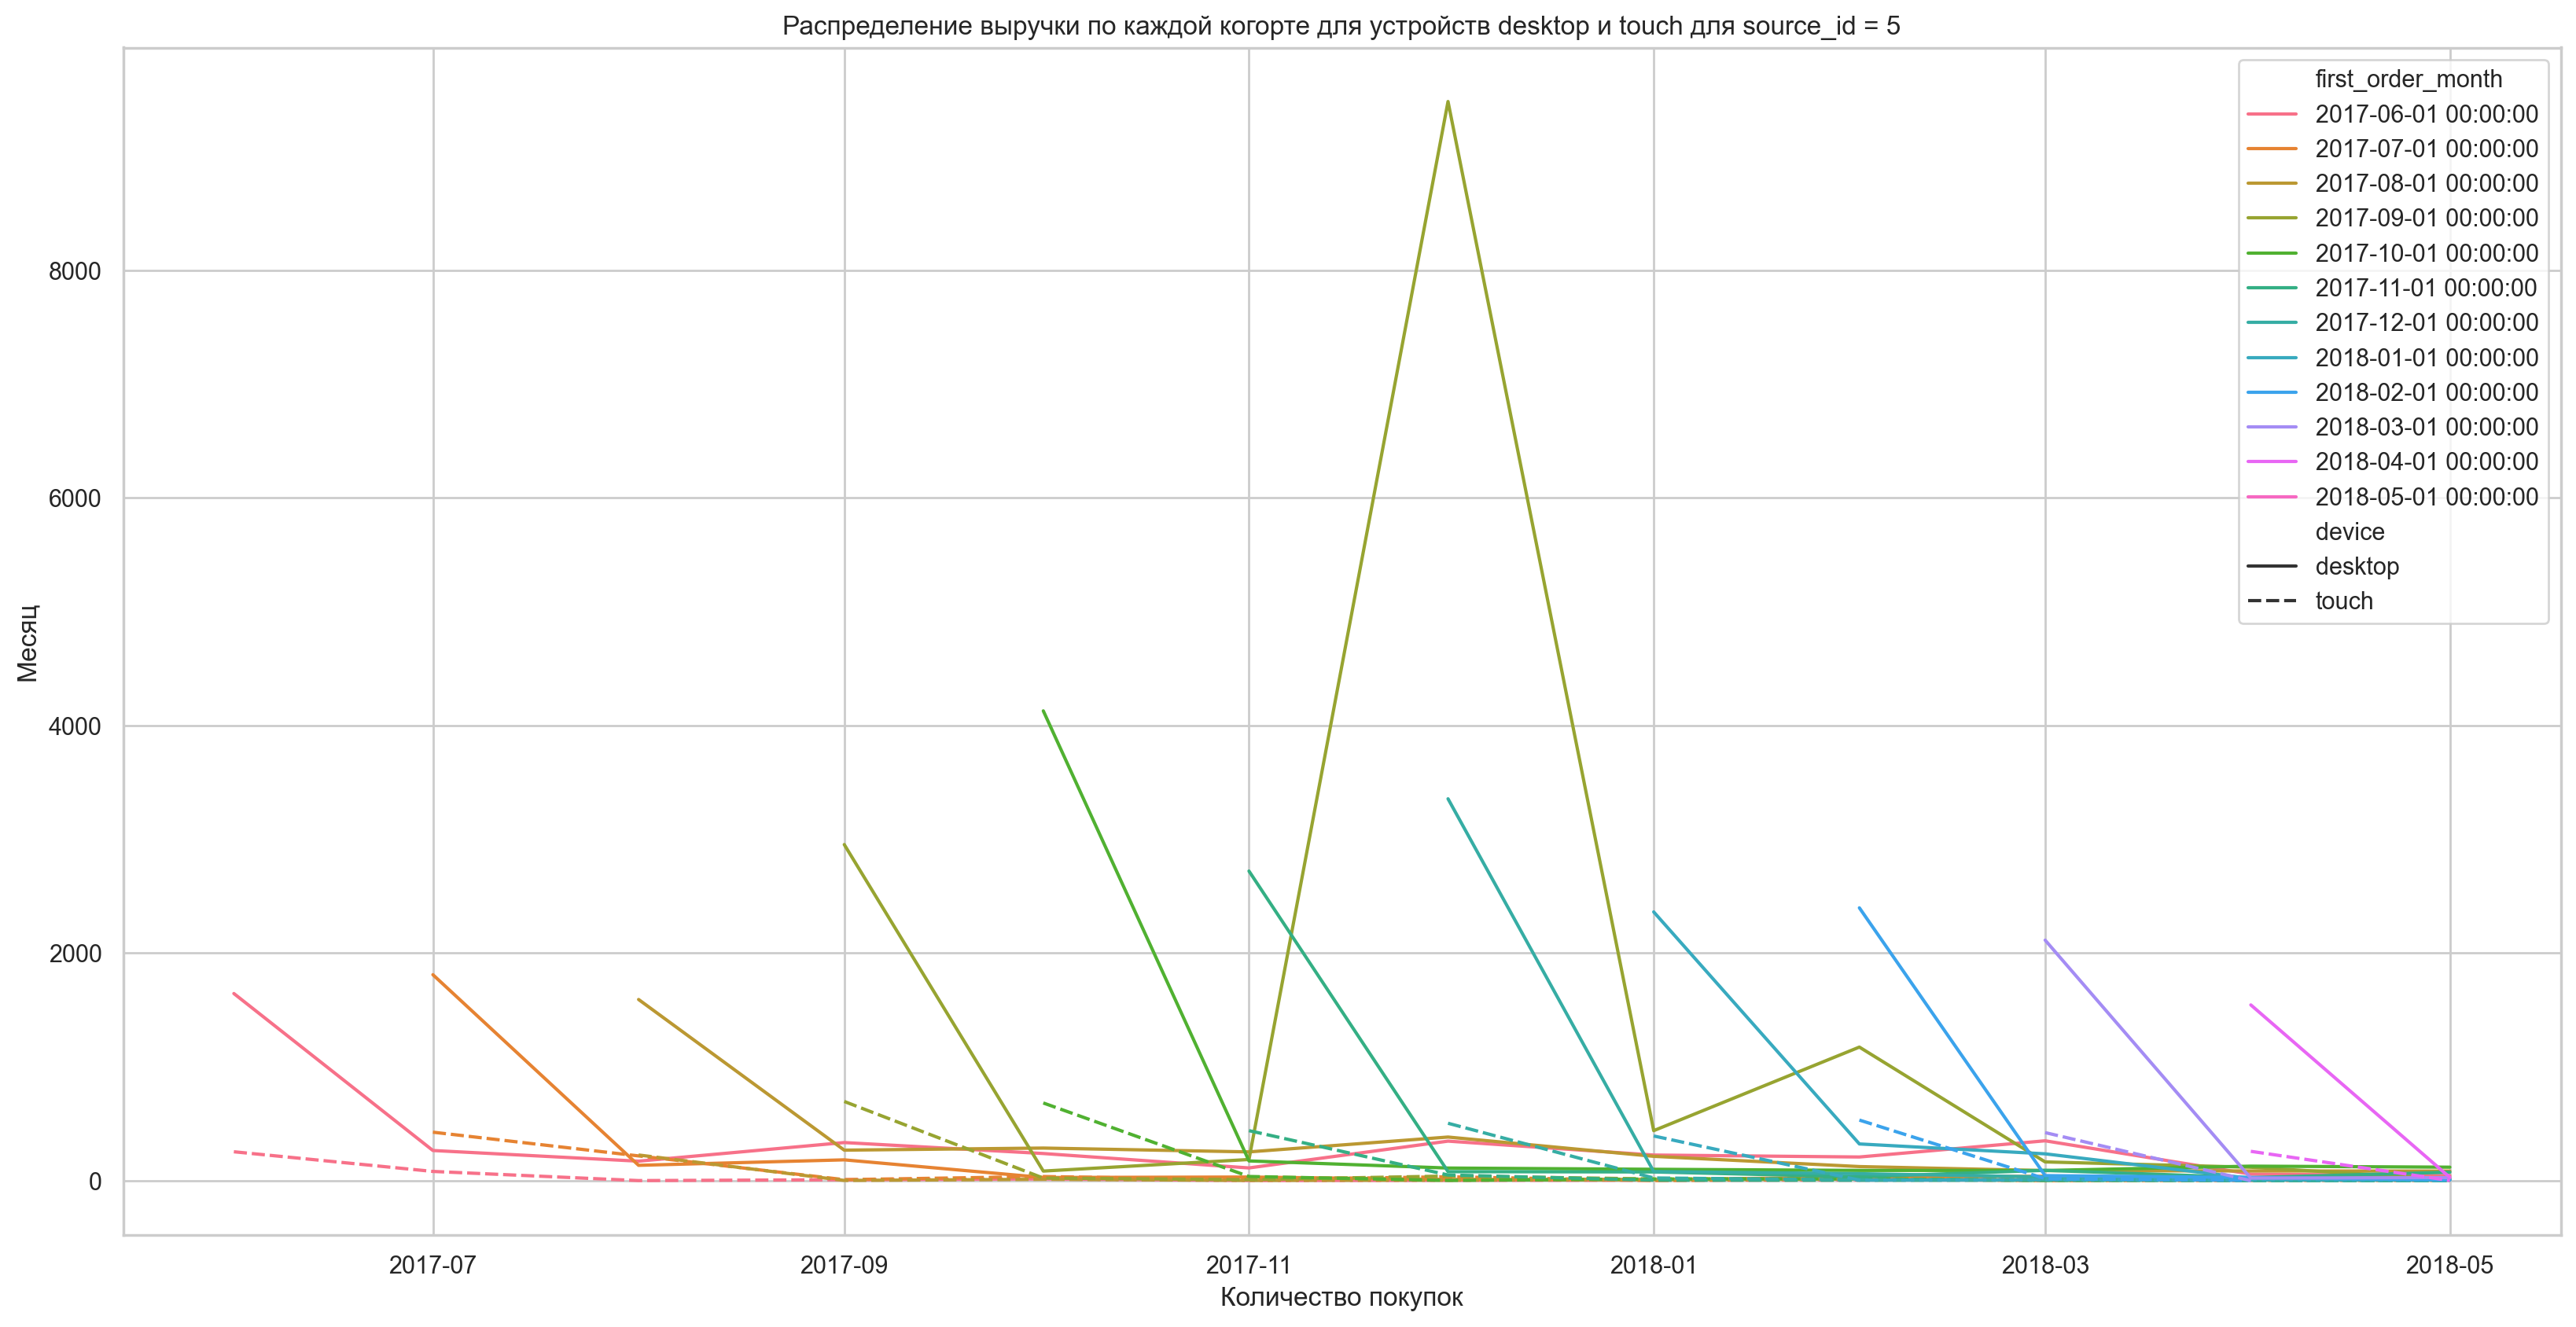

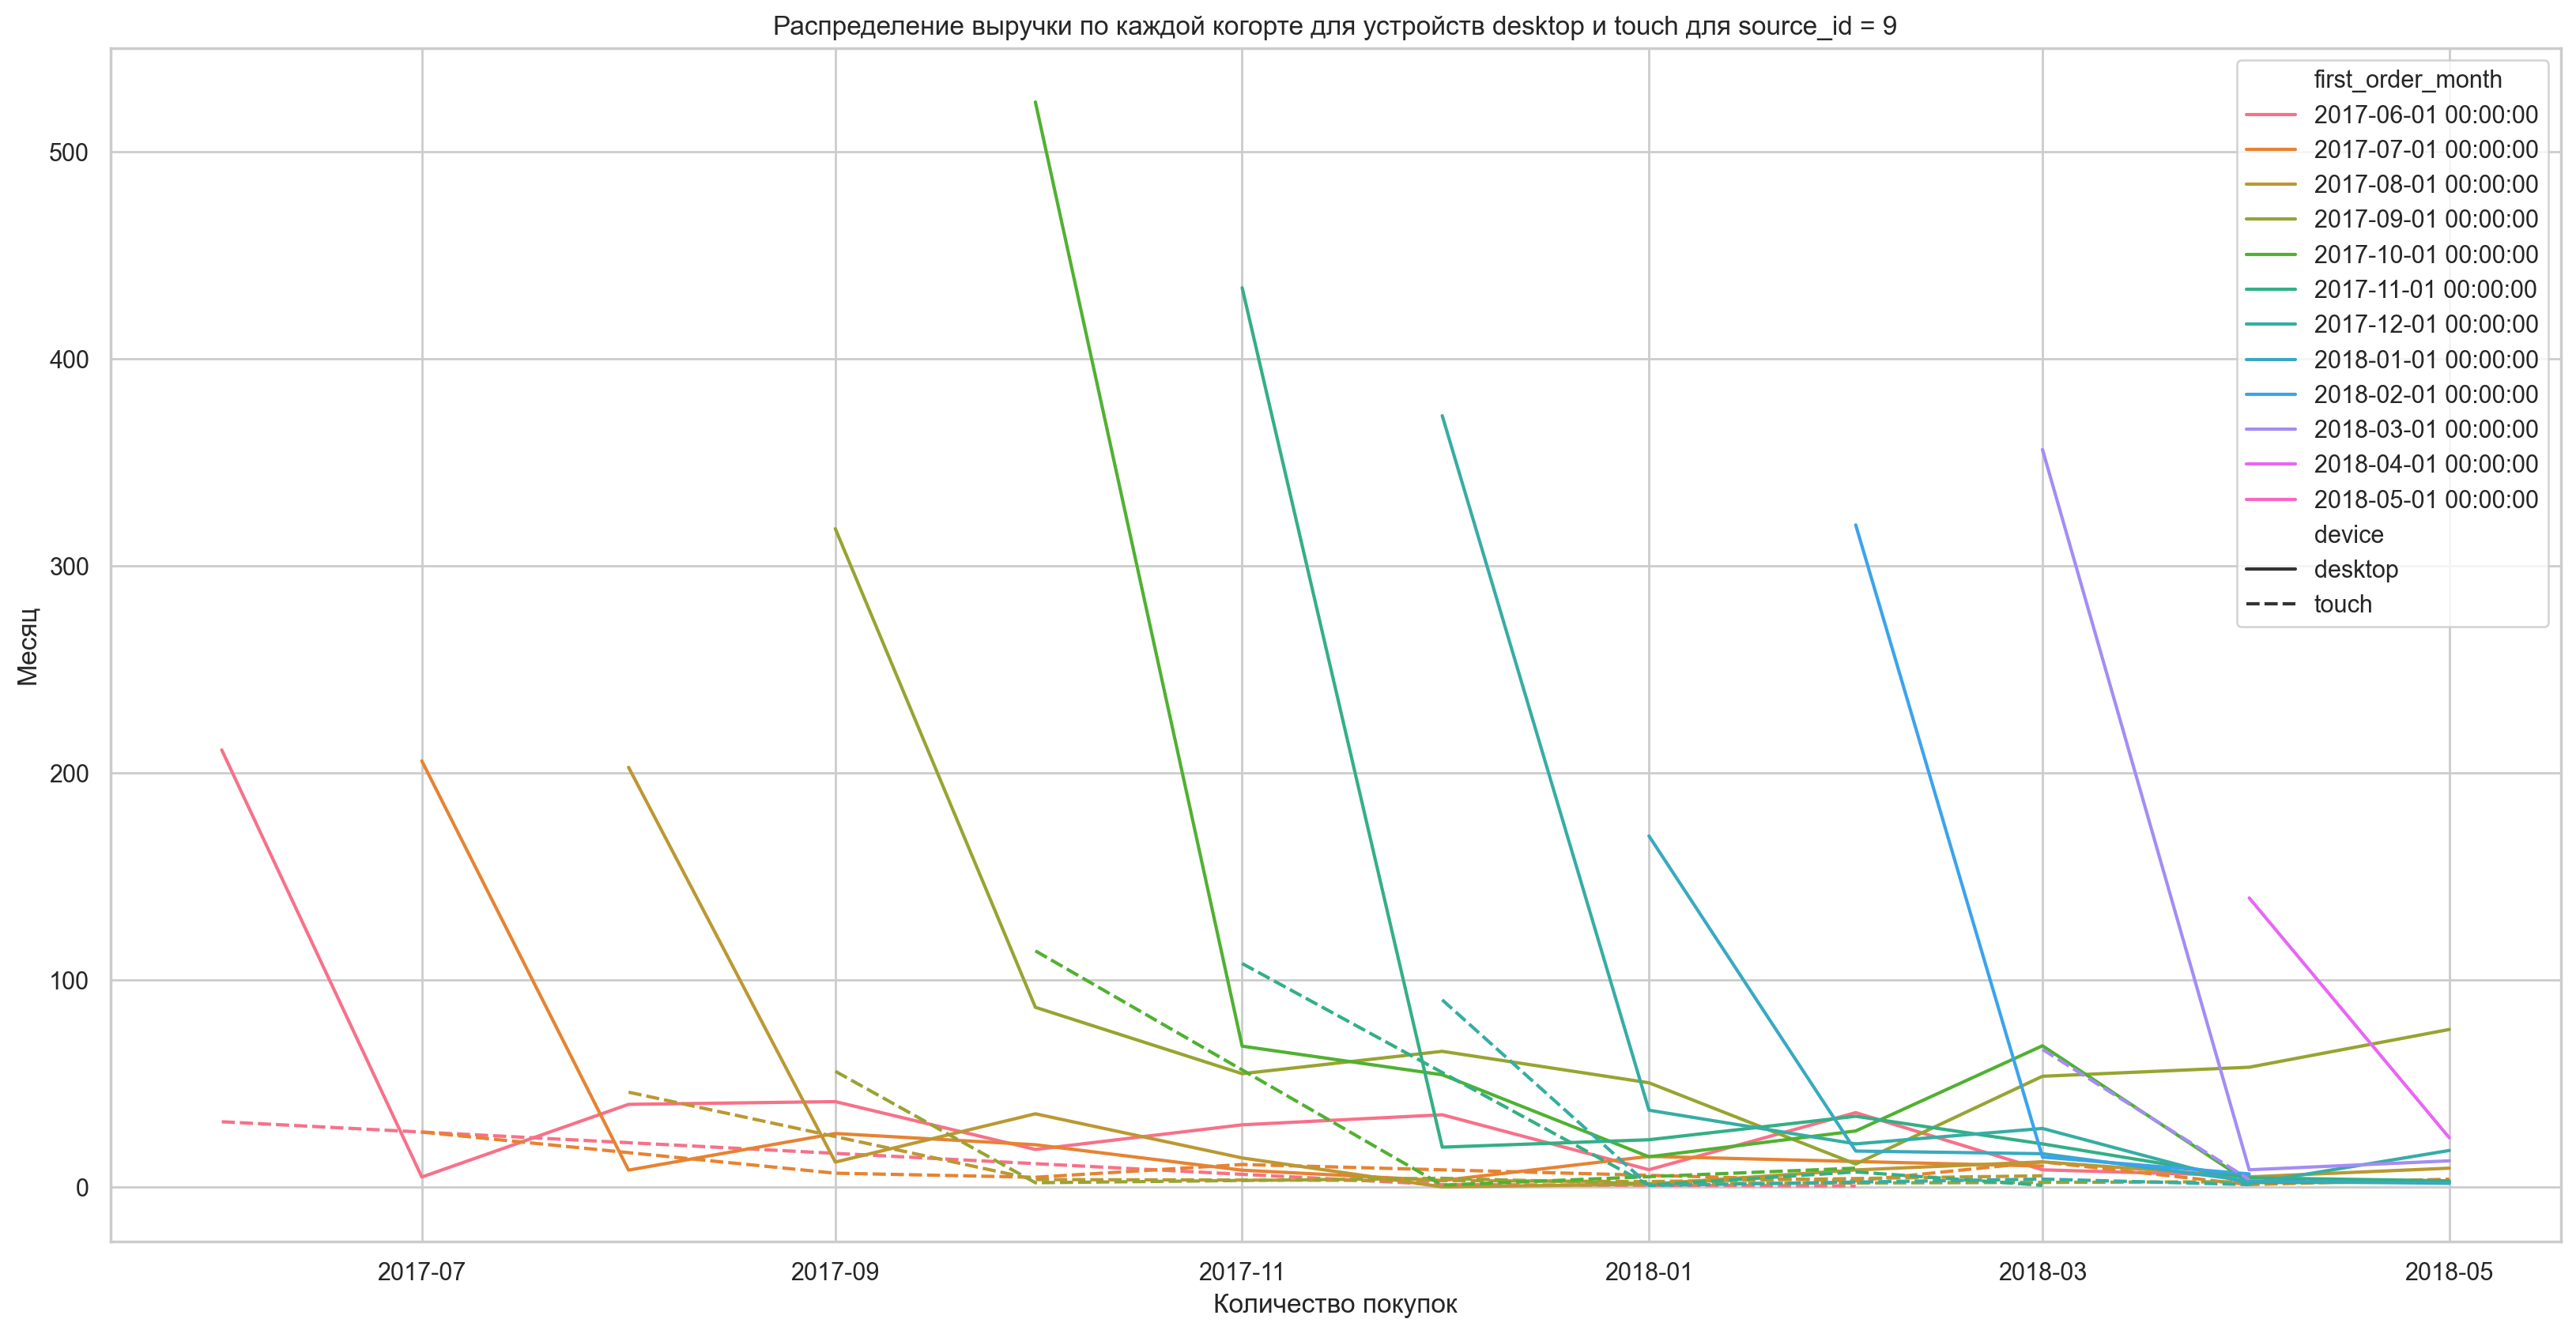

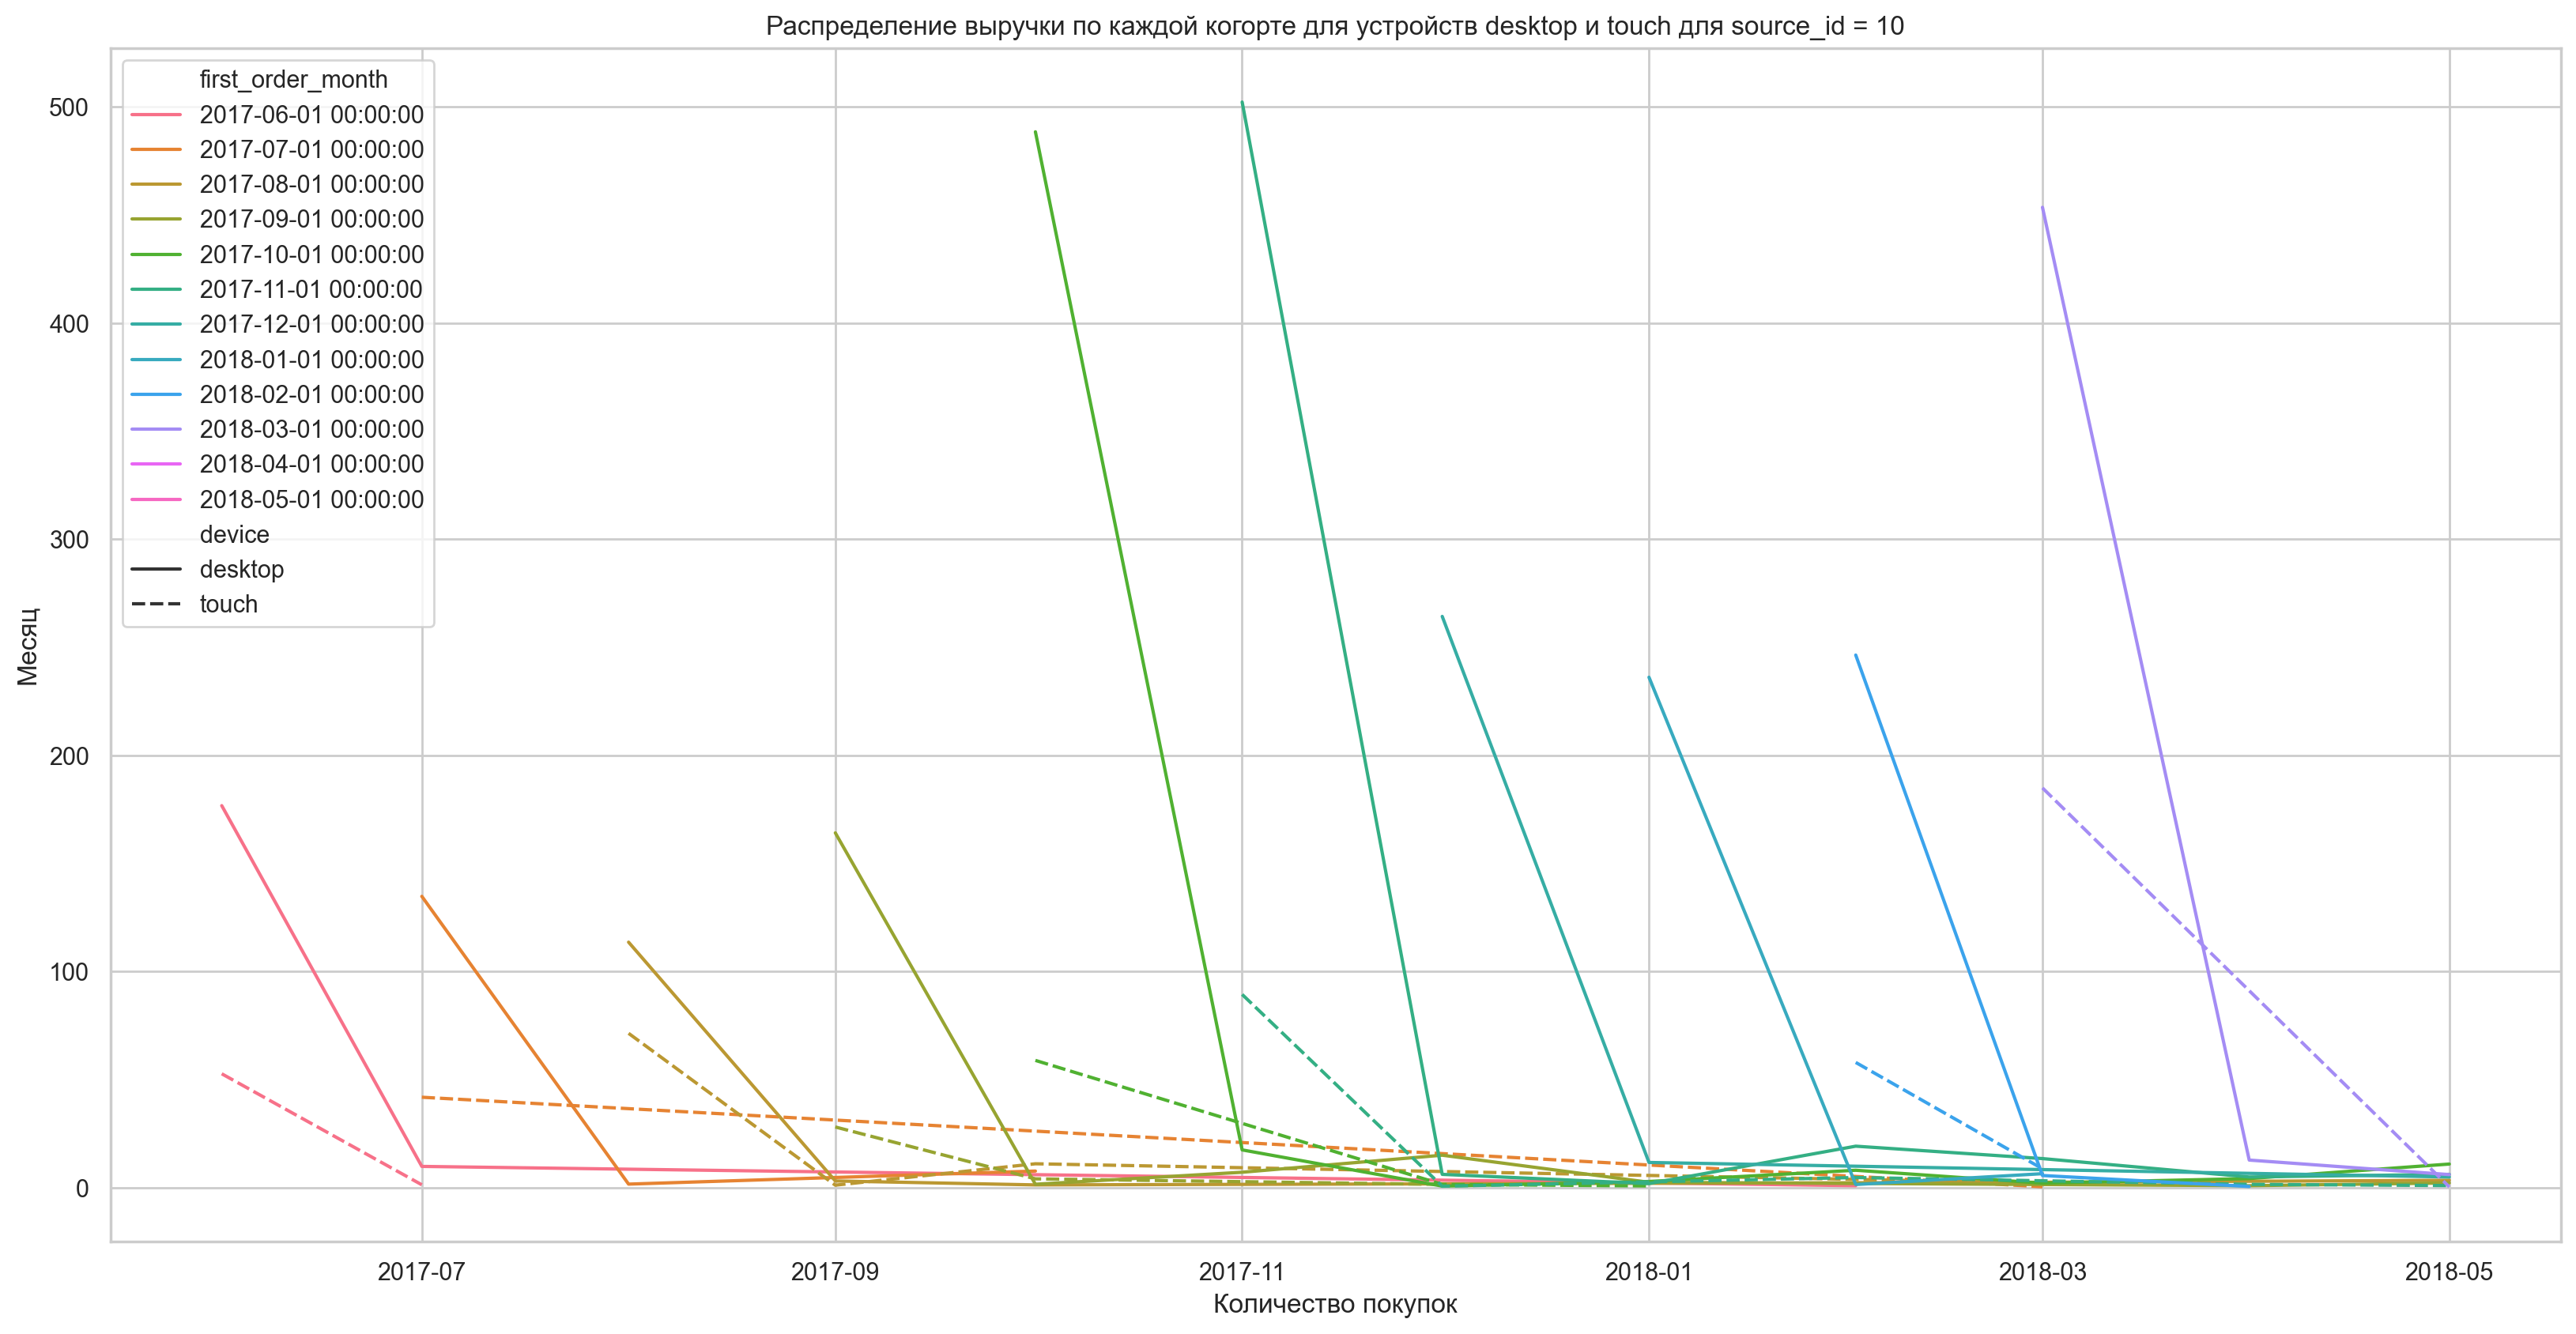

In [57]:
# Пройдем циклом по ресурсам и построим график
for source in sources:
    sns.set_style("whitegrid")
    plt.figure(figsize=(20, 10), dpi=200)
    g = sns.lineplot(x="order_month", y="revenue",
                 hue="first_order_month", style="device",
                 data=result.loc[result['source_id'] == source])
    title_name = 'Распределение выручки по каждой когорте для устройств desktop и touch для source_id = ' + str(source)
    g.set(title=title_name)
    g.set(xlabel='Количество покупок', ylabel='Месяц');

first_order_month  source_id   device        cac
0        2017-06-01          1  desktop   6.905583
1        2017-06-01          1    touch  41.689259
2        2017-06-01          2  desktop  12.708796
3        2017-06-01          2    touch  55.167727
4        2017-06-01          3  desktop  13.708599

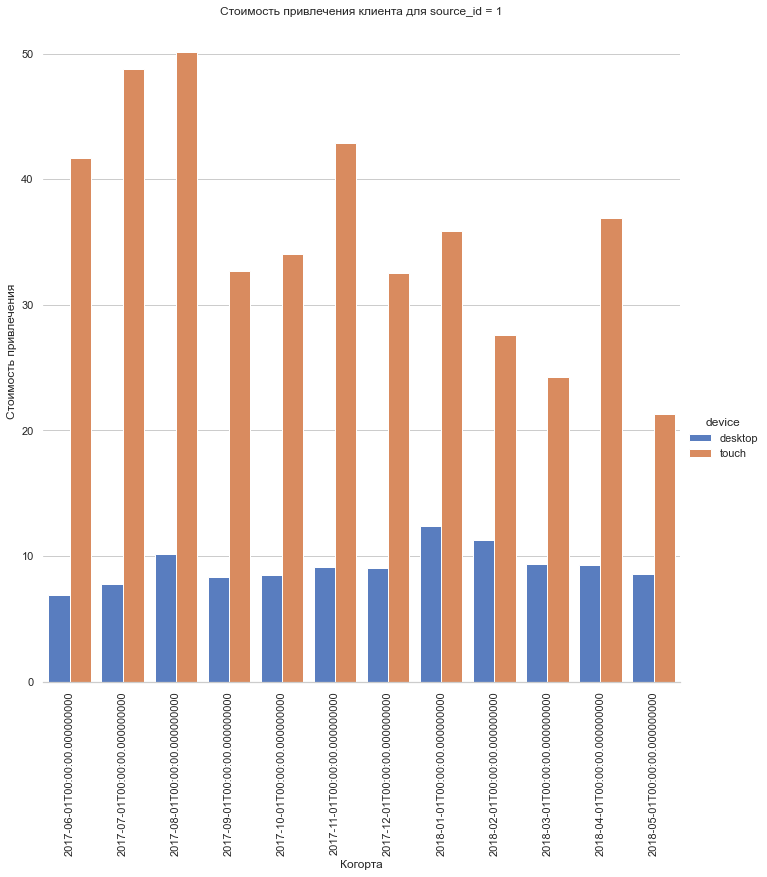

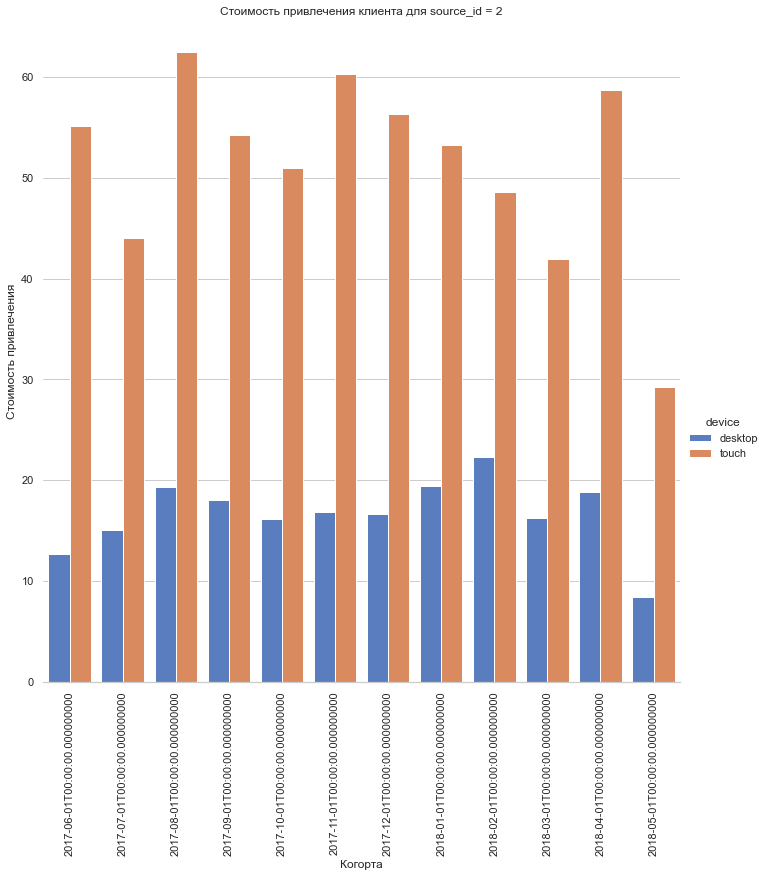

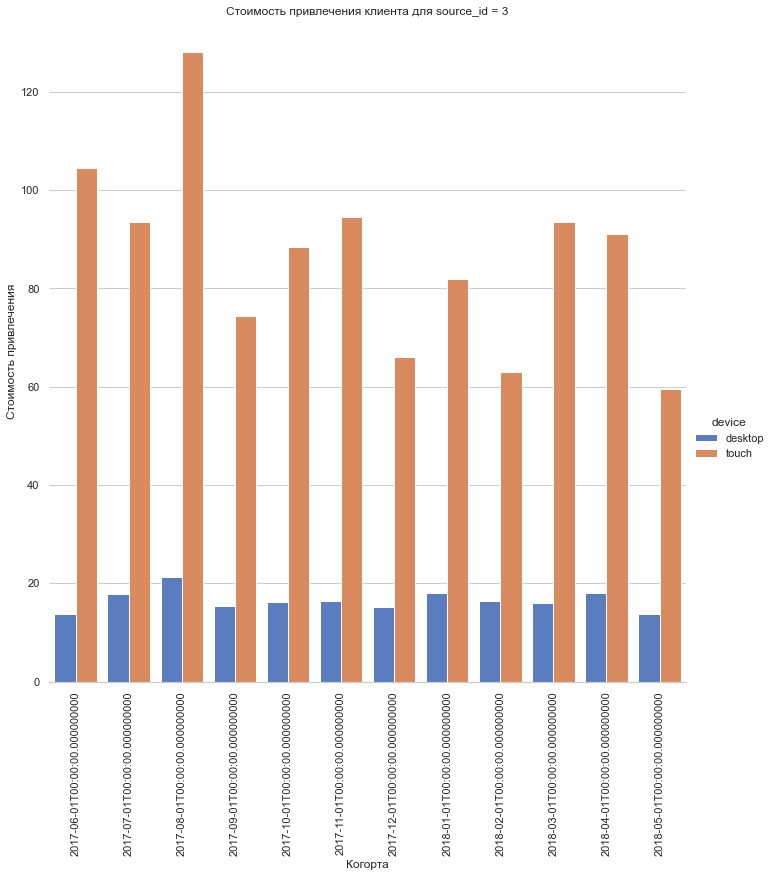

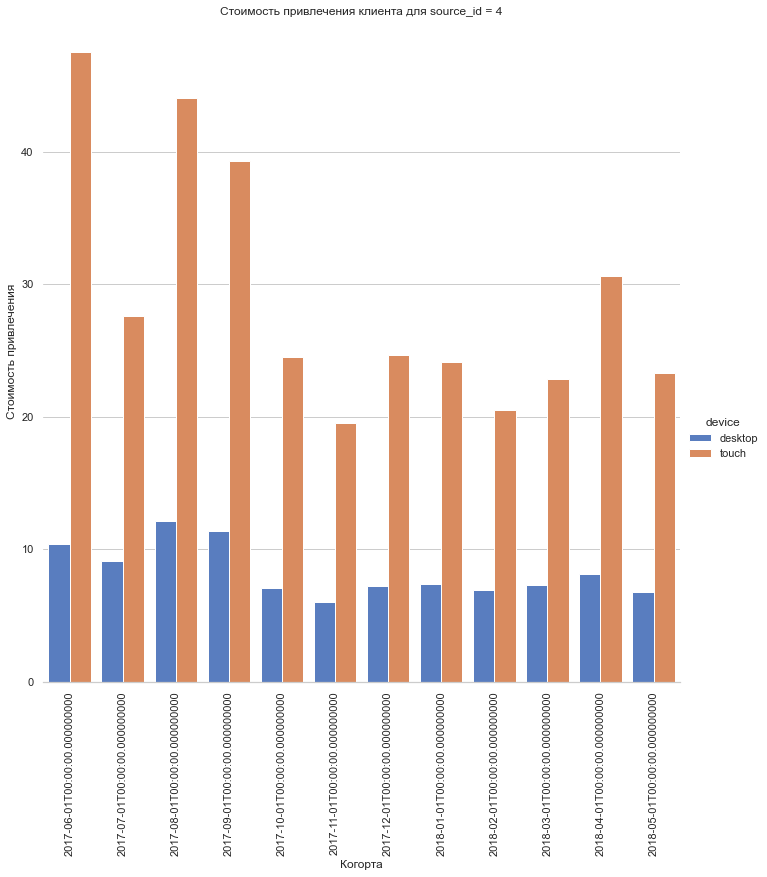

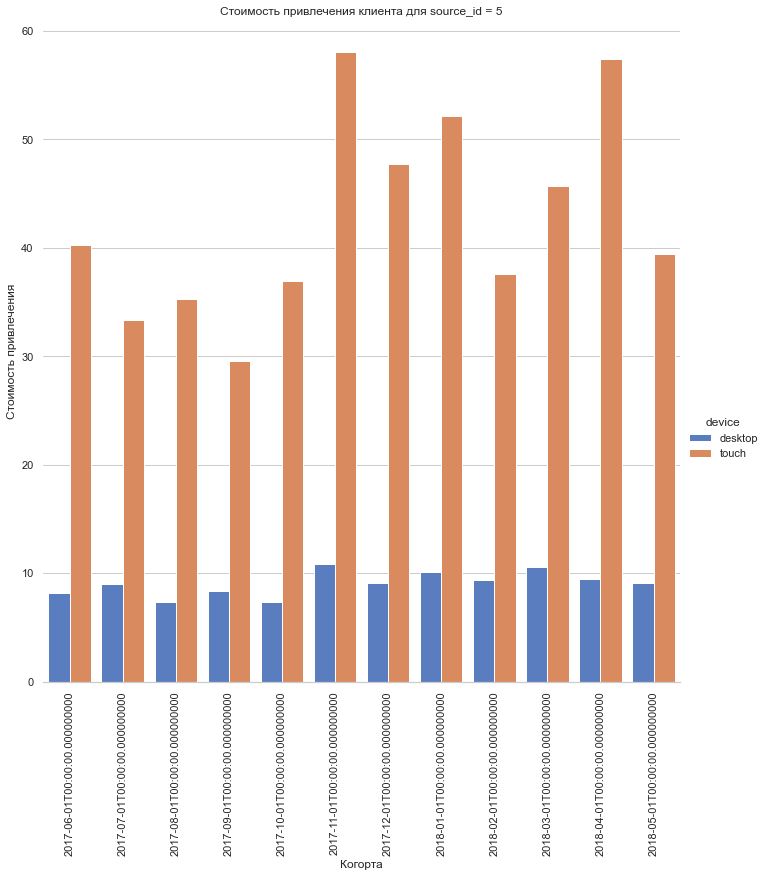

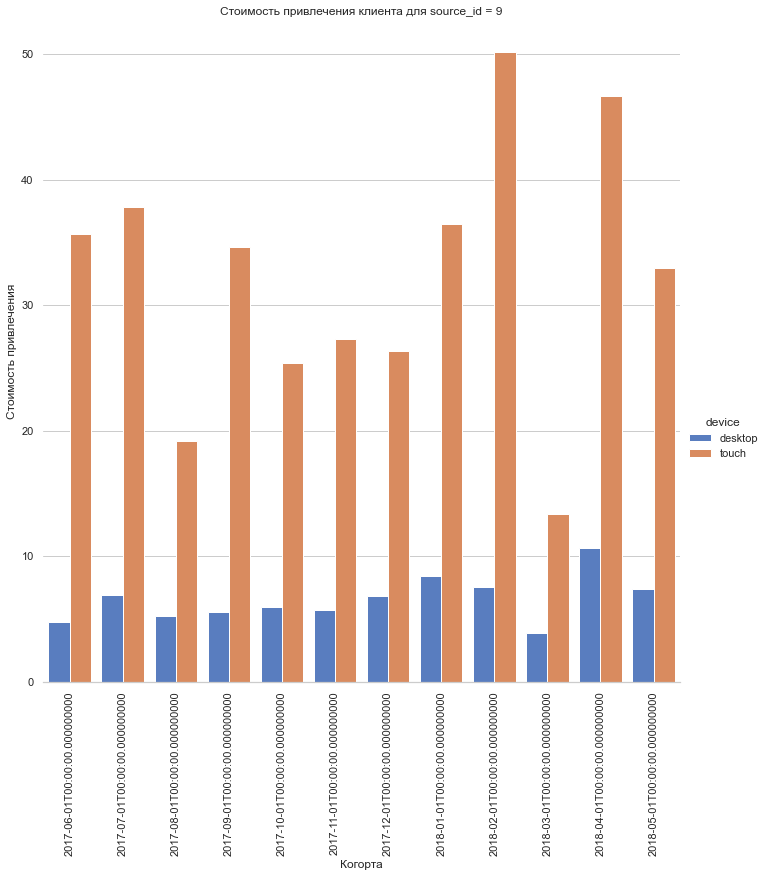

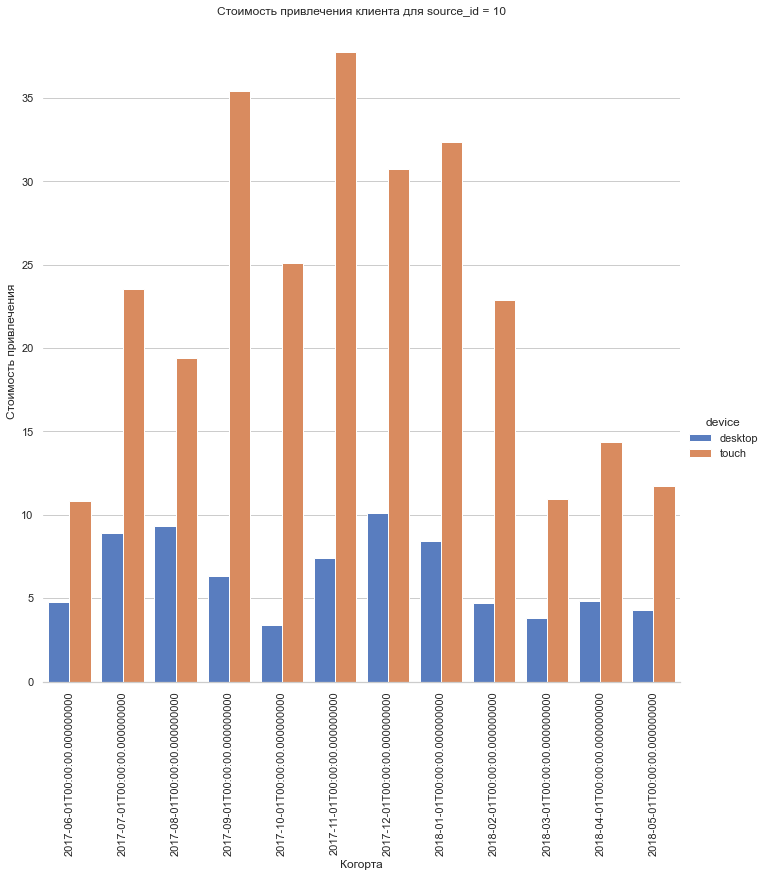

In [66]:
# Посчитаем средний CAC
result_cac = result.groupby(['first_order_month', 'source_id','device']).agg({'cac':'mean'}).reset_index()
sns.set_style("whitegrid")
display(result_cac.head())
# Пройдем циклом по ресурсам и построим график
for source in sources:
    g = sns.catplot(x="first_order_month", y="cac", hue="device", 
                    data=result_cac.loc[result_cac['source_id']==source], height=10, kind="bar", palette="muted")
    g.set_xticklabels(rotation=90)
    g.despine(left=True)
    title_name = 'Стоимость привлечения клиента для source_id = ' + str(source)
    g.set(title=title_name)
    g.set(xlabel='Когорта', ylabel='Стоимость привлечения');

#### Вывод
Видим, что CAC неравномерно распределена как по когортам, так и по устройствам. Стоимость привлечения клиента на устройстве touch сильно выше, чем на устройстве desktop. Такую тенденцию мы замечаем на всех источниках привлечения клиентов. Цена привлечения отличается в 2 и более раз

### Построим графики LTV для устройств по источникам

first_order_month n_buyers order_month  revenue age       ltv   device  \
0        2017-06-01      163  2017-06-01  1249.17   0  7.663620  desktop   
1        2017-06-01      163  2017-07-01   413.15   1  2.534663  desktop   
2        2017-06-01      163  2017-08-01   419.43   2  2.573190  desktop   
3        2017-06-01      163  2017-09-01   692.92   3  4.251043  desktop   
4        2017-06-01      163  2017-10-01   768.36   4  4.713865  desktop   

  costs_month source_id    costs       cac      romi    uid  
0  2017-06-01         1  1125.61  6.905583  1.109772  163.0  
1  2017-06-01         1  1125.61  6.905583  0.367045   15.0  
2  2017-06-01         1  1125.61  6.905583  0.372625   10.0  
3  2017-06-01         1  1125.61  6.905583  0.615595    8.0  
4  2017-06-01         1  1125.61  6.905583  0.682617   10.0

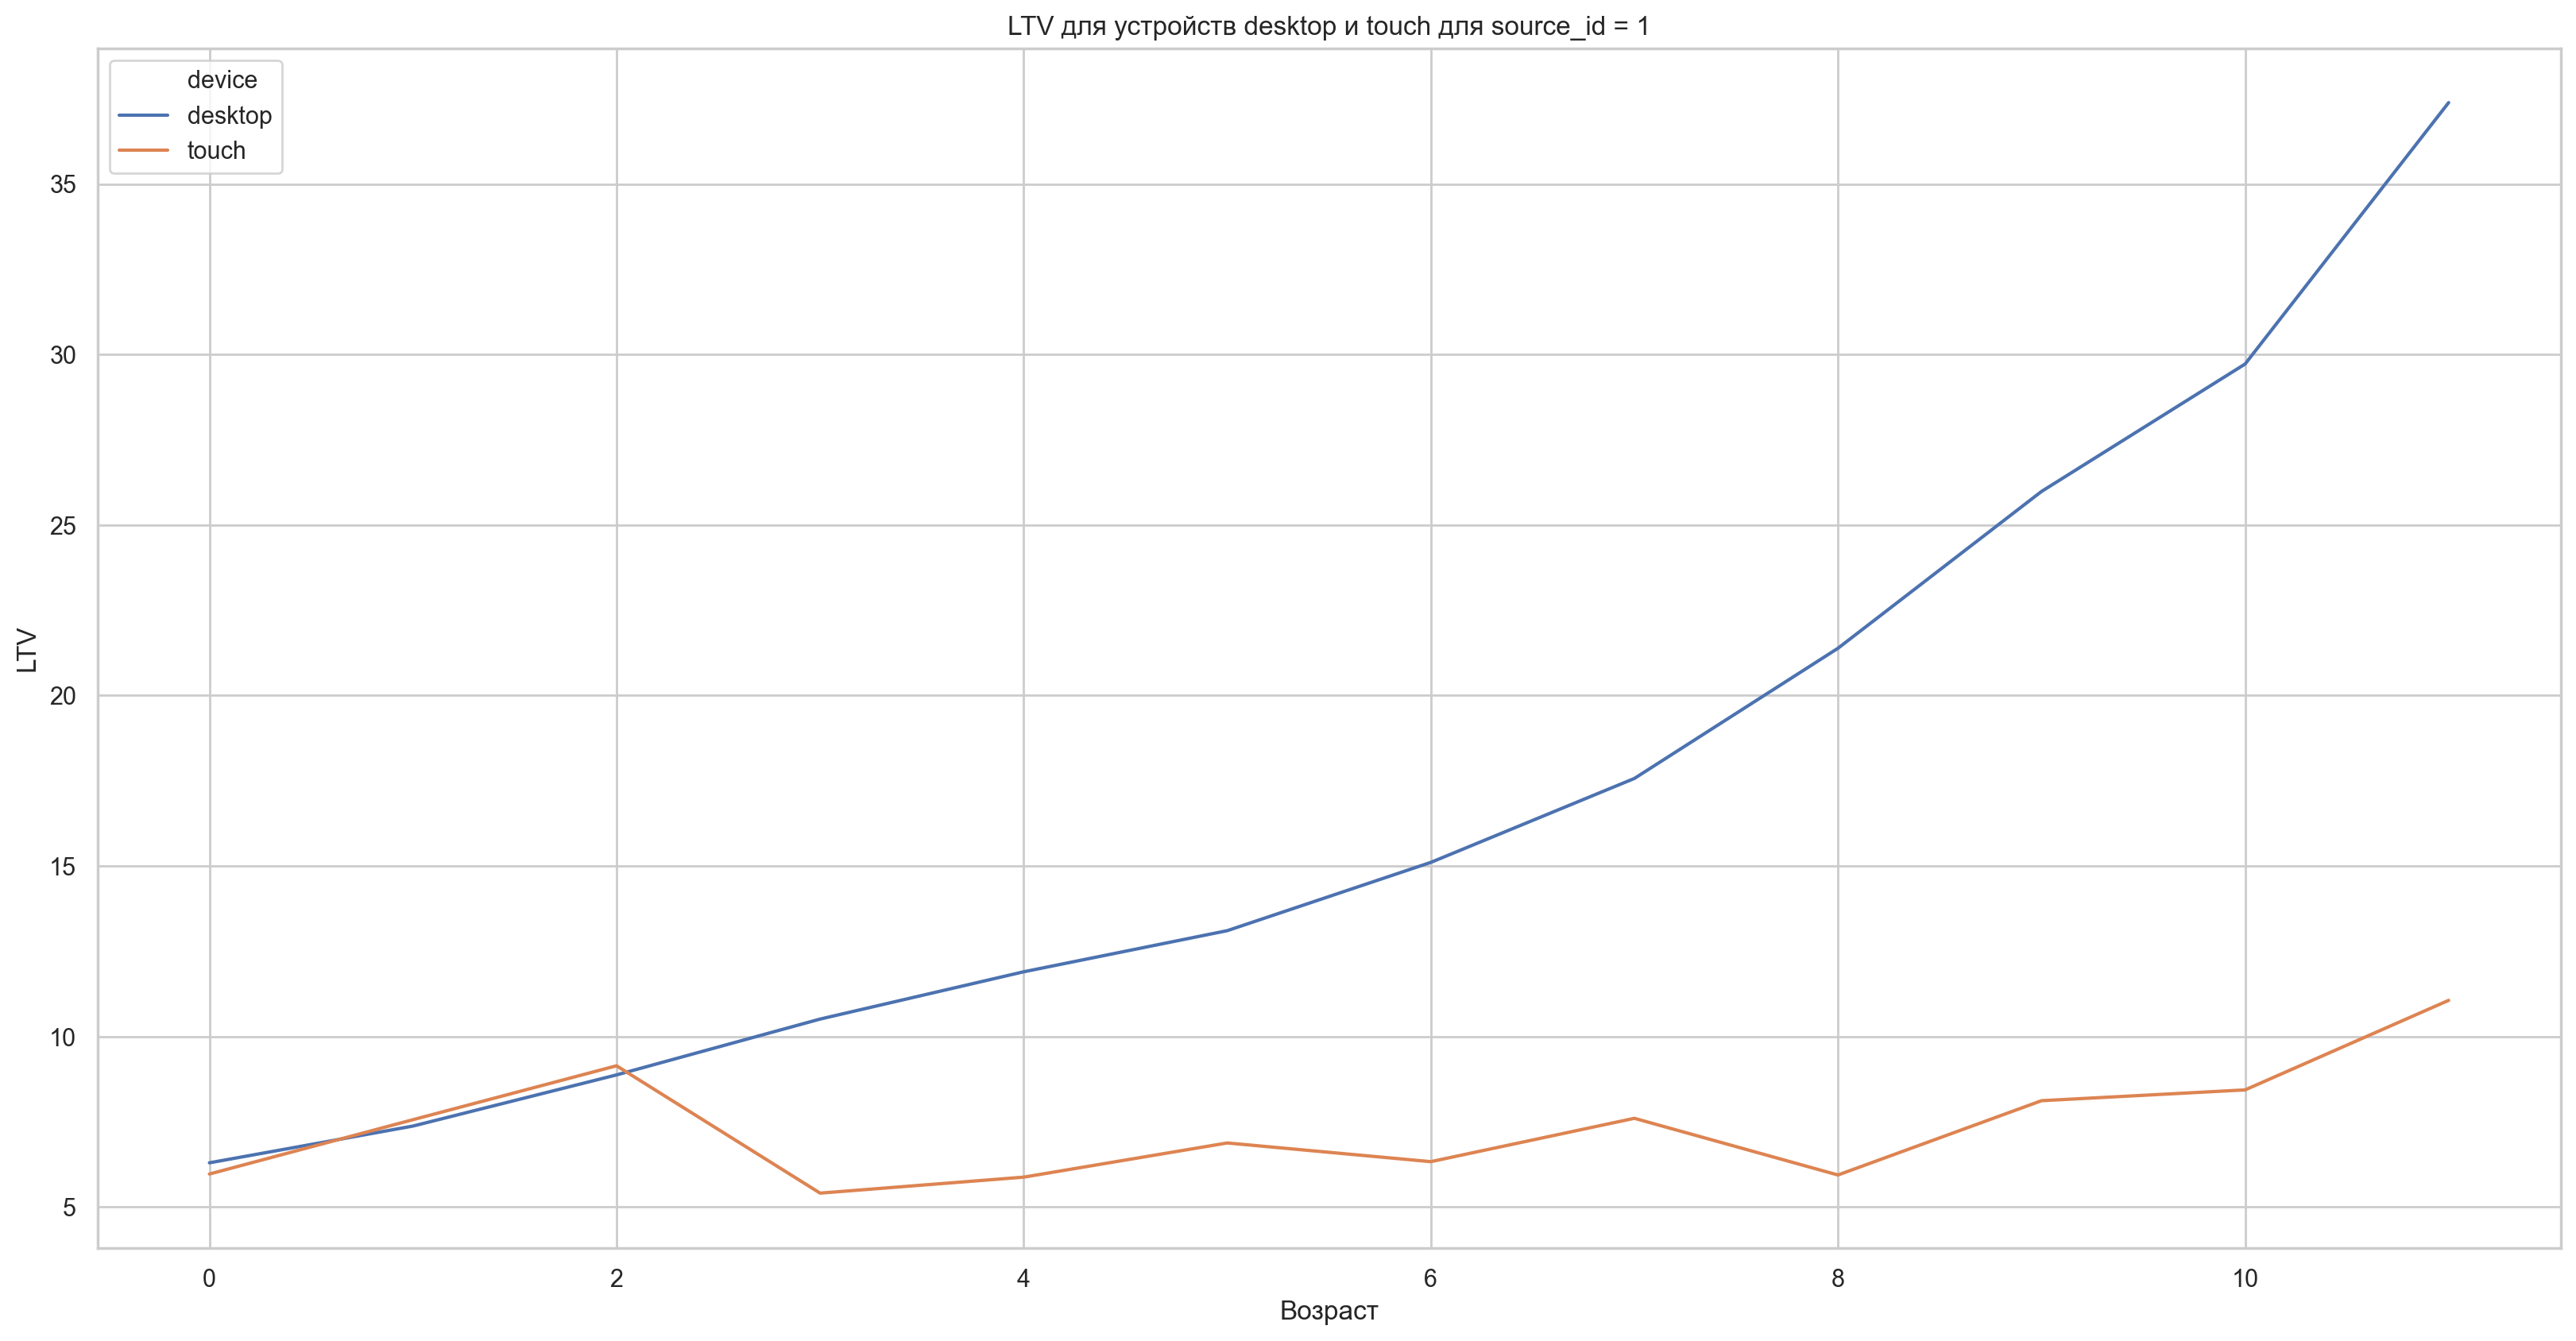

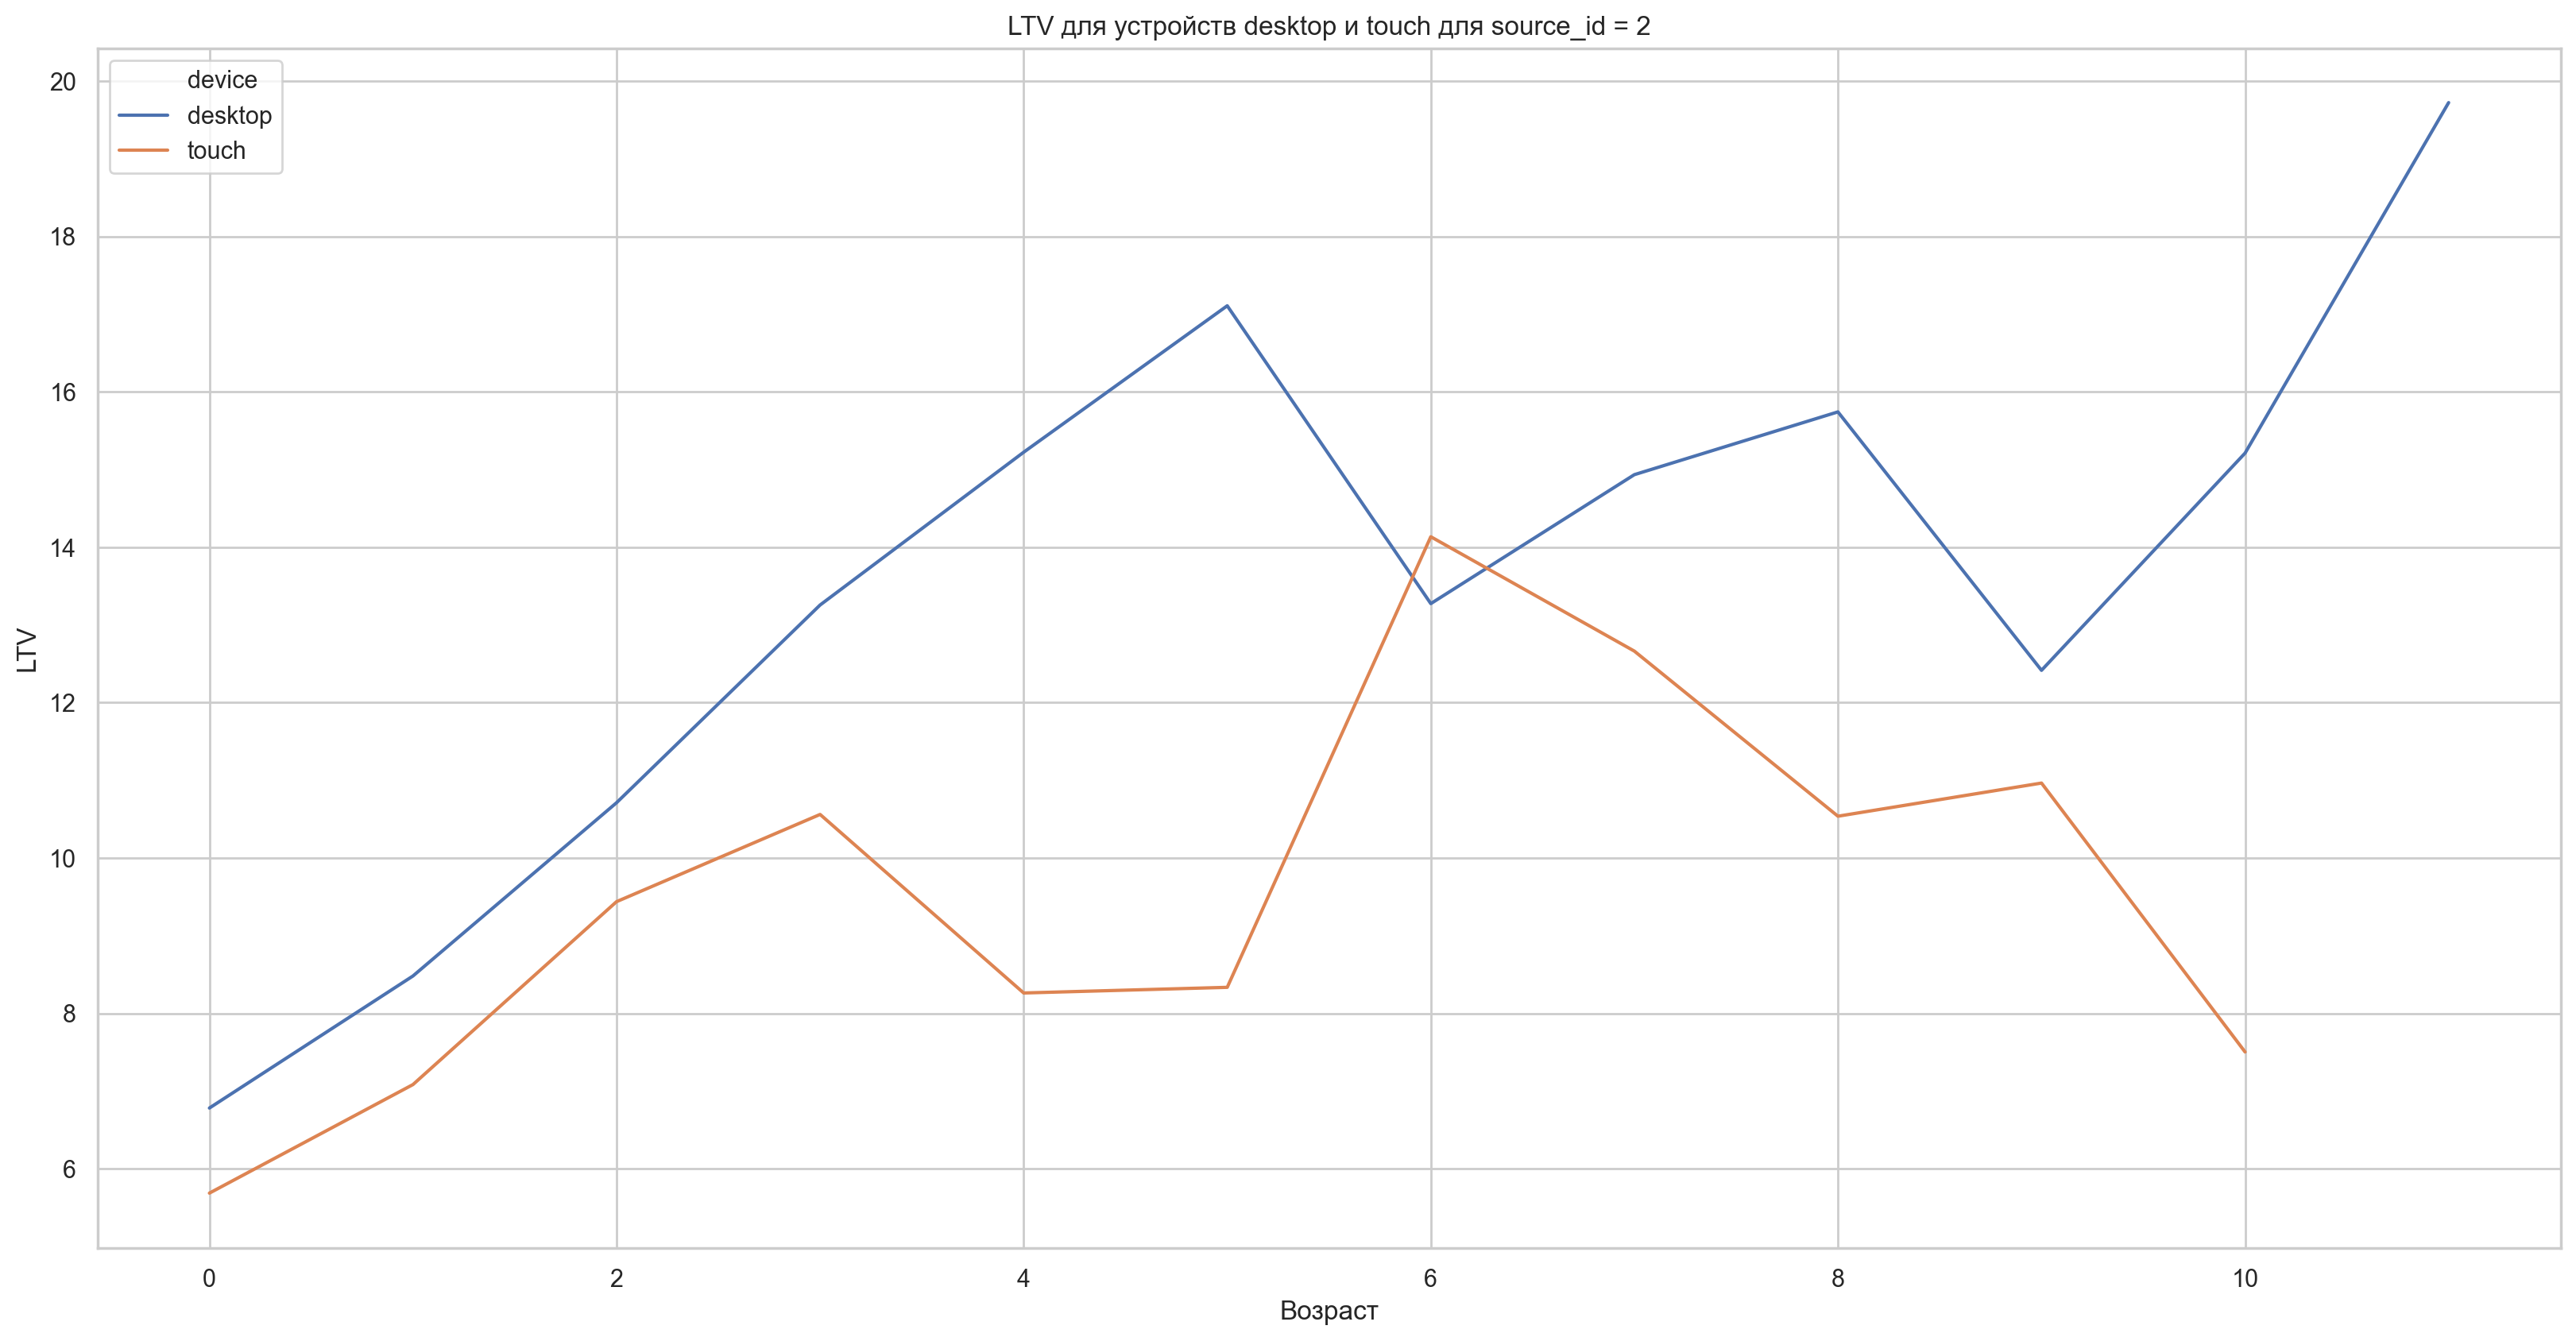

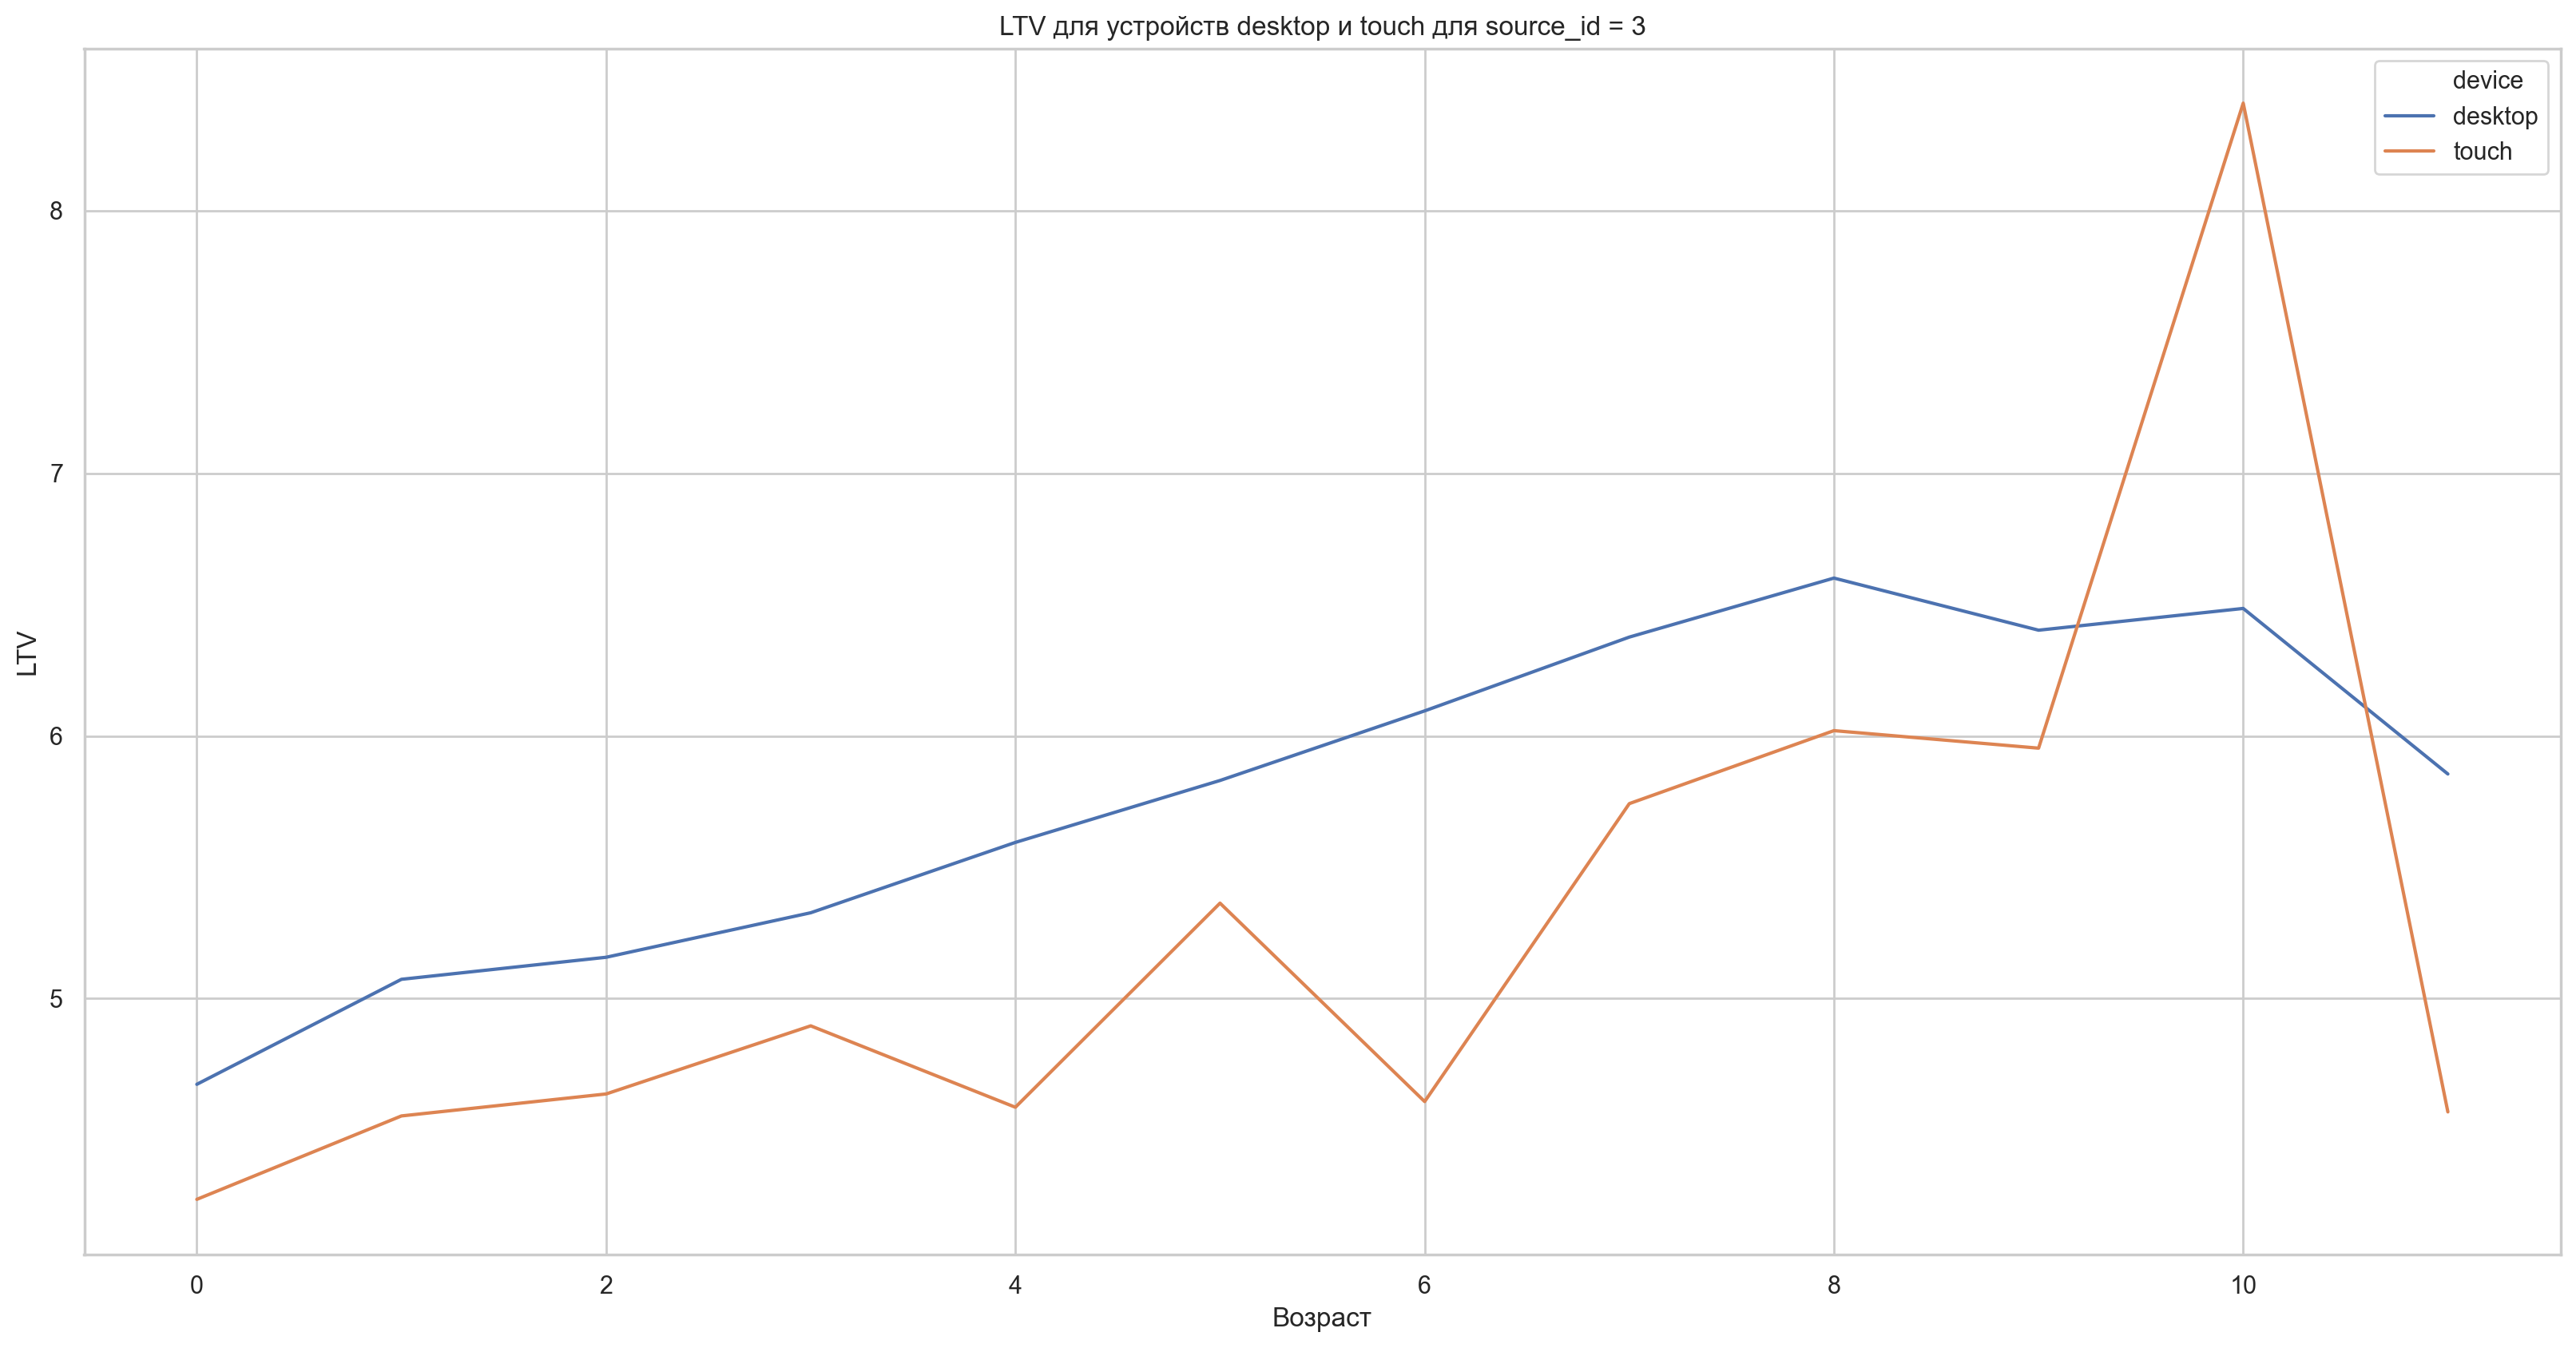

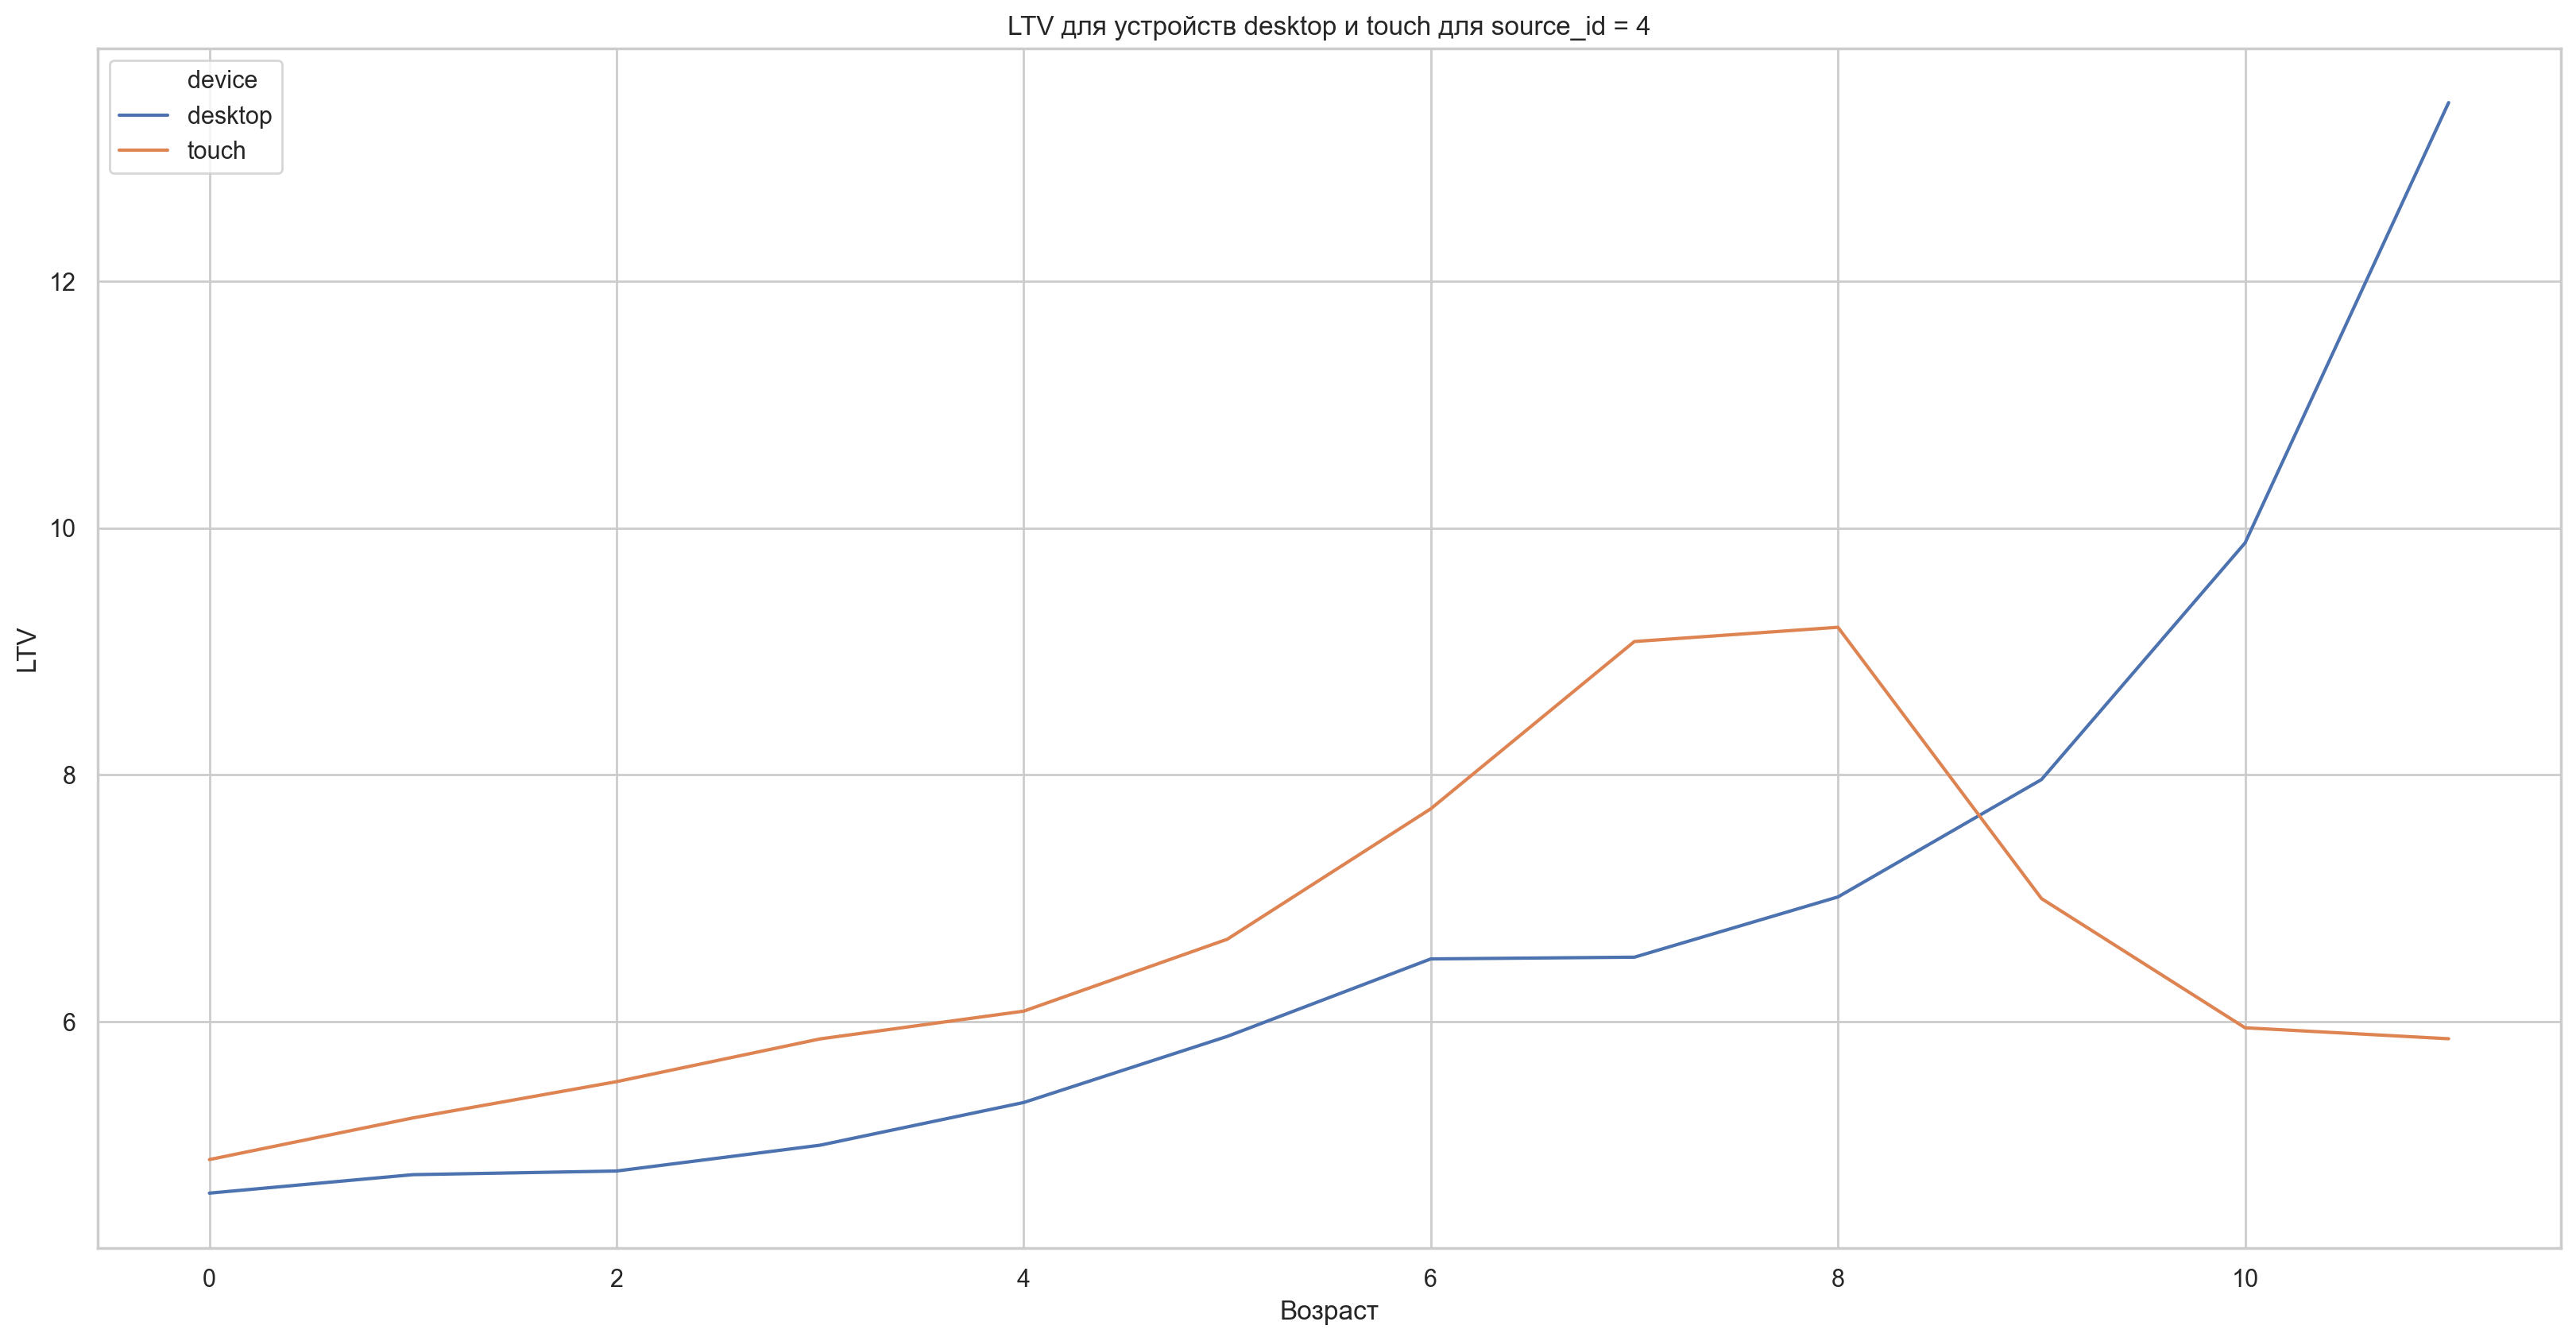

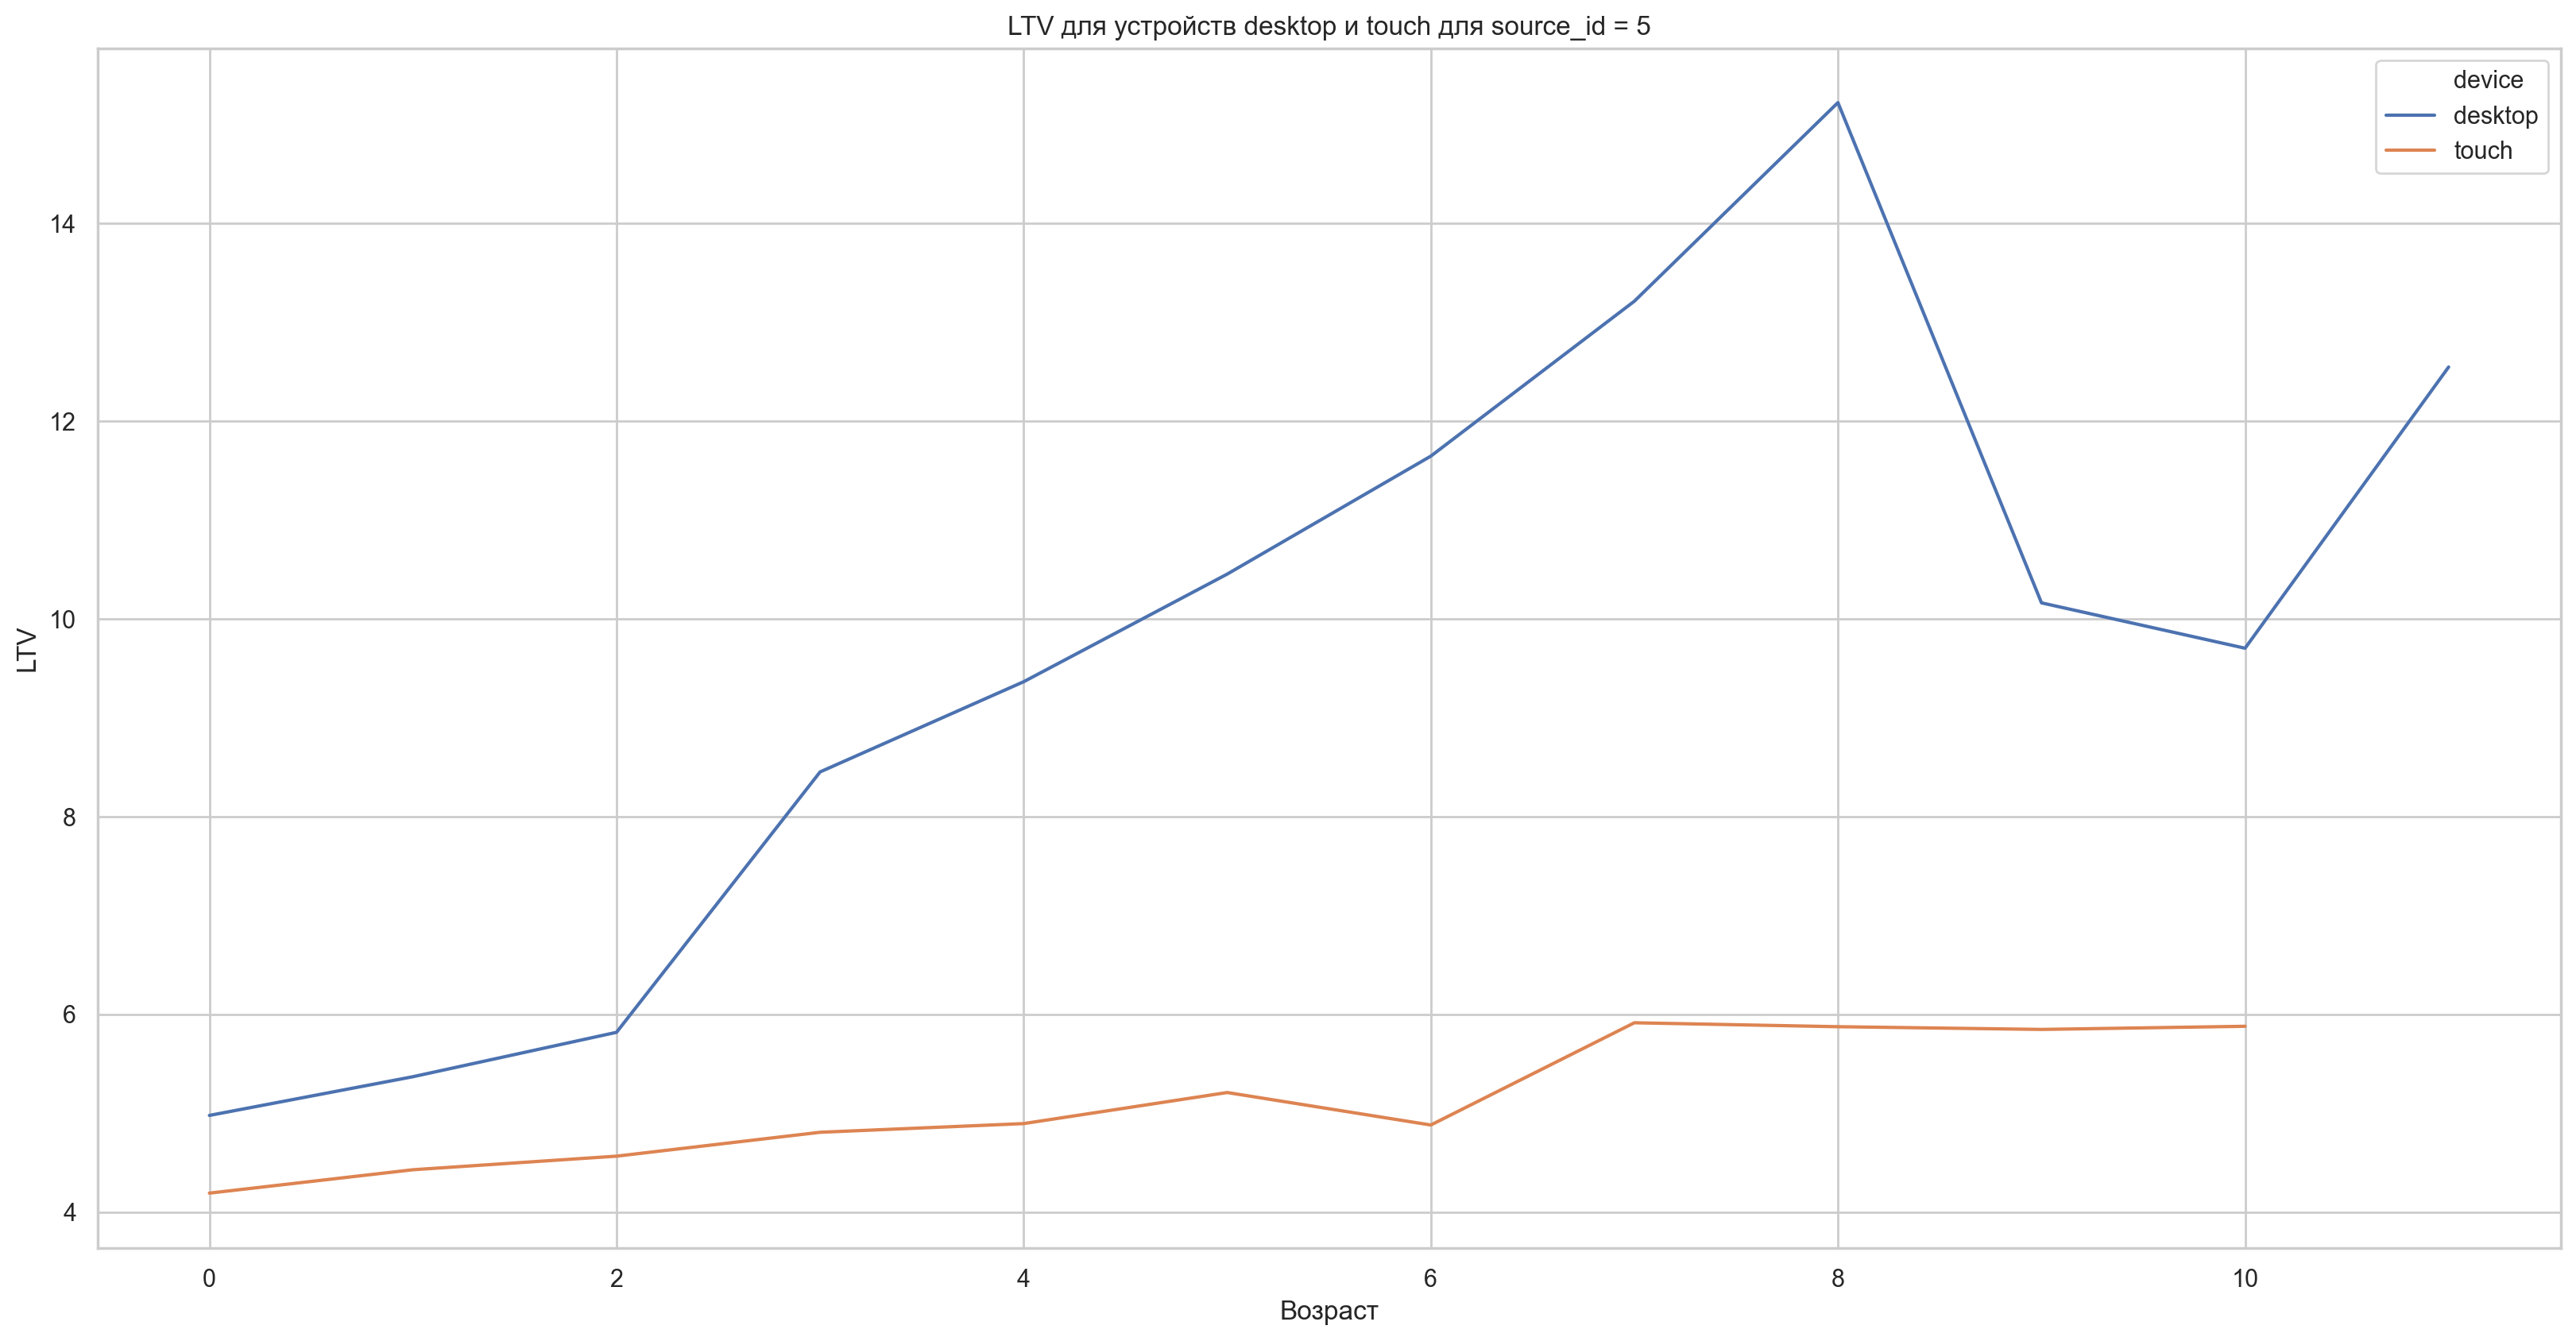

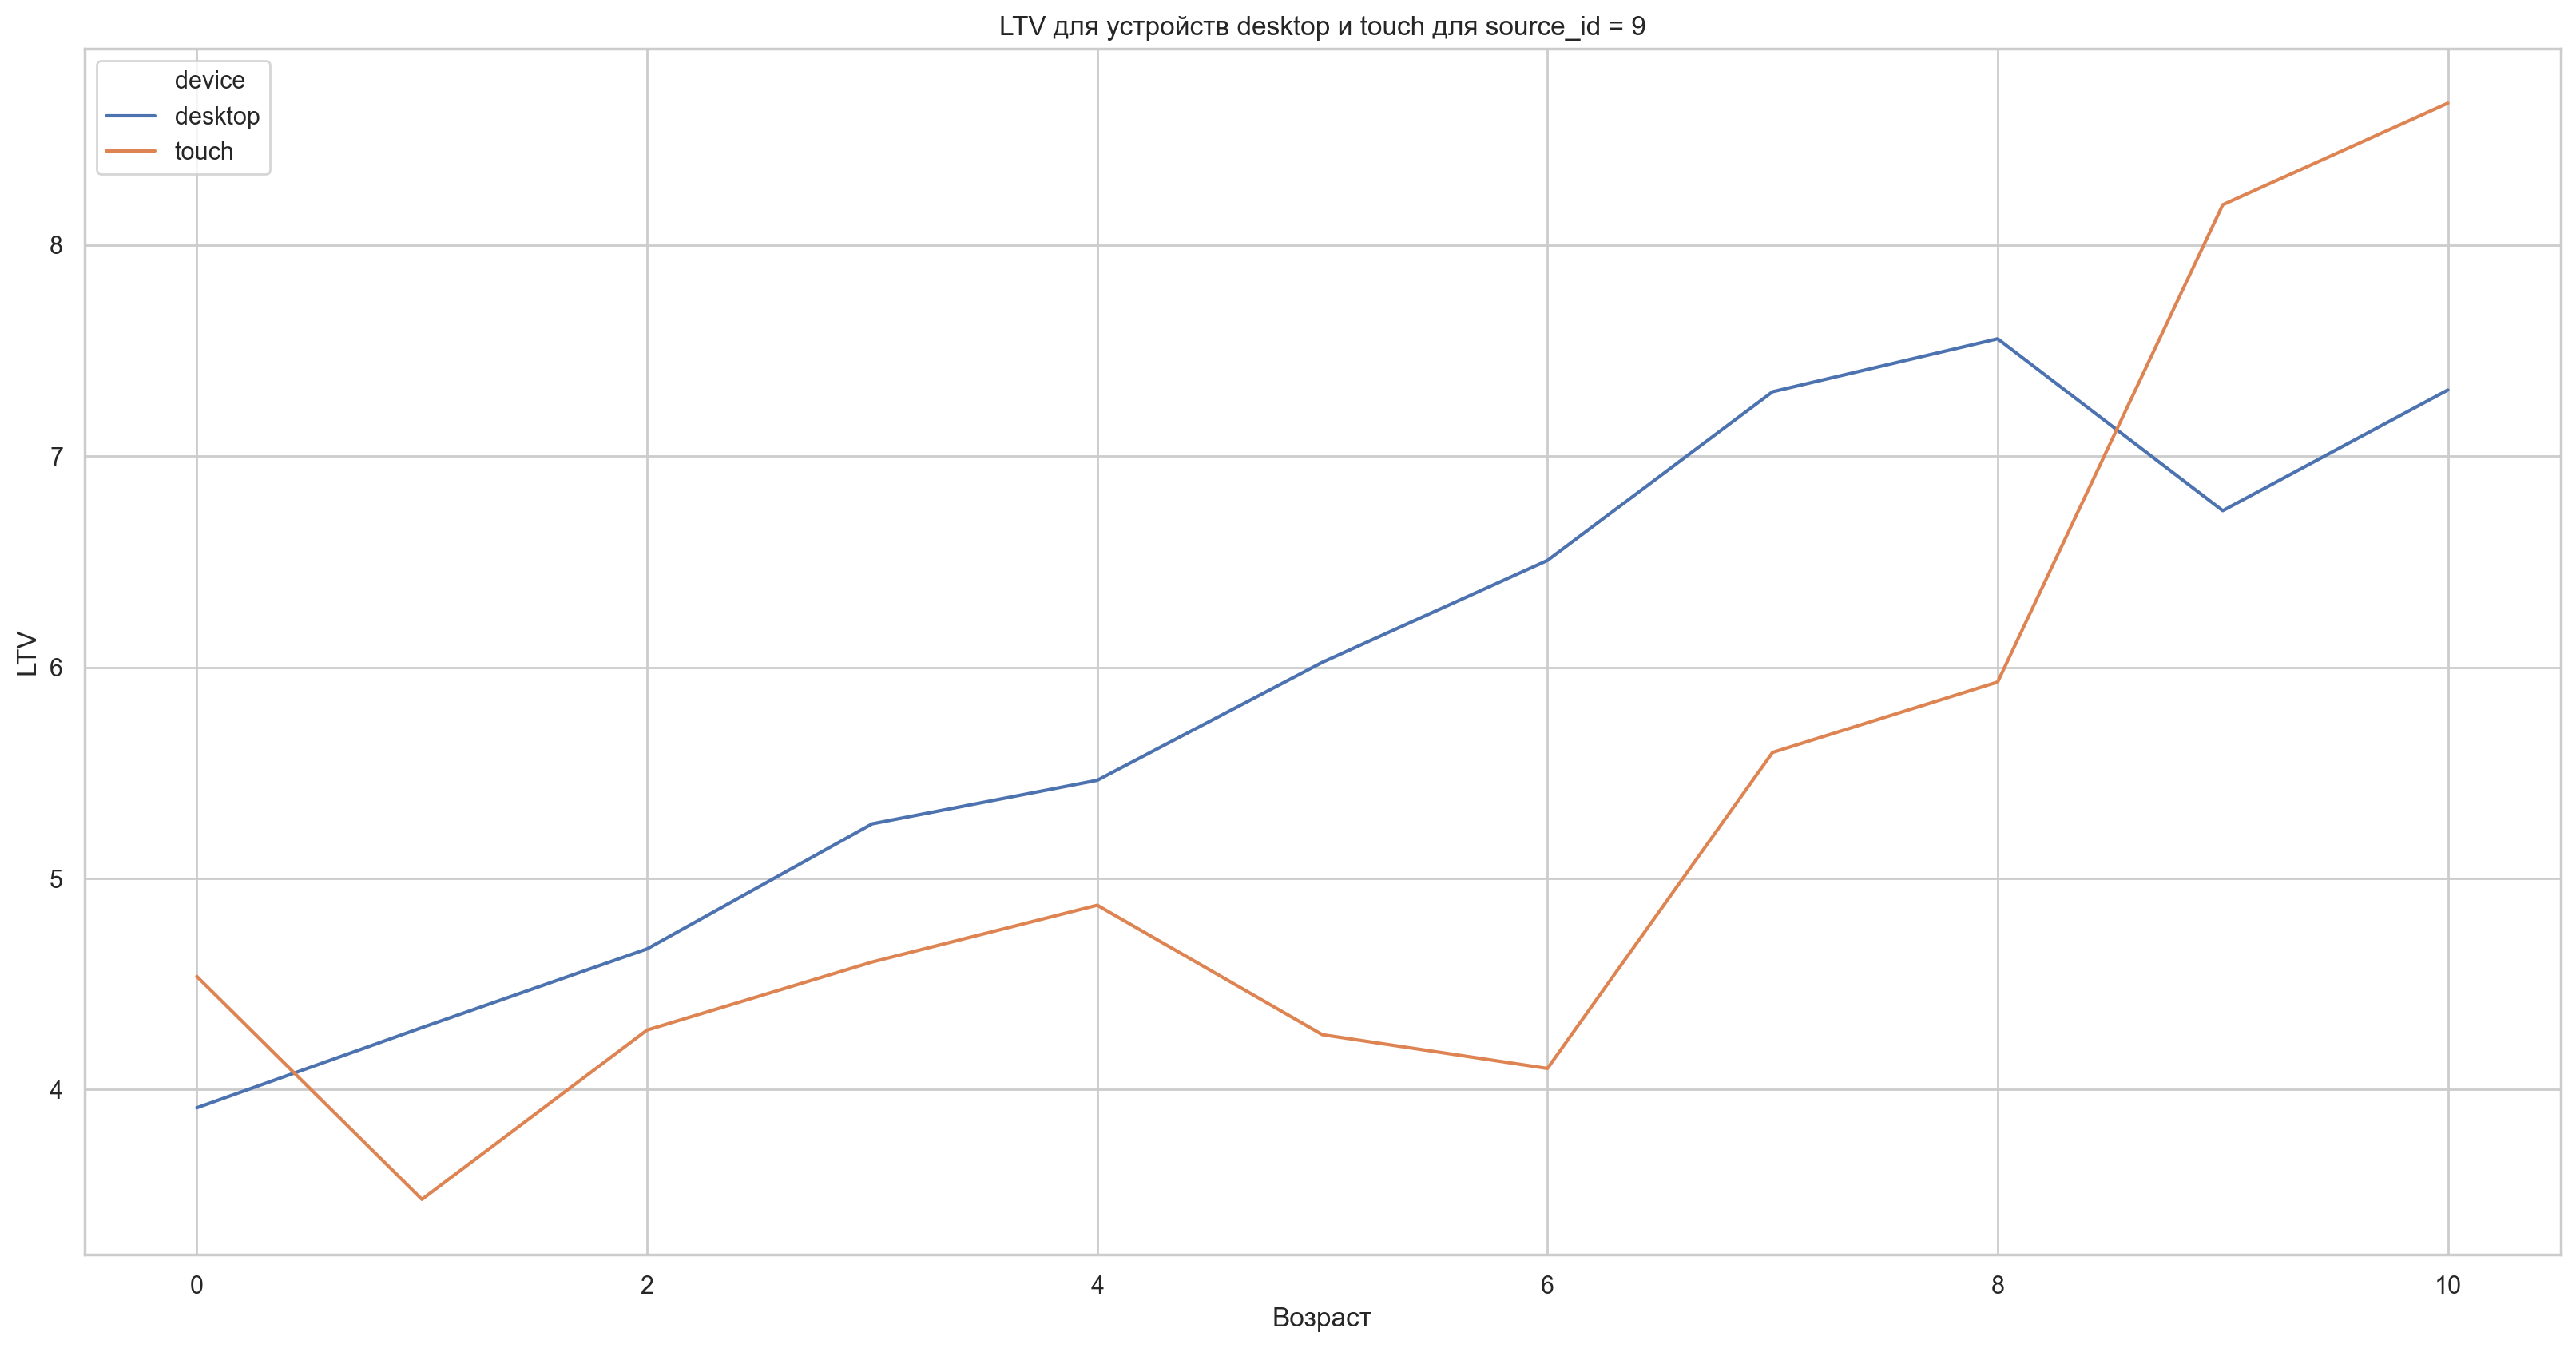

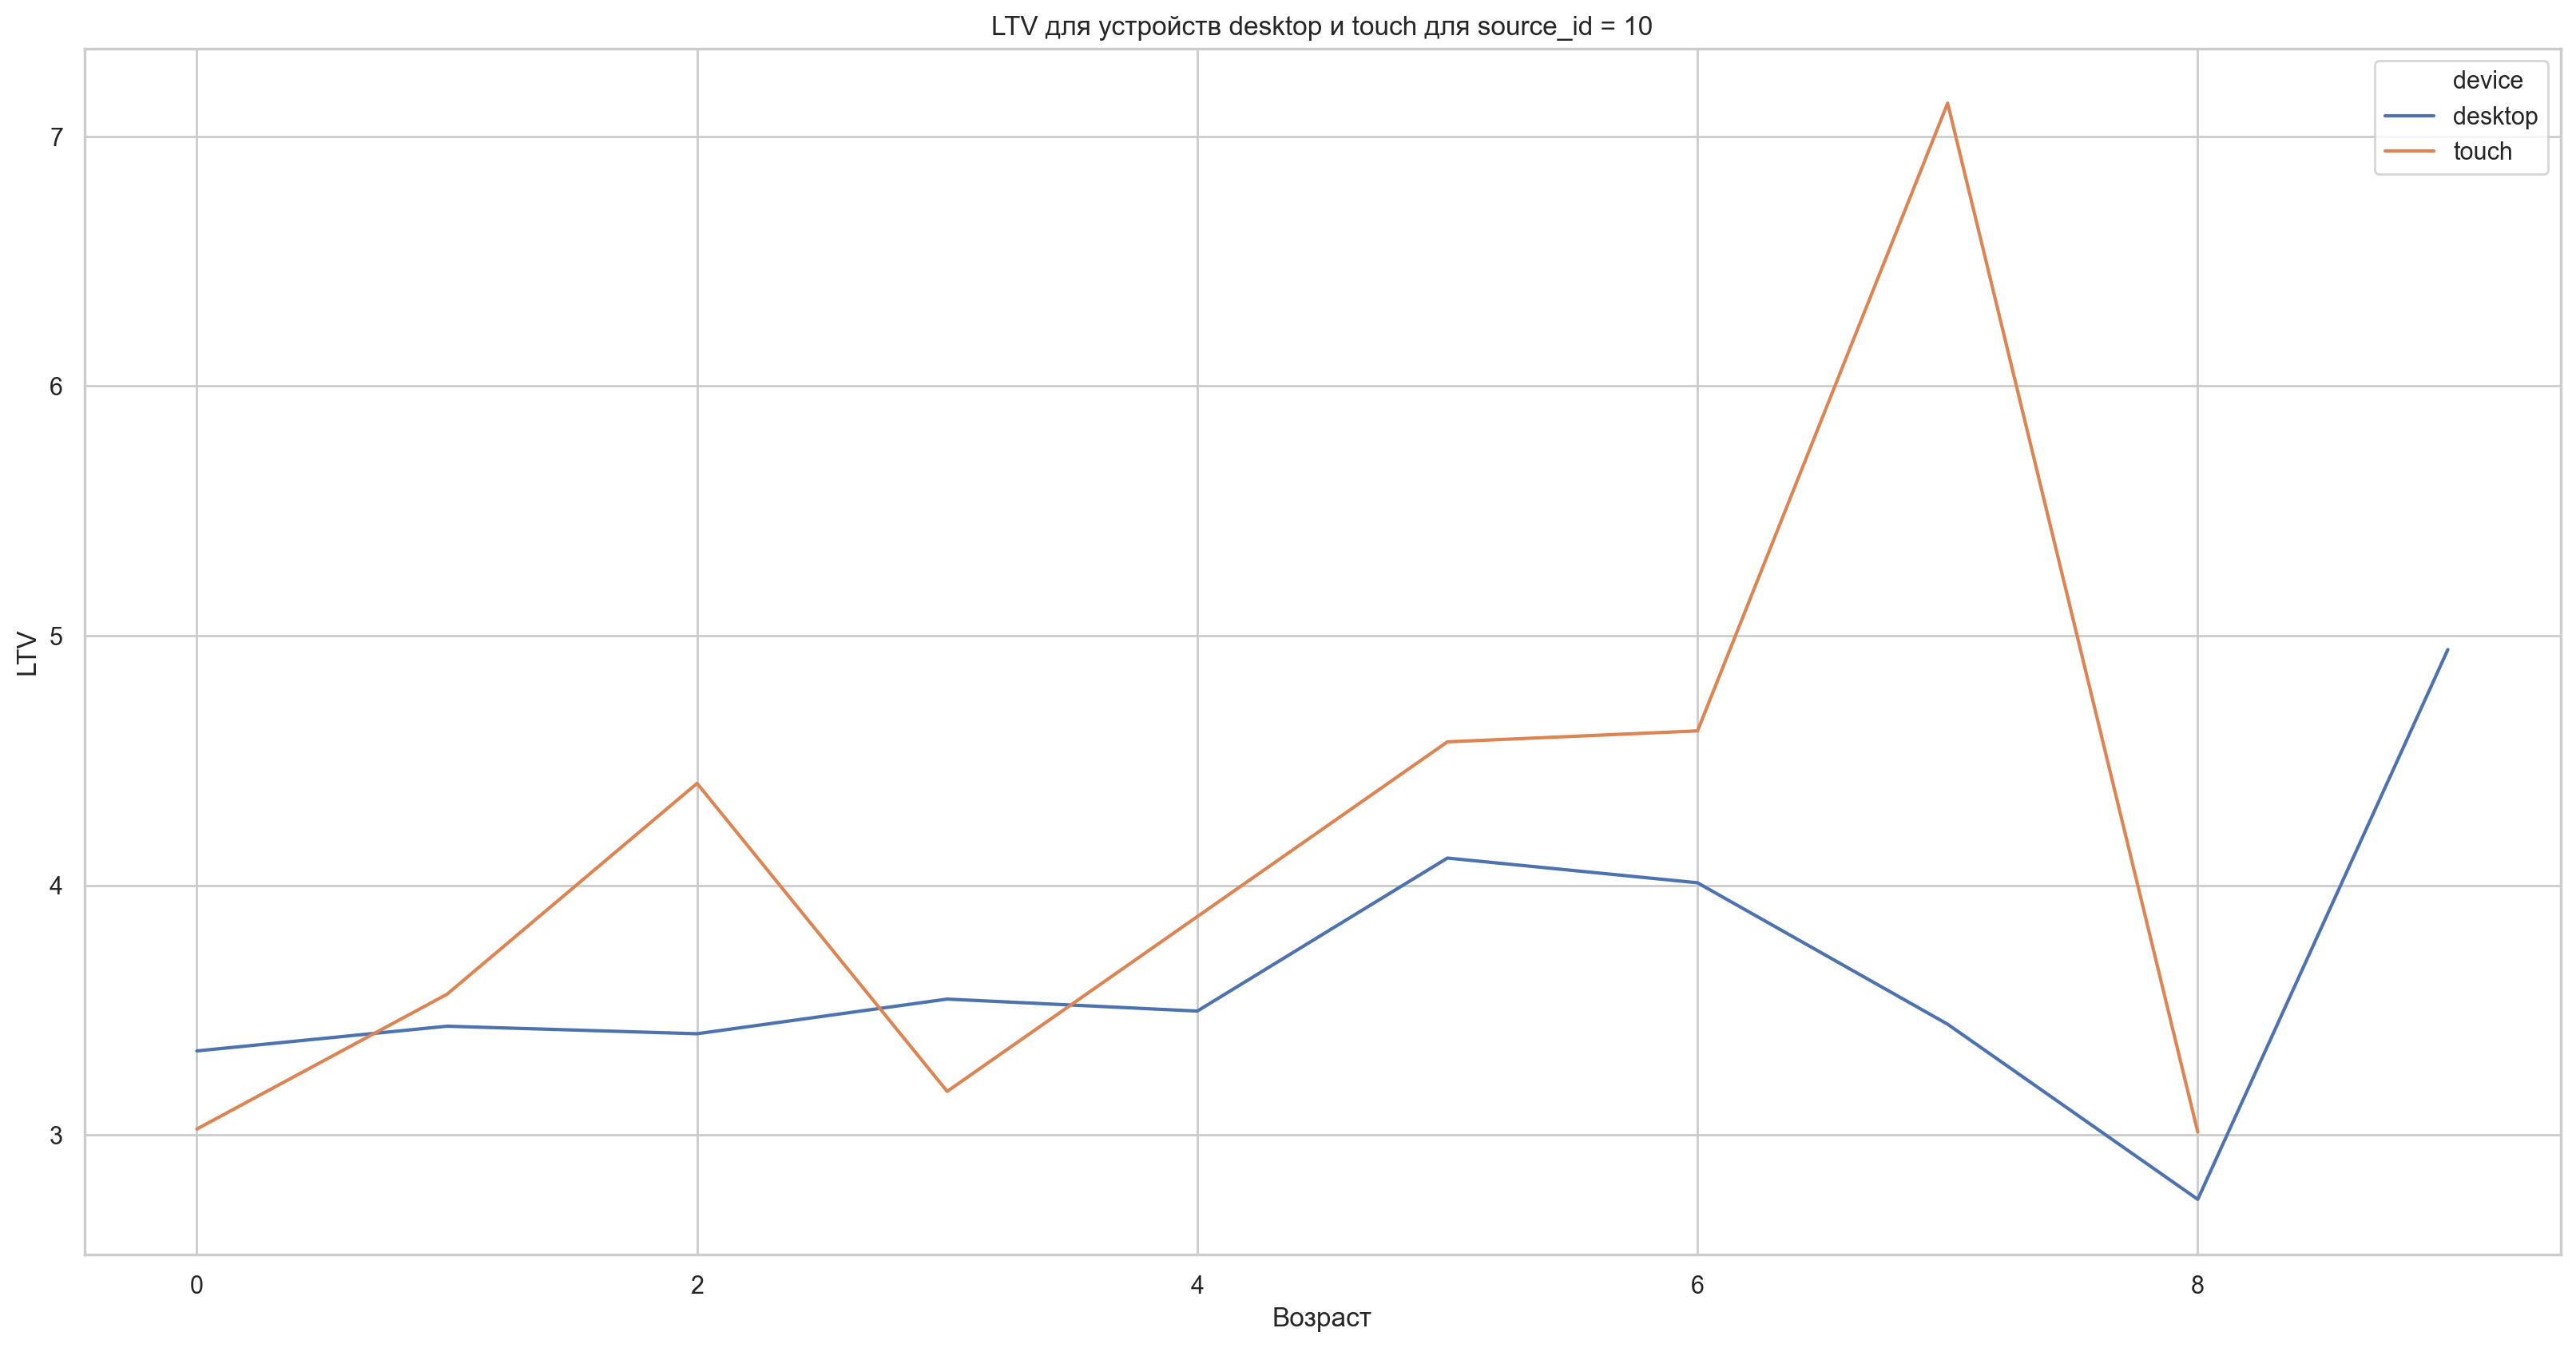

In [74]:
# Усредним LTV и запишем в новый DataFrame
display(result.head())
ltv_group = pd.DataFrame(columns=['age','ltv','device','source_id'])
for source in sources:
    for device in devices:
        ltv_result= result.loc[(result['source_id'] == source) & (result['device'] == device)].pivot_table(
            index='first_order_month', 
            columns='age', 
            values='ltv', 
            aggfunc='mean')
        ltv_result=ltv_result.cumsum(axis=1).mean(axis=0) 
        ltv_result=ltv_result.reset_index()
        ltv_result.columns=['age','ltv']
        ltv_result['device']=device
        ltv_result['source_id']=source                           
        ltv_group = ltv_group.append(ltv_result, ignore_index=True)

# Пройдем циклом по ресурсам и построим график
for source in sources:
    sns.set_style("whitegrid")
    plt.figure(figsize=(20, 10), dpi=200)    
    g = sns.lineplot(x="age", y="ltv",
                 hue="device",
                 data=ltv_group.loc[ltv_group['source_id']== source])
    title_name = 'LTV для устройств desktop и touch для source_id = ' + str(source)
    g.set(title=title_name)
    g.set(xlabel='Возраст', ylabel='LTV');

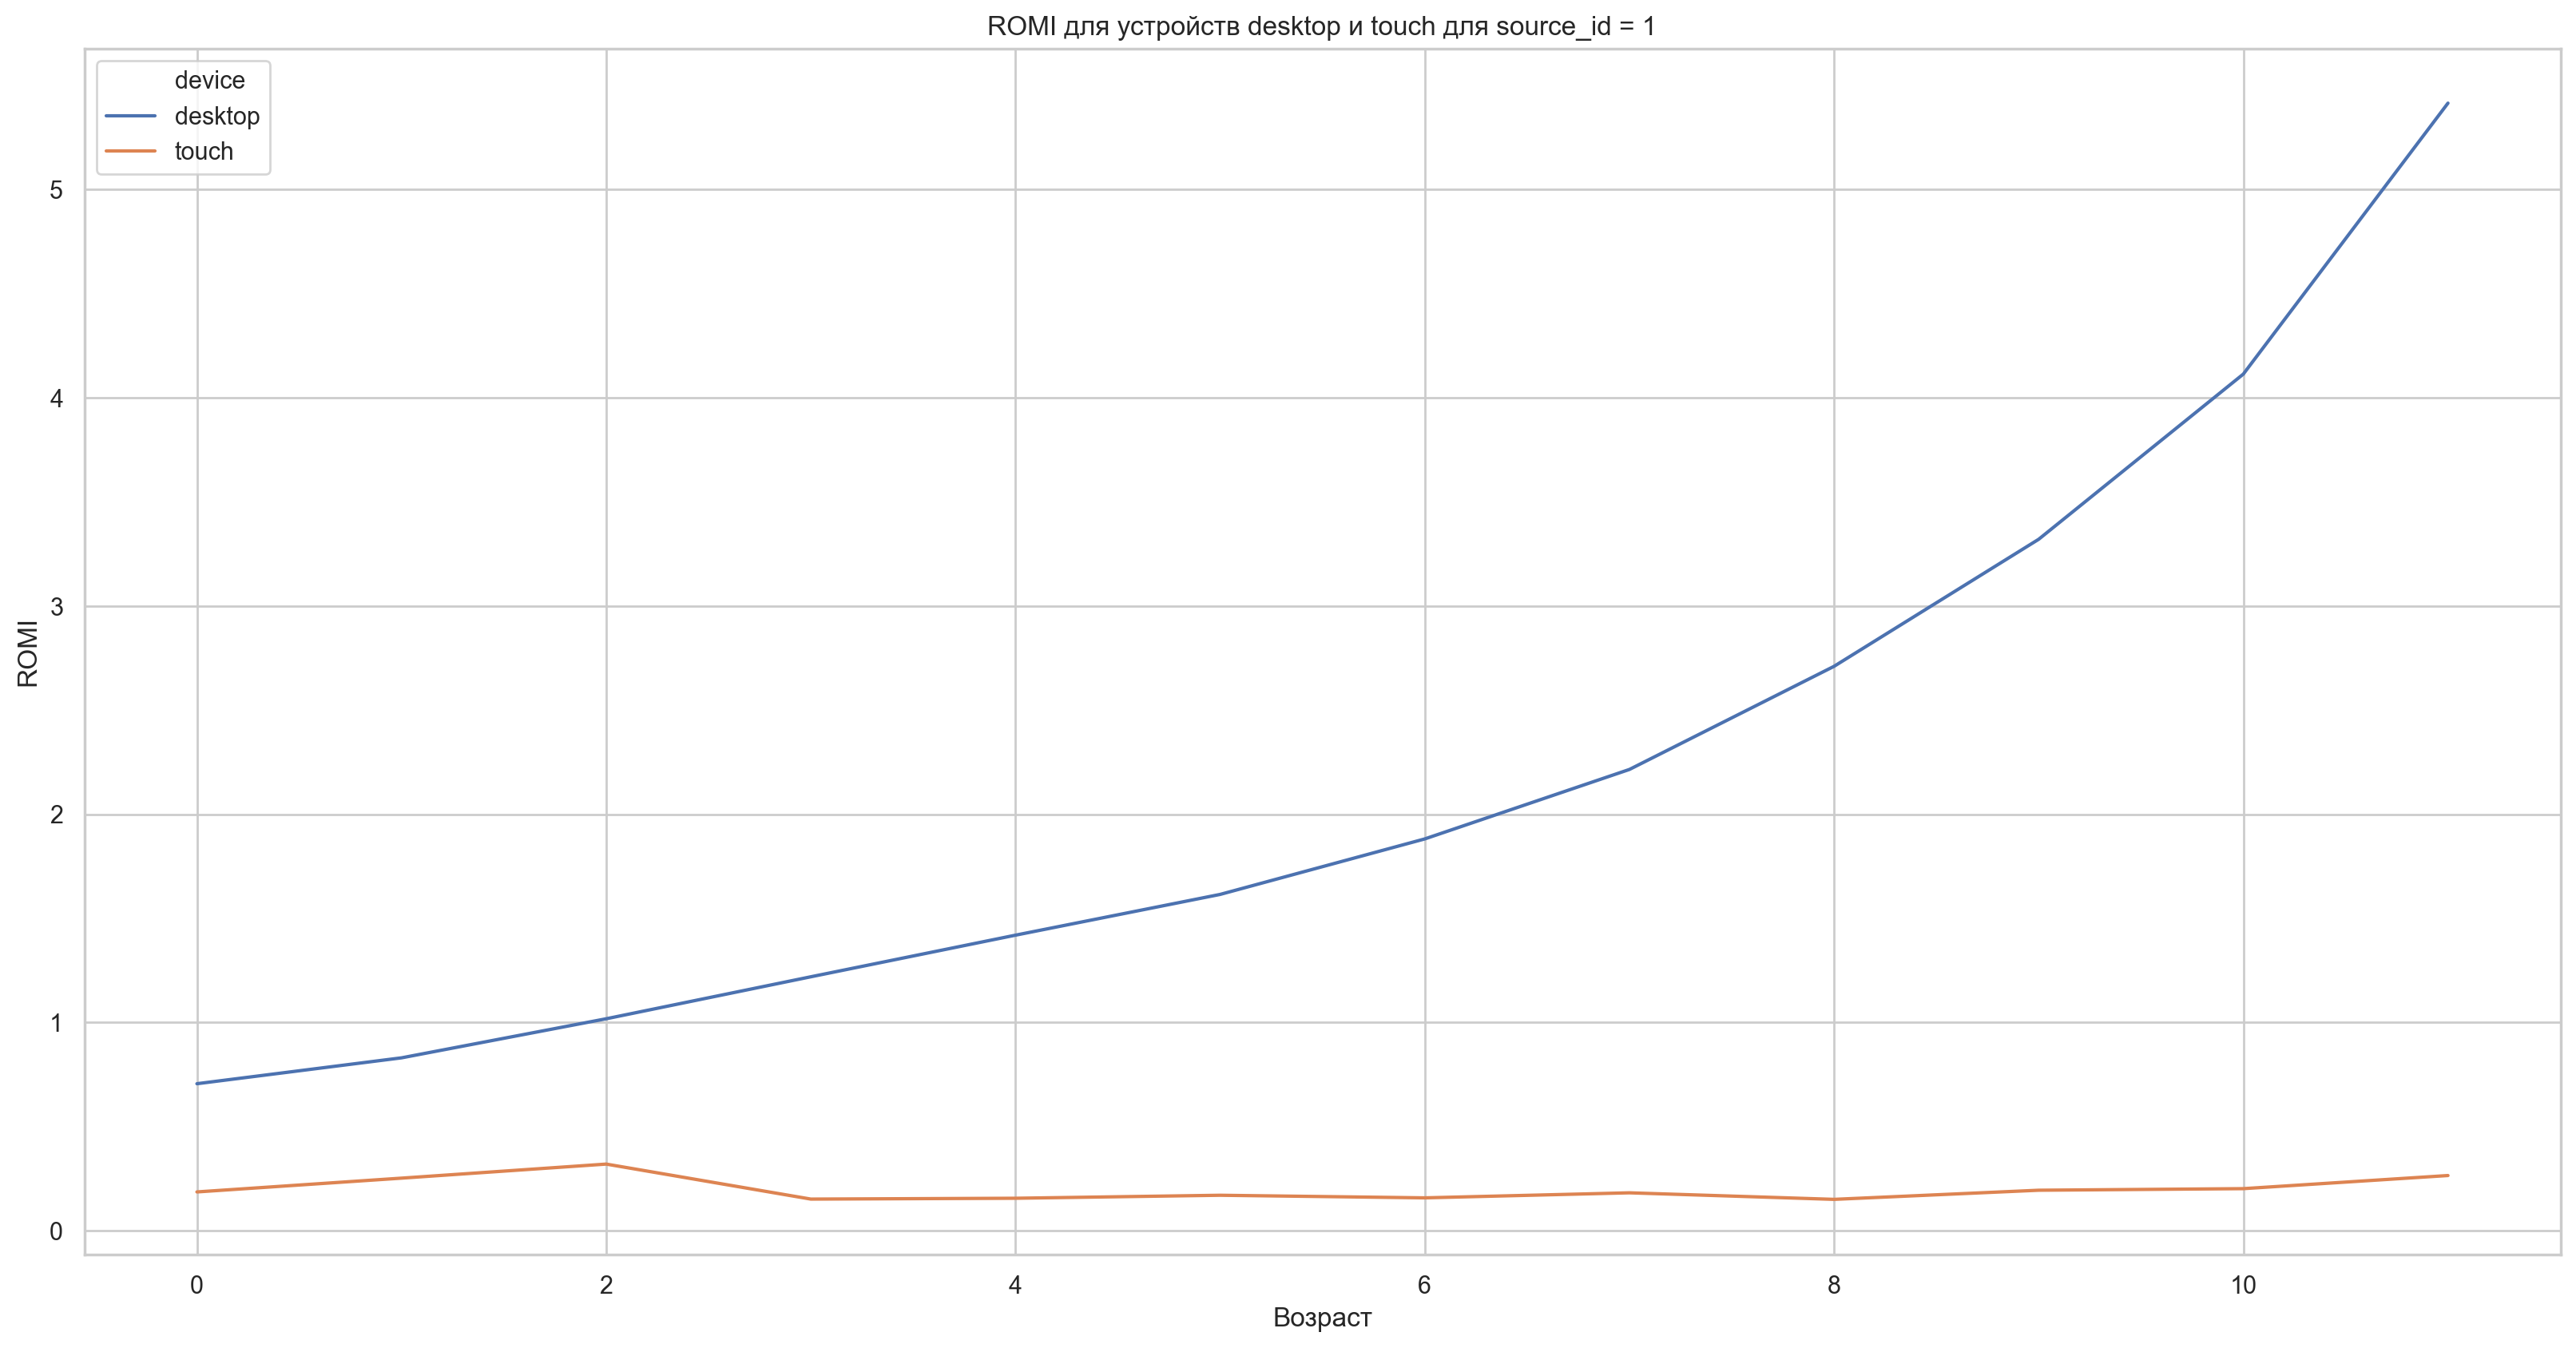

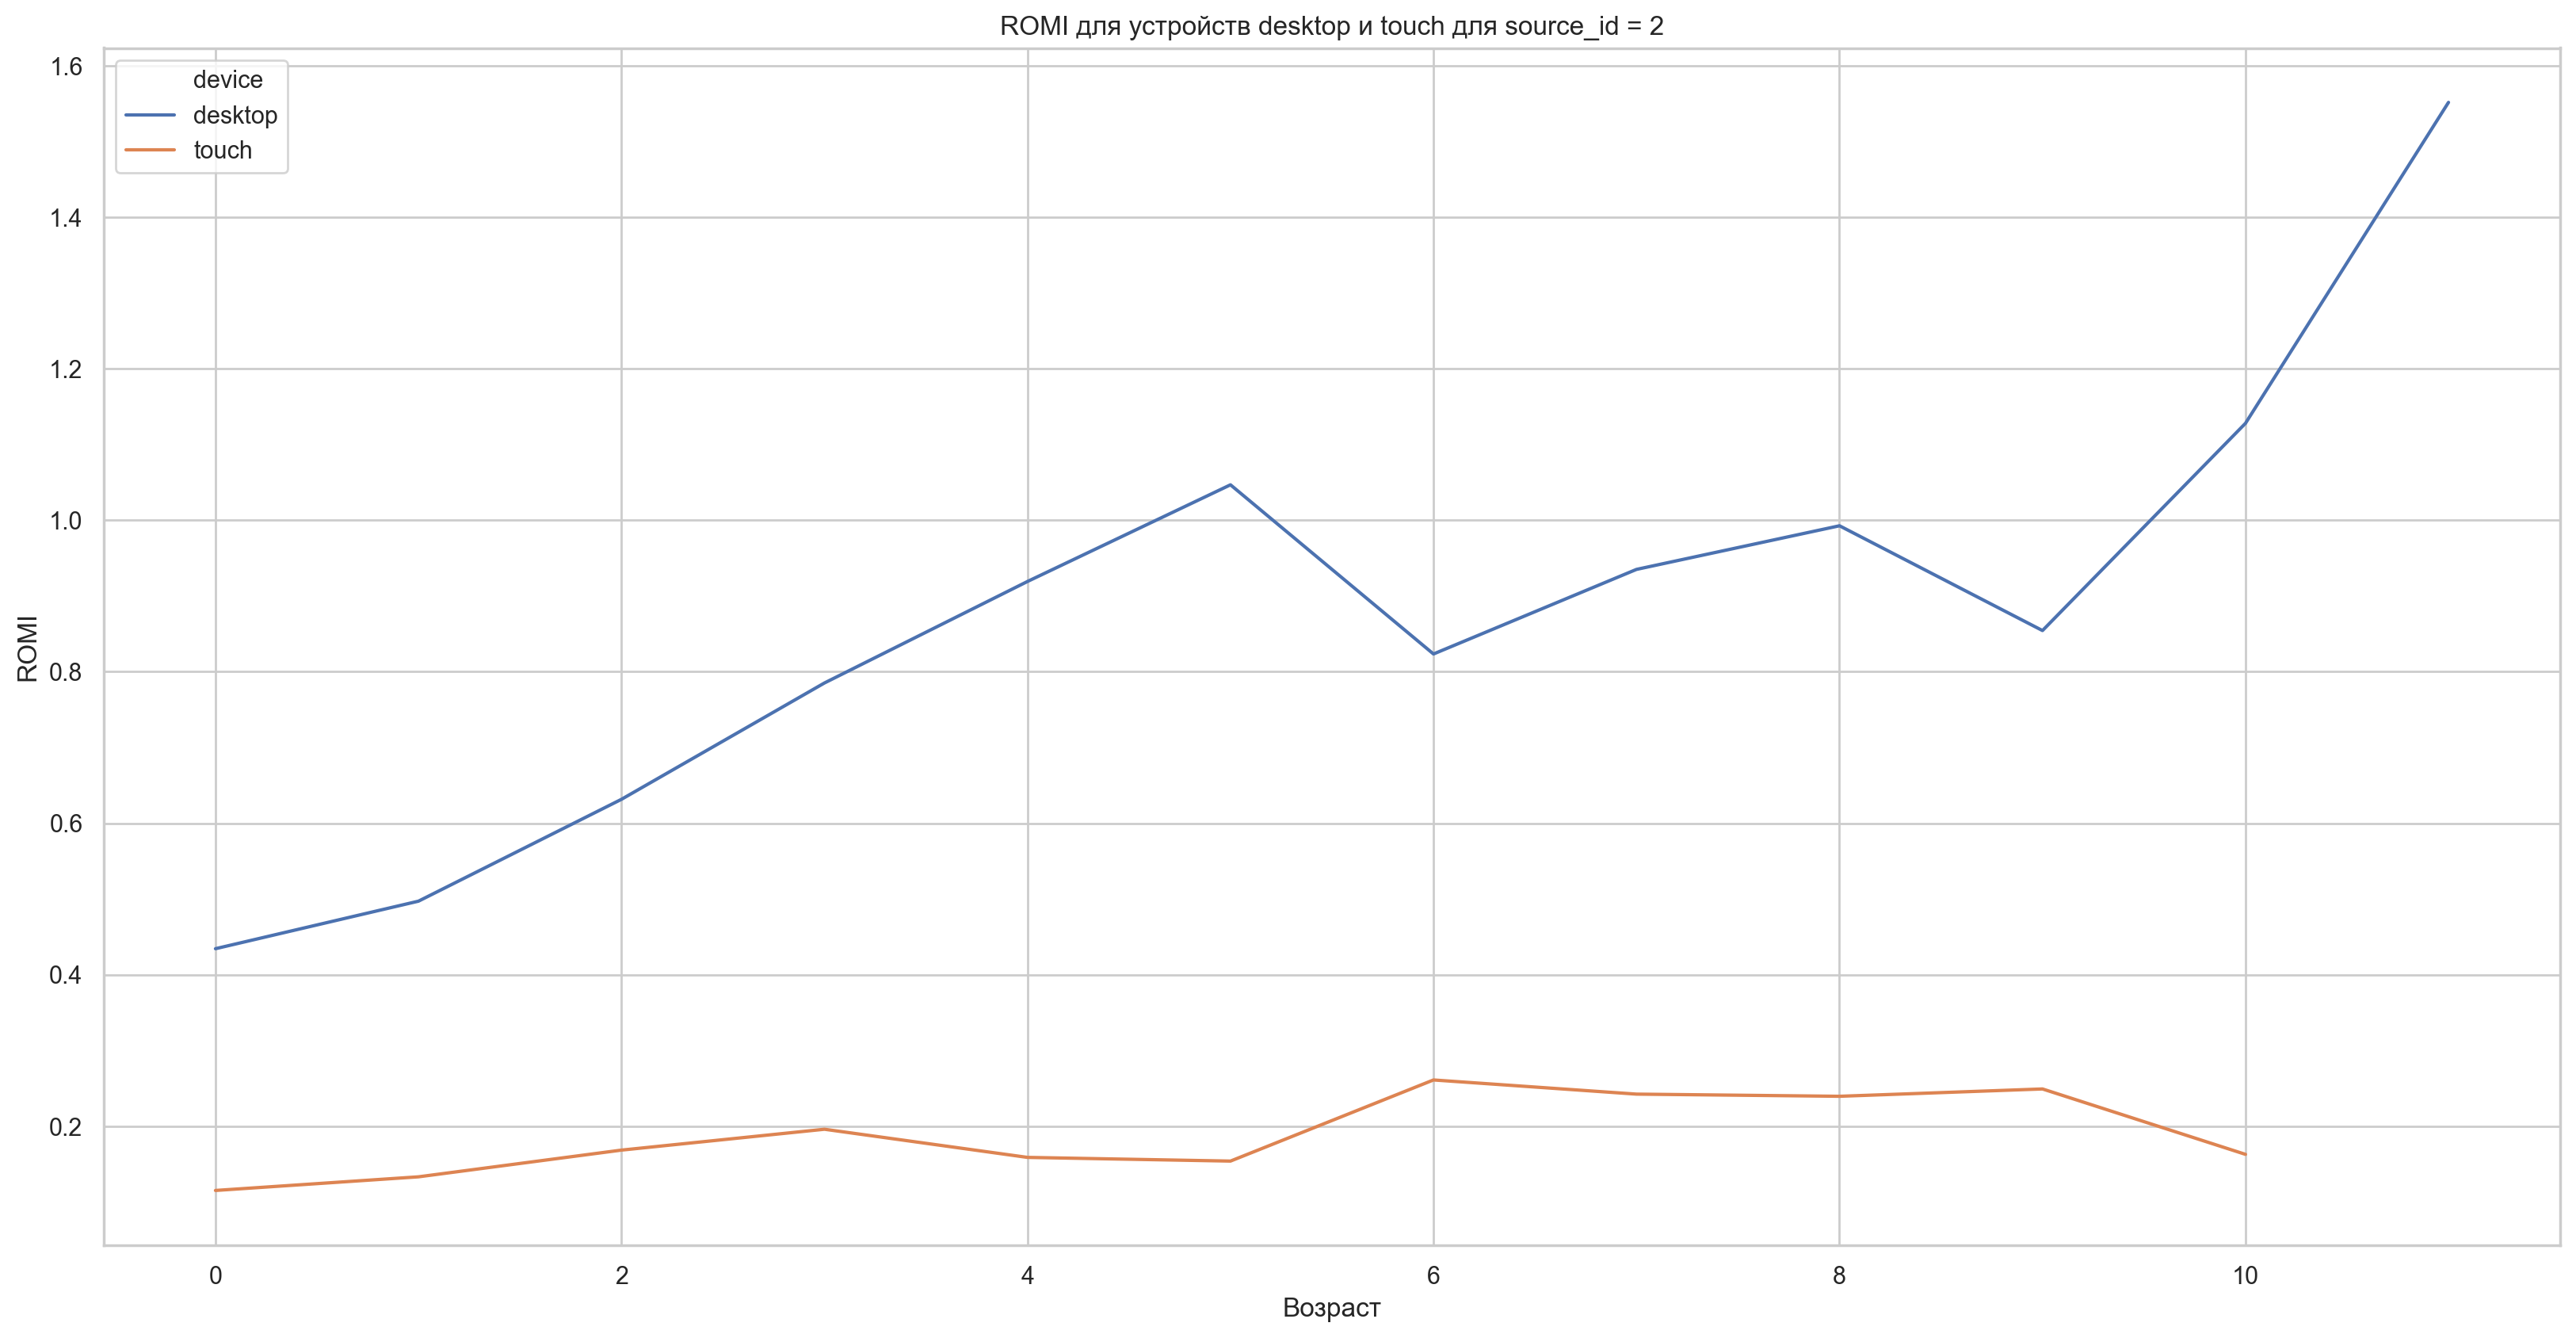

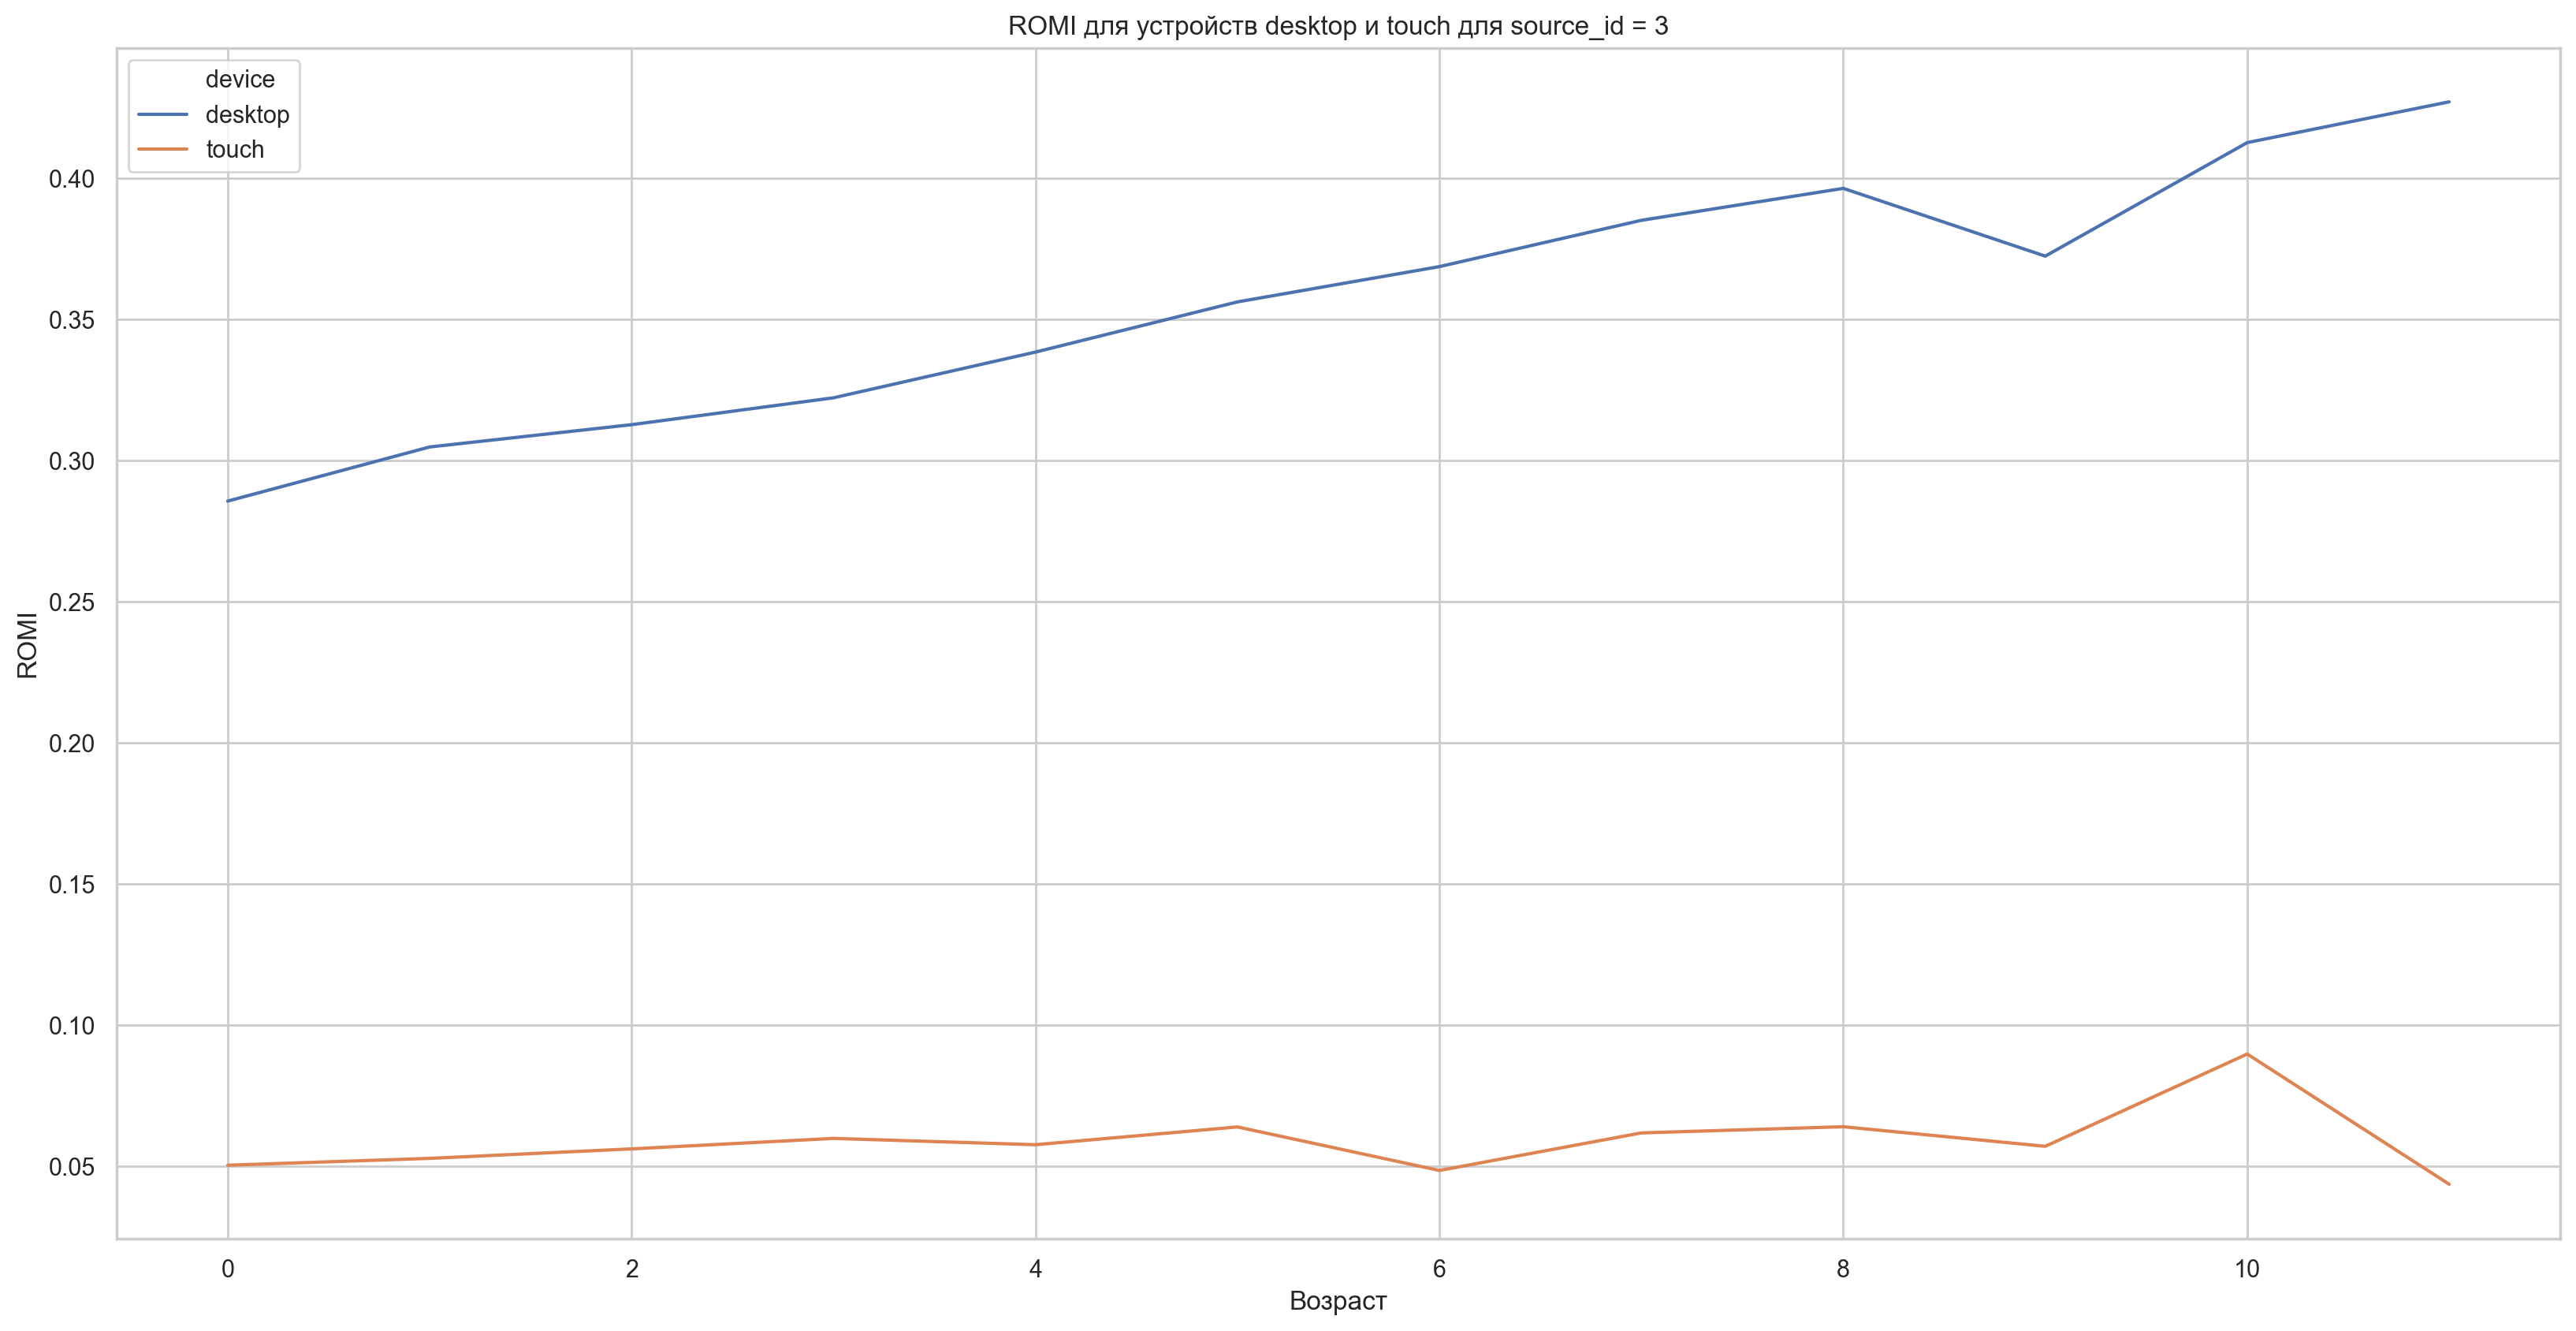

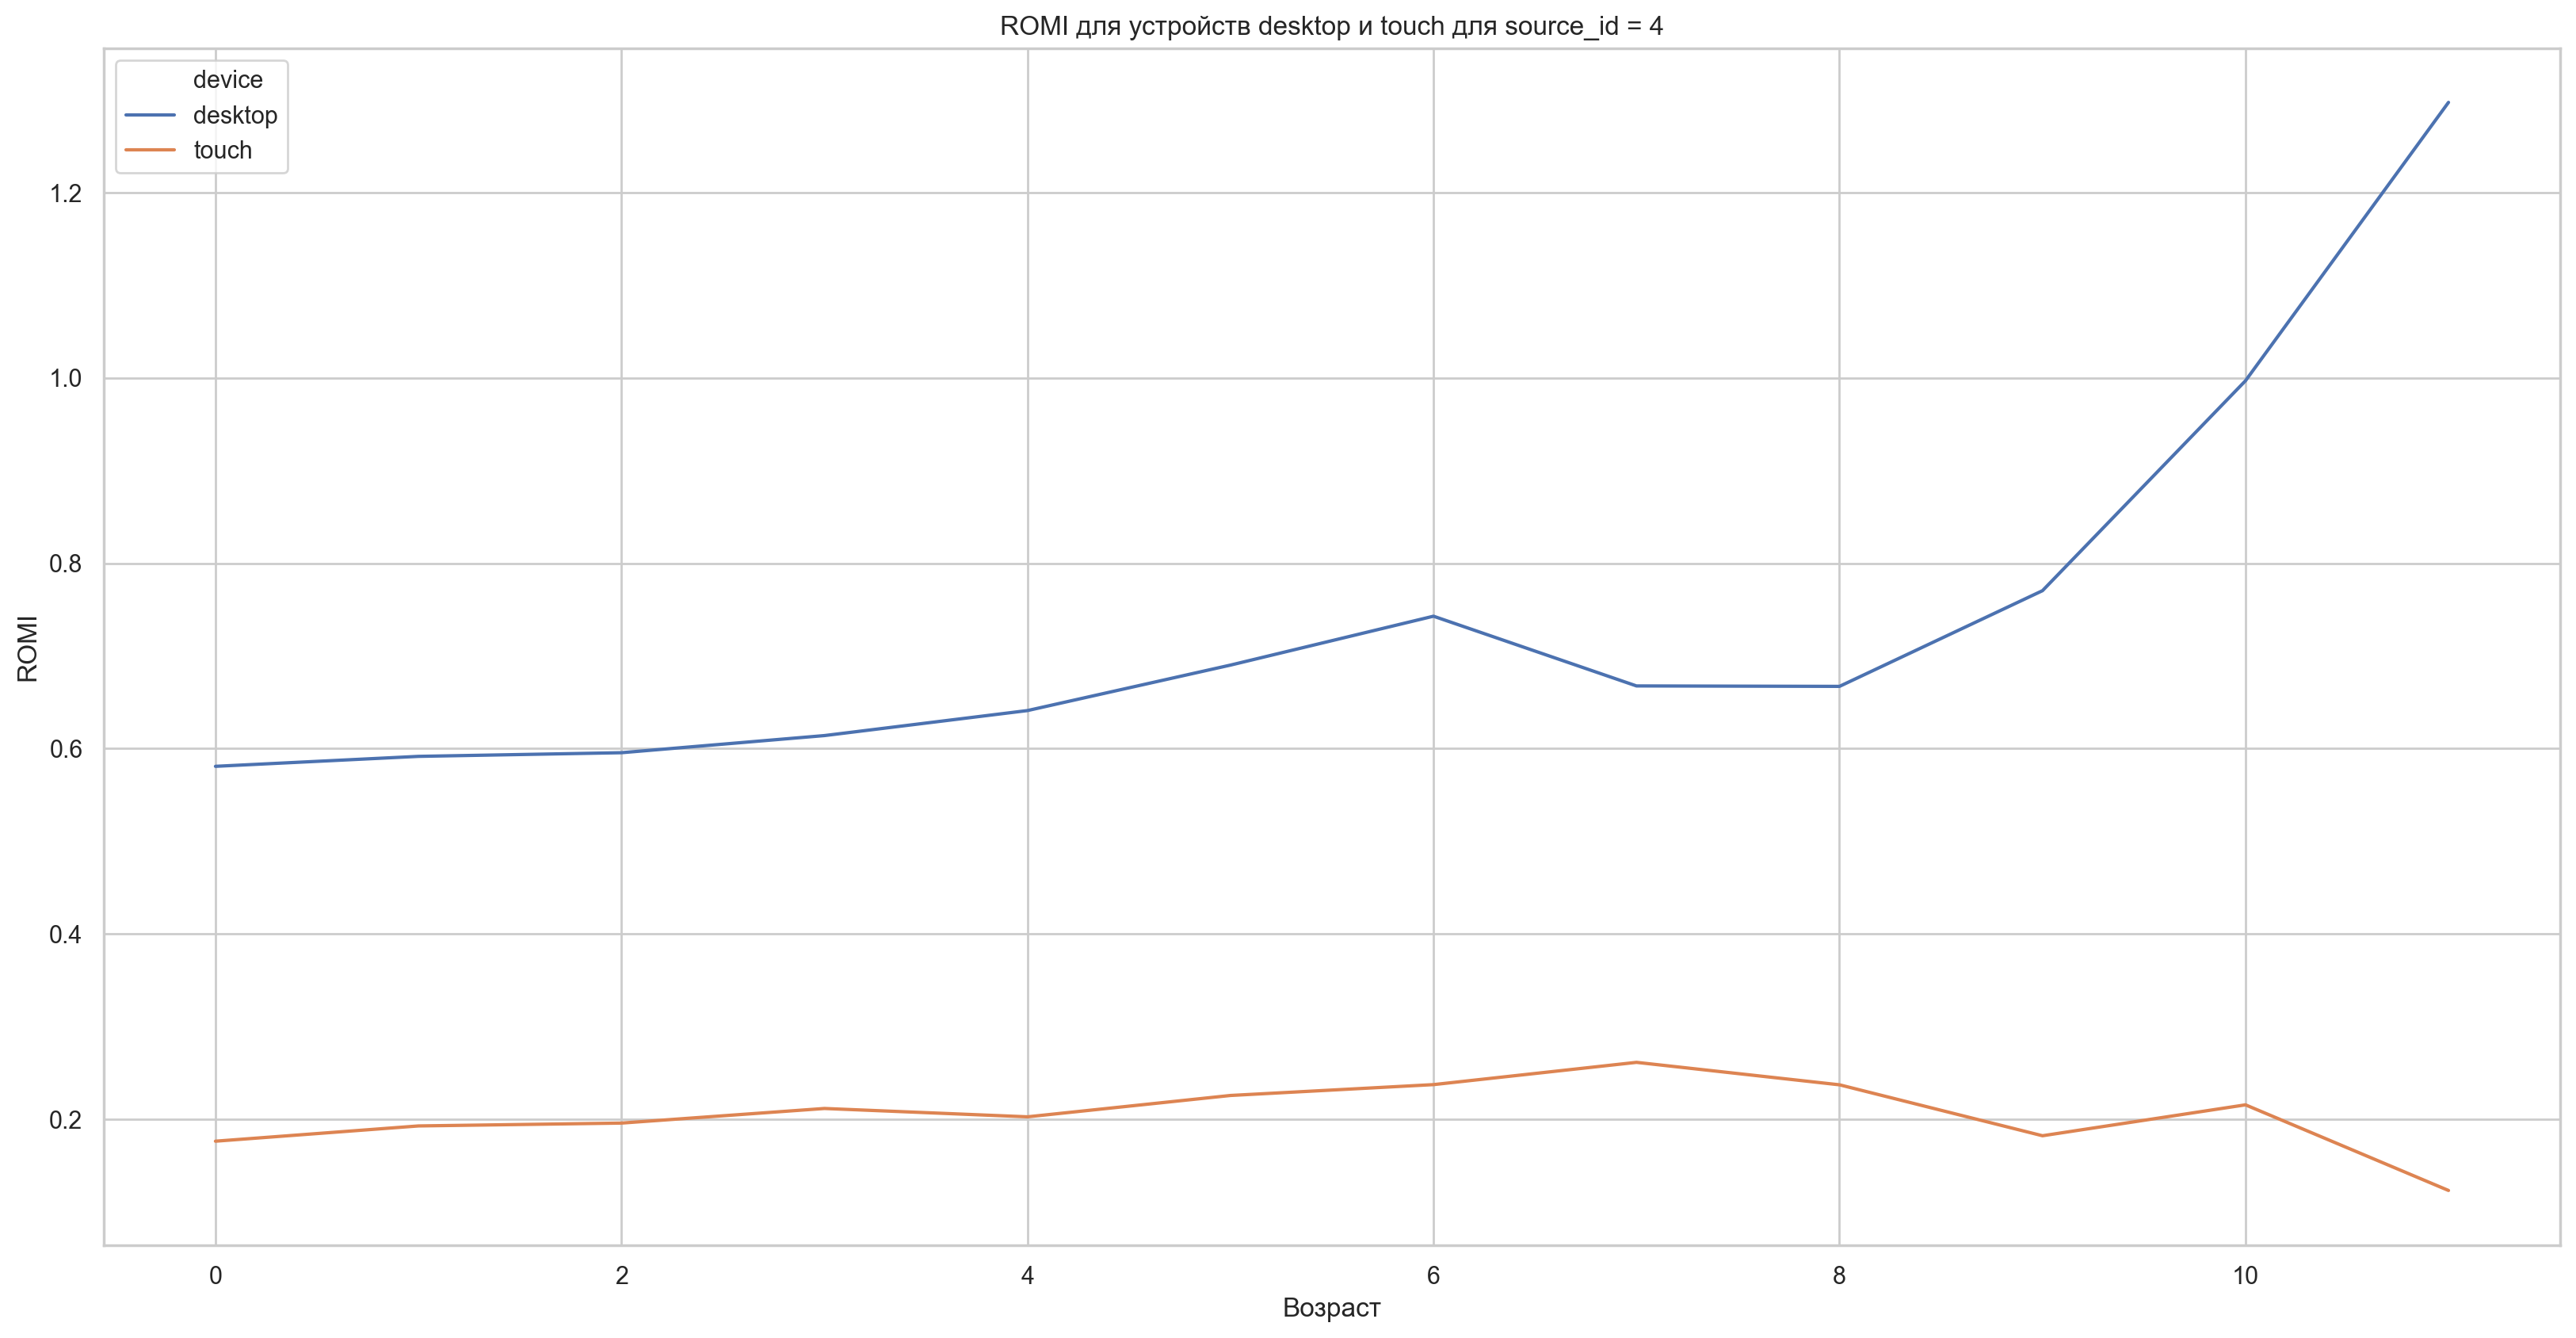

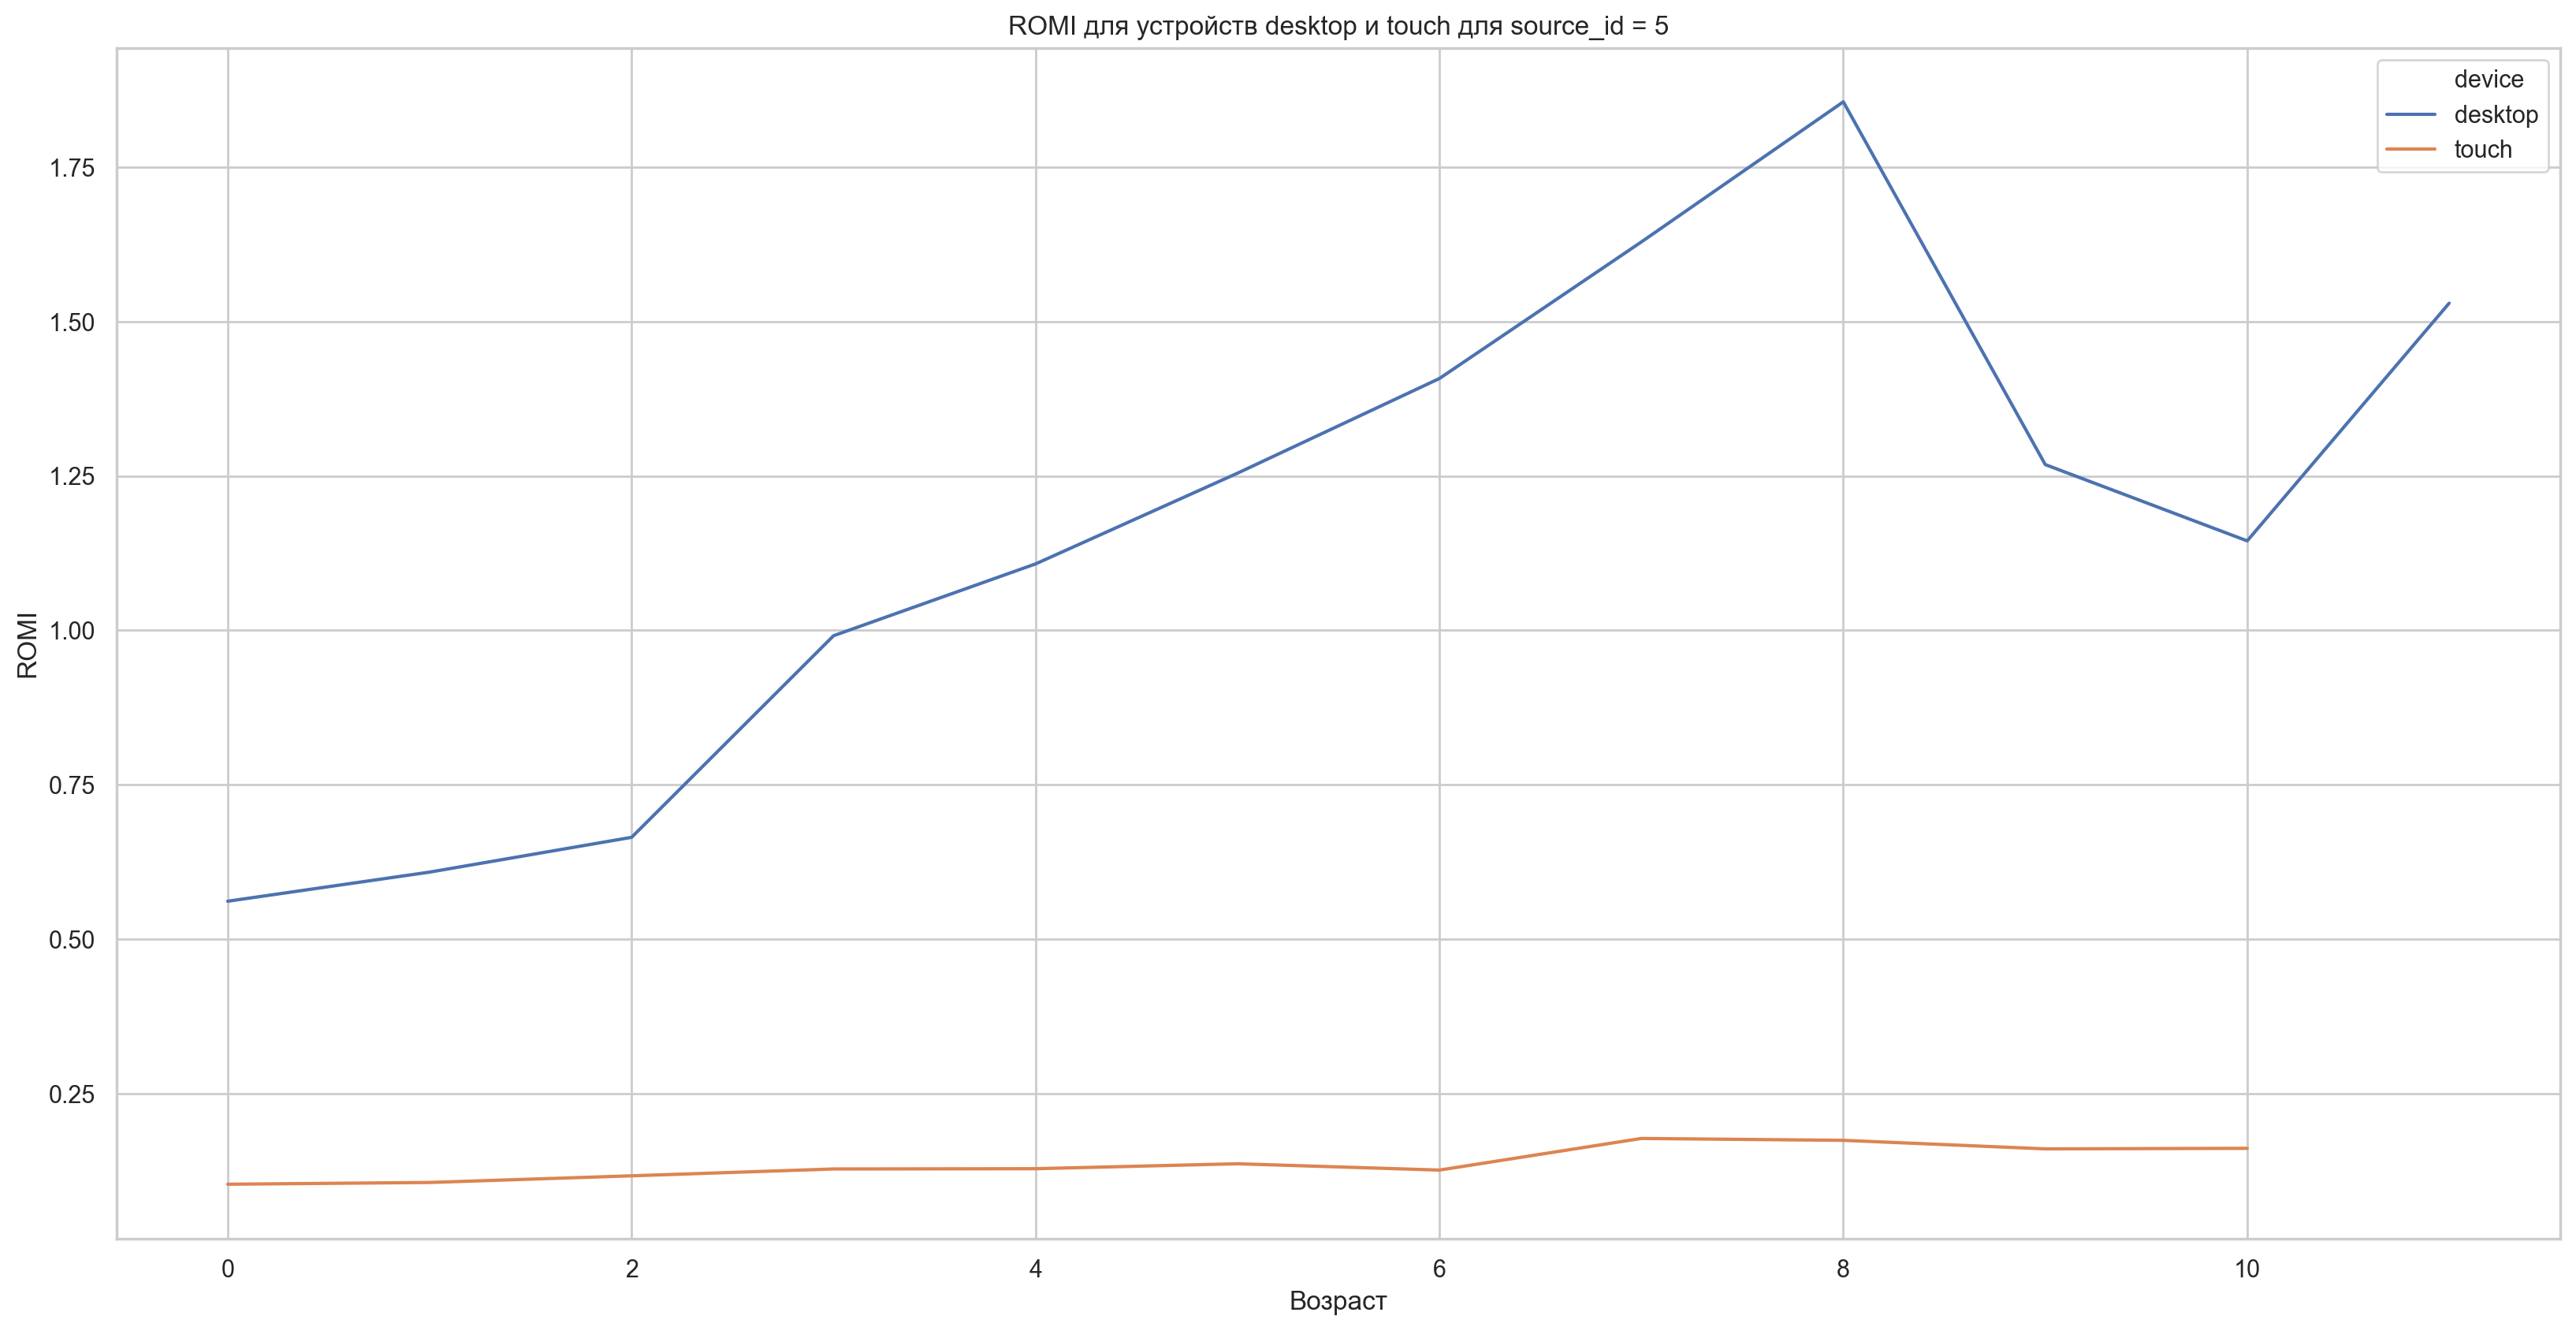

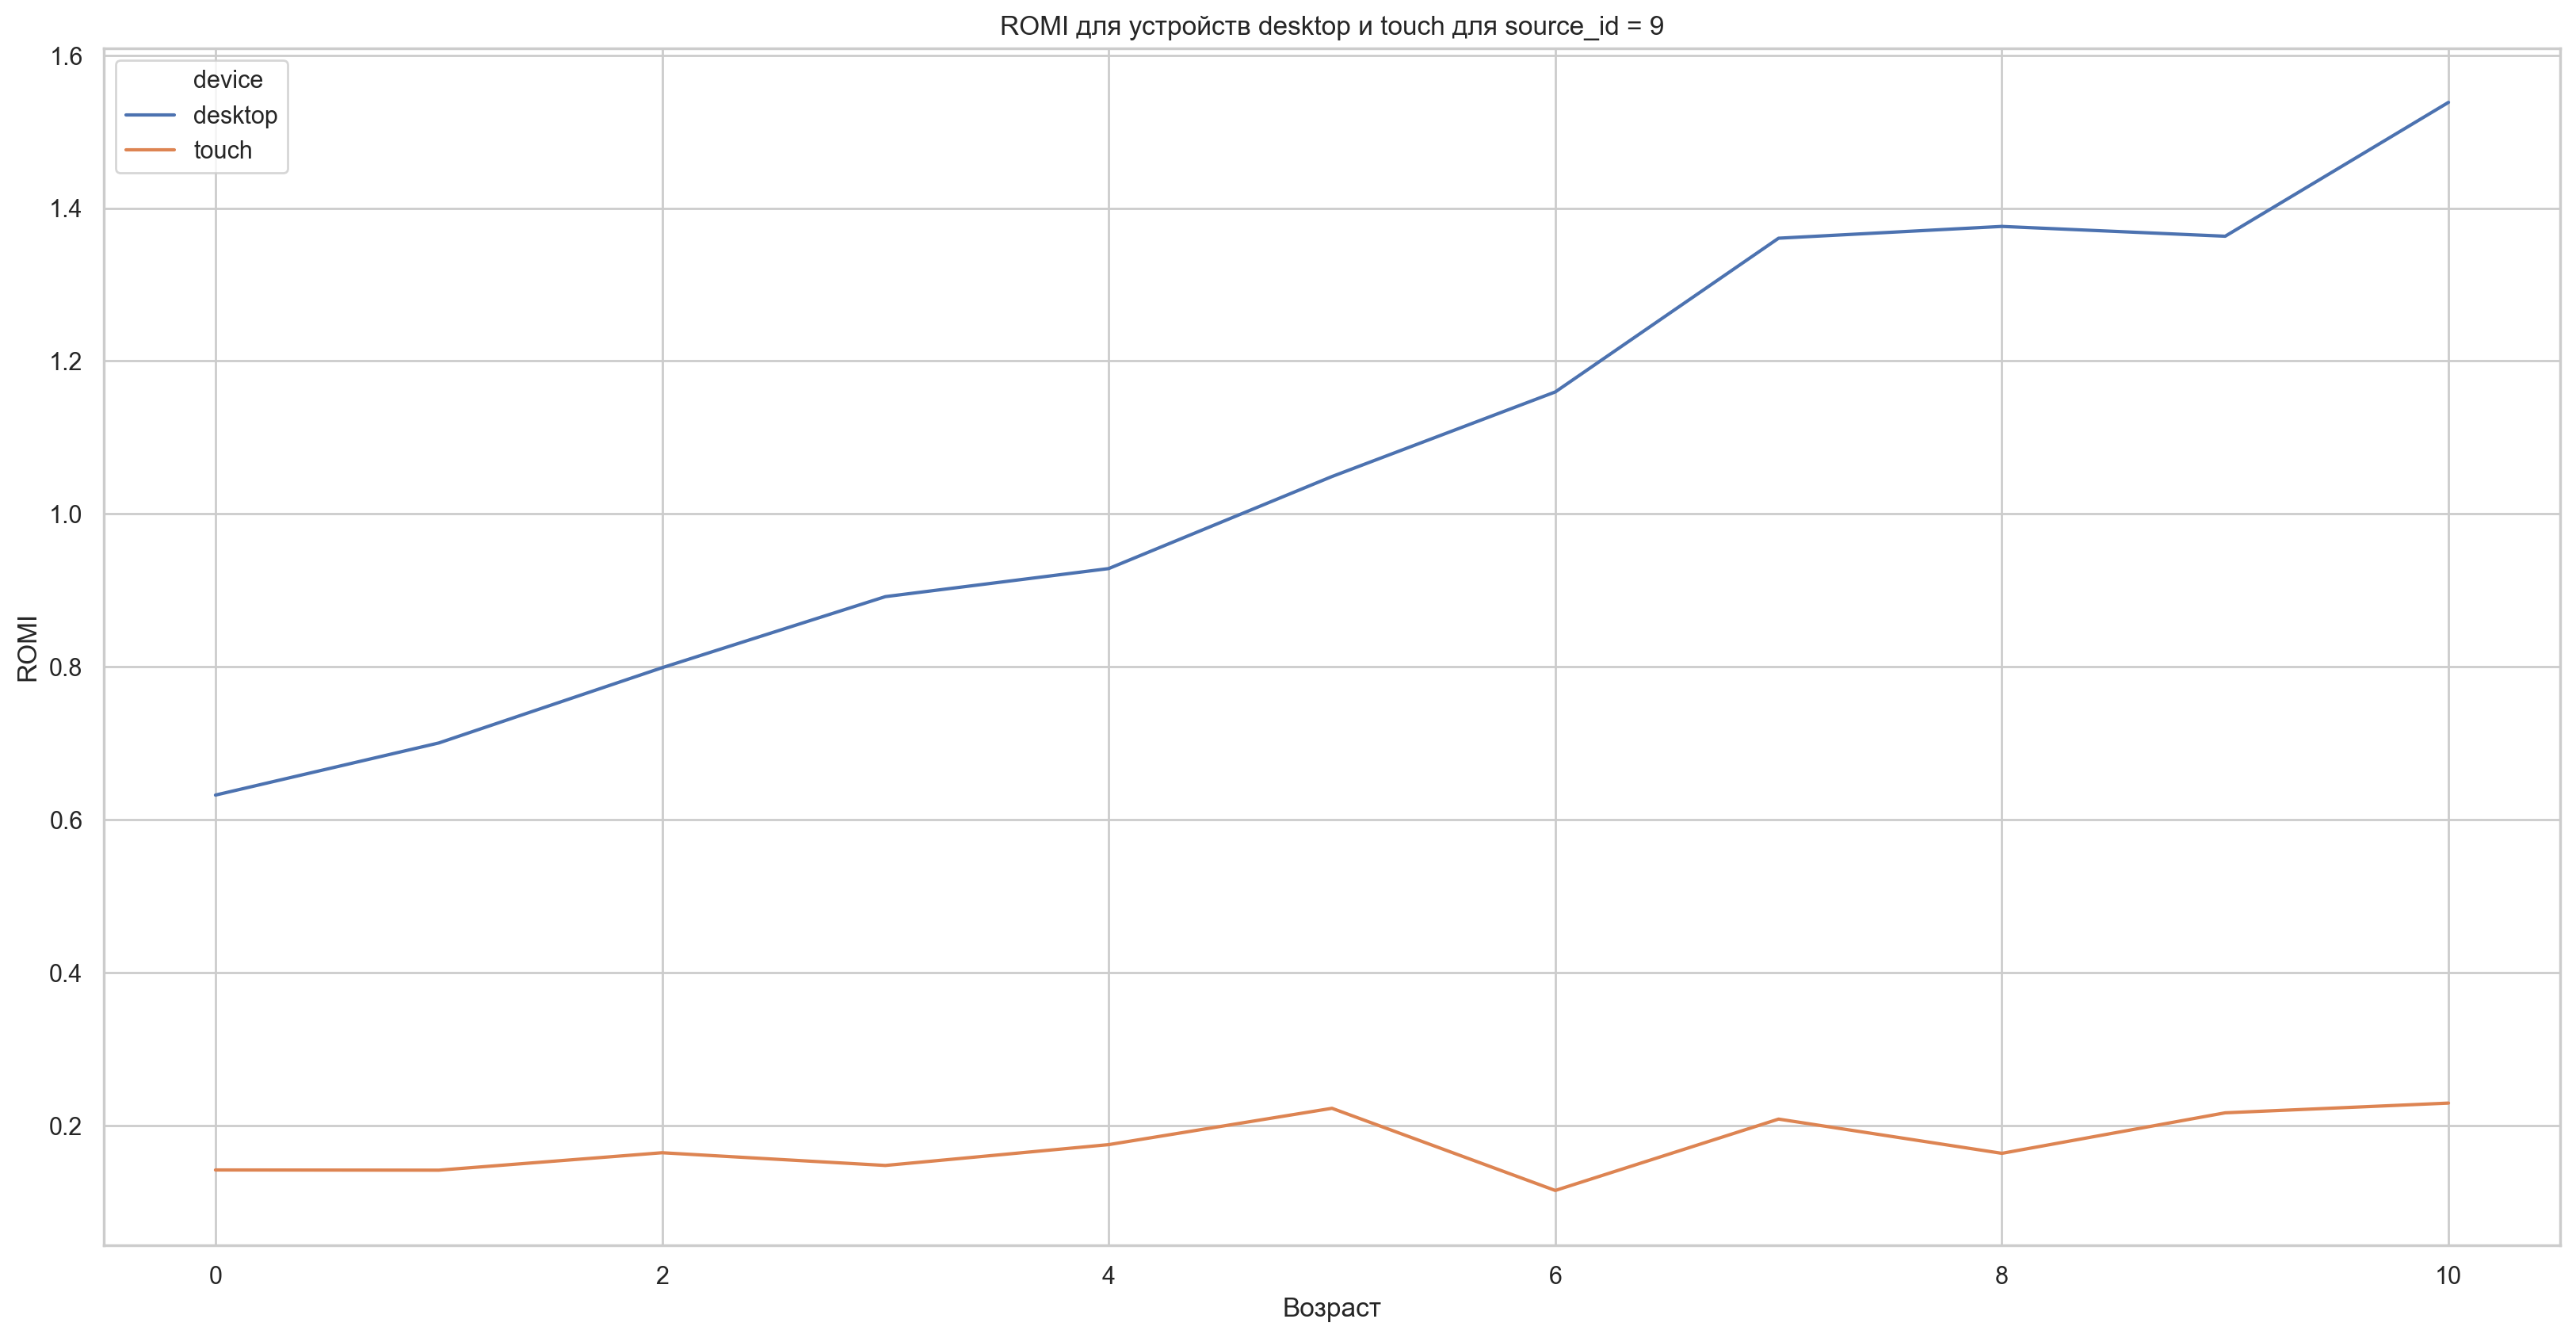

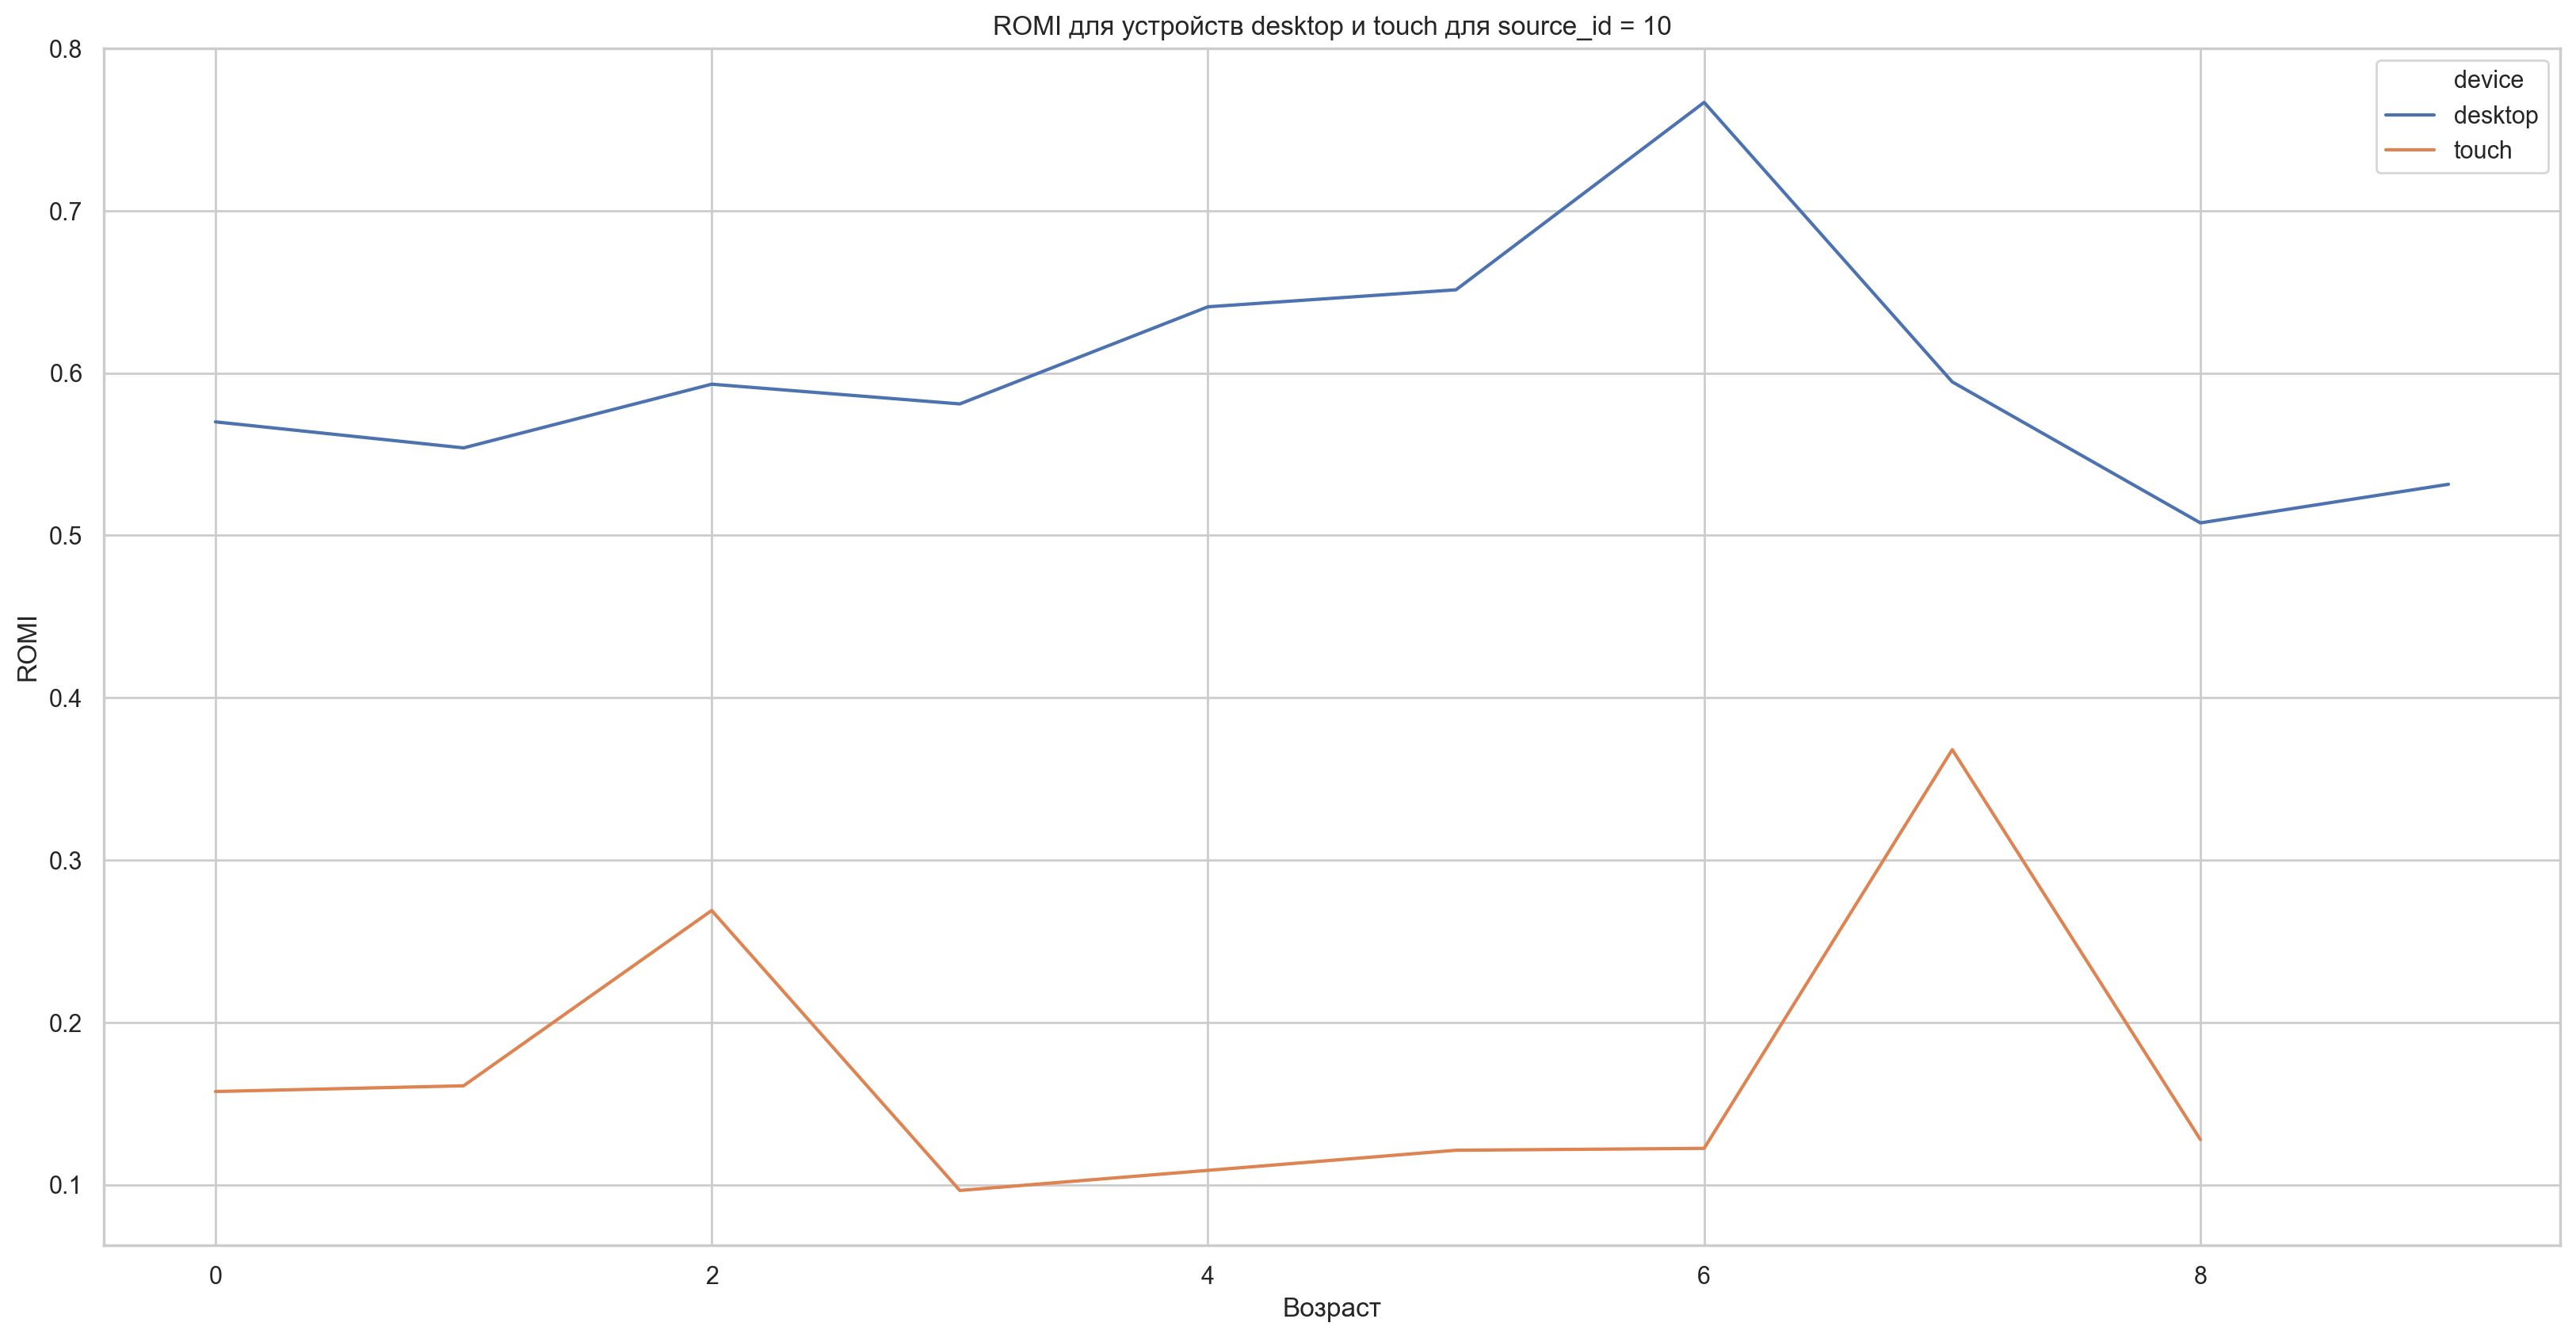

In [69]:
# Усредним ROMI и запишем в новый DataFrame
romi_group = pd.DataFrame(columns=['age','romi','device','source_id'])
for source in sources:
    for device in devices:
        romi_result= result.loc[(result['source_id'] == source) & (result['device'] == device)].pivot_table(
            index='first_order_month', 
            columns='age', 
            values='romi', 
            aggfunc='mean')
        romi_result=romi_result.cumsum(axis=1).mean(axis=0) 
        romi_result=romi_result.reset_index()
        romi_result.columns=['age','romi']
        romi_result['device']=device
        romi_result['source_id']=source                           
        romi_group = romi_group.append(romi_result, ignore_index=True)
# Пройдем циклом по ресурсам и построим график
for source in sources:
    sns.set_style("whitegrid")
    plt.figure(figsize=(20, 10), dpi=200)    
    g = sns.lineplot(x="age", y="romi",
                 hue="device",
                 data=romi_group.loc[romi_group['source_id']== source])
    title_name = 'ROMI для устройств desktop и touch для source_id = ' + str(source)
    g.set(title=title_name)
    g.set(xlabel='Возраст', ylabel='ROMI');

### Вывод 
Стоимость привлечения клиента на touch устройствах выше, чем на desktop устройствах. Причем инвестиции в маркетинг, потраченные на устройства touch, не оправдываются. Из графиков видно, когда для каждого источника и ресурса инвестиции окупаются (>1). На графиках ROMI имеются падения, так как мы усредлини ROMI по всем когортам.

## <a id="step4">Шаг 4. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?</a>

«Контент – огонь, а источники рекламы – бензин». 

Для анализа были выбраны когорты периодом в 1 месяц, так как мы имеем низкую посещаемость сервиса.

По показателю возврата инвестиций маркетинговых каналов лучше обратить свое внимание на источник №1. Причем пользователи desktop охотнее покупают. Также как альтернотивный источник стоит рассмотреть Источник №2. Сроки окупаемости инвистиций по этим источникам - 2 и 4 месяца. 

На других источниках следует уменьшить бюджет, а также весь бюджет сконцентрировать на пользователей с desktop. 